 **Capstone Project - Credit Card Fraud Detection**

**By Bhavini Bhavesh Heniya**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **Step 1: Reading and understanding the Data**

In [2]:
import pandas as pd
fraud_train = pd.read_csv('/content/drive/MyDrive/Capstone/fraudTrain.csv')

# Display the first few rows of the DataFrame
print(fraud_train.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [3]:
 #Lets import the required libraries and packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Lets see the head of our dataset
fraud_train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [5]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Analysis indicates that the dataset comprises 1,296,675 rows and 23 columns. While several columns are categorical, we must examine the dataset to discern which columns are numerical and which are categorical.

In [6]:
# Lets check the summary of the dataset
fraud_train.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   1.296675e+06               1296675  1.296675e+06            1296675   
unique           NaN               1274791           NaN                693   
top              NaN   2019-04-22 16:02:01           NaN  fraud_Kilback LLC   
freq             NaN                     4           NaN               4403   
mean    6.483370e+05                   NaN  4.171920e+17                NaN   
std     3.743180e+05                   NaN  1.308806e+18                NaN   
min     0.000000e+00                   NaN  6.041621e+10                NaN   
25%     3.241685e+05                   NaN  1.800429e+14                NaN   
50%     6.483370e+05                   NaN  3.521417e+15                NaN   
75%     9.725055e+05                   NaN  4.642255e+15                NaN   
max     1.296674e+06                   NaN  4.992346e+18                NaN   

             category           amt        first     last   gender  \
count         1296675  1.296675e+06      1296675  1296675  1296675   
unique             14           NaN          352      481        2   
top     gas_transport           NaN  Christopher    Smith        F   
freq           131659           NaN        26669    28794   709863   
mean              NaN  7.035104e+01          NaN      NaN      NaN   
std               NaN  1.603160e+02          NaN      NaN      NaN   
min               NaN  1.000000e+00          NaN      NaN      NaN   
25%               NaN  9.650000e+00          NaN      NaN      NaN   
50%               NaN  4.752000e+01          NaN      NaN      NaN   
75%               NaN  8.314000e+01          NaN      NaN      NaN   
max               NaN  2.894890e+04          NaN      NaN      NaN   

                            street  ...           lat          long  \
count                      1296675  ...  1.296675e+06  1.296675e+06   
unique                         983  ...           NaN           NaN   
top     0069 Robin Brooks Apt. 695  ...           NaN           NaN   
freq                          3123  ...           NaN           NaN   
mean                           NaN  ...  3.853762e+01 -9.022634e+01   
std                            NaN  ...  5.075808e+00  1.375908e+01   
min                            NaN  ...  2.002710e+01 -1.656723e+02   
25%                            NaN  ...  3.462050e+01 -9.679800e+01   
50%                            NaN  ...  3.935430e+01 -8.747690e+01   
75%                            NaN  ...  4.194040e+01 -8.015800e+01   
max                            NaN  ...  6.669330e+01 -6.795030e+01   

            city_pop                job         dob  \
count   1.296675e+06            1296675     1296675   
unique           NaN                494         968   
top              NaN  Film/video editor  1977-03-23   
freq             NaN               9779        5636   
mean    8.882444e+04                NaN         NaN   
std     3.019564e+05                NaN         NaN   
min     2.300000e+01                NaN         NaN   
25%     7.430000e+02                NaN         NaN   
50%     2.456000e+03                NaN         NaN   
75%     2.032800e+04                NaN         NaN   
max     2.906700e+06                NaN         NaN   

                               trans_num     unix_time     merch_lat  \
count                            1296675  1.296675e+06  1.296675e+06   
unique                           1296675           NaN           NaN   
top     0b242abb623afc578575680df30655b9           NaN           NaN   
freq                                   1           NaN           NaN   
mean                                 NaN  1.349244e+09  3.853734e+01   
std                                  NaN  1.284128e+07  5.109788e+00   
min                                  NaN  1.325376e+09  1.902779e+01   
25%                                  NaN  1.338751e+09  3.473357e+01   
50%                                  NaN  1.349250e+09  3.

In [7]:
# checking duplicates
sum(fraud_train.duplicated(subset = 'cc_num')) == 0

False

In [8]:
# Lets check the dimensions of the dataset
fraud_train.shape

(1296675, 23)

In [9]:
# Lets import and read the test dataset
fraud_test = pd.read_csv('/content/drive/MyDrive/Capstone/fraudTest.csv')

In [10]:
# Lets see the head of our dataset
fraud_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [11]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_test.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

Analysis reveals that the dataset consists of 555,719 rows and 23 columns. While many columns are categorical, we must examine the dataset to determine which columns are numerical and which are categorical.

In [12]:
# Lets check the summary of the dataset
fraud_test.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                544760           NaN                693   
top               NaN   2020-12-19 16:02:22           NaN  fraud_Kilback LLC   
freq              NaN                     4           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800429e+14                NaN   
50%     277859.000000                   NaN  3.521417e+15                NaN   
75%     416788.500000                   NaN  4.635331e+15                NaN   
max     555718.000000                   NaN  4.992346e+18                NaN   

             category            amt        first    last  gender  \
count          555719  555719.000000       555719  555719  555719   
unique             14            NaN          341     471       2   
top     gas_transport            NaN  Christopher   Smith       F   
freq            56370            NaN        11443   12146  304886   
mean              NaN      69.392810          NaN     NaN     NaN   
std               NaN     156.745941          NaN     NaN     NaN   
min               NaN       1.000000          NaN     NaN     NaN   
25%               NaN       9.630000          NaN     NaN     NaN   
50%               NaN      47.290000          NaN     NaN     NaN   
75%               NaN      83.010000          NaN     NaN     NaN   
max               NaN   22768.110000          NaN     NaN     NaN   

                 street  ...            lat           long      city_pop  \
count            555719  ...  555719.000000  555719.000000  5.557190e+05   
unique              924  ...            NaN            NaN           NaN   
top     444 Robert Mews  ...            NaN            NaN           NaN   
freq               1474  ...            NaN            NaN           NaN   
mean                NaN  ...      38.543253     -90.231325  8.822189e+04   
std                 NaN  ...       5.061336      13.721780  3.003909e+05   
min                 NaN  ...      20.027100    -165.672300  2.300000e+01   
25%                 NaN  ...      34.668900     -96.798000  7.410000e+02   
50%                 NaN  ...      39.371600     -87.476900  2.408000e+03   
75%                 NaN  ...      41.894800     -80.175200  1.968500e+04   
max                 NaN  ...      65.689900     -67.950300  2.906700e+06   

                      job         dob                         trans_num  \
count              555719      555719                            555719   
unique                478         910                            555719   
top     Film/video editor  1977-03-23  2da90c7d74bd46a0caf3777415b3ebd3   
freq                 4119        2408                                 1   
mean                  NaN         NaN                               NaN   
std                   NaN         NaN                               NaN   
min                   NaN         NaN                               NaN   
25%                   NaN         NaN                               NaN   
50%                   NaN         NaN                               NaN   
75%                   NaN         NaN                               NaN   
max                   NaN         NaN                               NaN   

           unix_time      merch_lat     merch_long       is_fraud  
count   5.557190e+05  555719.000000  555719.000000  555719.000000  
unique           NaN            NaN            NaN            NaN  
top              NaN            NaN            NaN            NaN  
freq             NaN            NaN            NaN            NaN  
mean    1.380679e+09      38.542798     -90.231380       0.003860  

In [13]:
# checking duplicates
sum(fraud_test.duplicated(subset = 'cc_num')) == 0

False

No duplicate values

In [14]:
# Lets check the dimensions of the dataset
fraud_test.shape

(555719, 23)

Combining both the training and testing datasets for subsequent analysis.

In [15]:
# Lets concatenate both train and test data
fraud_data = pd.concat([fraud_train, fraud_test])

In [16]:
# Lets check the dimensions of the dataset
fraud_data.shape

(1852394, 23)

In [17]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

The dataset comprises 1,852,394 rows and 23 columns. While many columns are categorical, it's necessary to identify both numerical and categorical ones through inspection.

In [18]:
# Lets check the summary of the dataset
fraud_data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

### Step 2: Cleaning the Data

In [19]:
# Lets check the null values present in the dataset
print(round(100*(fraud_data.isnull().sum()/len(fraud_data.index)), 2).sort_values(ascending = False))

Unnamed: 0               0.0
zip                      0.0
merch_long               0.0
merch_lat                0.0
unix_time                0.0
trans_num                0.0
dob                      0.0
job                      0.0
city_pop                 0.0
long                     0.0
lat                      0.0
state                    0.0
trans_date_trans_time    0.0
city                     0.0
street                   0.0
gender                   0.0
last                     0.0
first                    0.0
amt                      0.0
category                 0.0
merchant                 0.0
cc_num                   0.0
is_fraud                 0.0
dtype: float64


There are no null values in the dataset.

#### **Dropping Unnecessary Columns which are not needed for Analysis**

In [20]:
# Let's delete unwanted columns
fraud_data = fraud_data.drop(['Unnamed: 0', 'first', 'last'], axis=1)

# Let's check the dimensions of the dataset again
fraud_data.shape

(1852394, 20)

In [21]:
# Identifying columns which have only one unique value
unique_counts = fraud_data.nunique(dropna=False).sort_values()

print(unique_counts)

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


**Converting columns to appropriate formats**

In [22]:
# Convert columns to appropriate formats
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'], format='%Y-%m-%d')

In [23]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip      lat  \
0                     561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1       43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2           594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                   408 Bradley Rest        Doe Hill    VA  24433  38.4207   
...                              ...             ...   ...    ...      ...   
555714           558 Michael Estates           Luray    MO  63453  40.4931   
555715           572 Davis Mountains    Lake Jackson    TX  77566  29.0393   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  46.1966   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  44.6255   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  35.6665   

            long  city_pop                                job        dob  \
0       -81.1781      3495          Psychologist, counselling 1988-03-09   
1      -118.2105       149  Special educational needs teacher 1978-06-21   
2      -112.2620      4154        Nature conservation officer 1962-01-19   
3      -112.1138      1939                    Patent attorney 1967-01-12   
4       -79.4629        99     Dance movement psychotherapist 1986-03-28   
...          ...       ...                                ...        ...   
555714  -91.8912       519                       Town planner 1966-02-13   
555715  -95.4401     28739                     Futures trader 1999-12-27   
555716 -118.9017      3684                           Musician 1981-11-29   
555717 -116.4493       129                       Cartographer 1965-12-15   
555718  -97.4798    116001                        Media buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   

In [24]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

In [25]:
# Group by 'cc_num'
grp_by_cc = fraud_data.groupby(['cc_num'])

# Count unique 'is_fraud' values for each 'cc_num'
fraudDf = pd.DataFrame(grp_by_cc['is_fraud'].nunique().rename('unique_fraud_count'))

# Print the dimensions of the resulting DataFrame
print(fraudDf.shape)


(999, 1)


#### There are 999 unique credit card holders in the dataset

In [26]:
fraudDf['unique_fraud_count'].value_counts(normalize=True)

unique_fraud_count
2    0.885886
1    0.114114
Name: proportion, dtype: float64

**88.58% of card holders have been defraud atleast once**

In [27]:
# Calculate churn/non-churn percentage
churn_percentage = fraud_data['is_fraud'].value_counts() / len(fraud_data) * 100

print(churn_percentage)

is_fraud
0    99.478999
1     0.521001
Name: count, dtype: float64


The above code calculates and prints the percentage of non-fraud transactions and fraud transactions separately. The emphasis is on highlighting the significant class imbalance in the dataset.

**99.5% of the transactions are not fraud and only 0.5% of the transactions are fraud**

Lets visually represent of the class distribution, including annotations indicating the percentage of each class

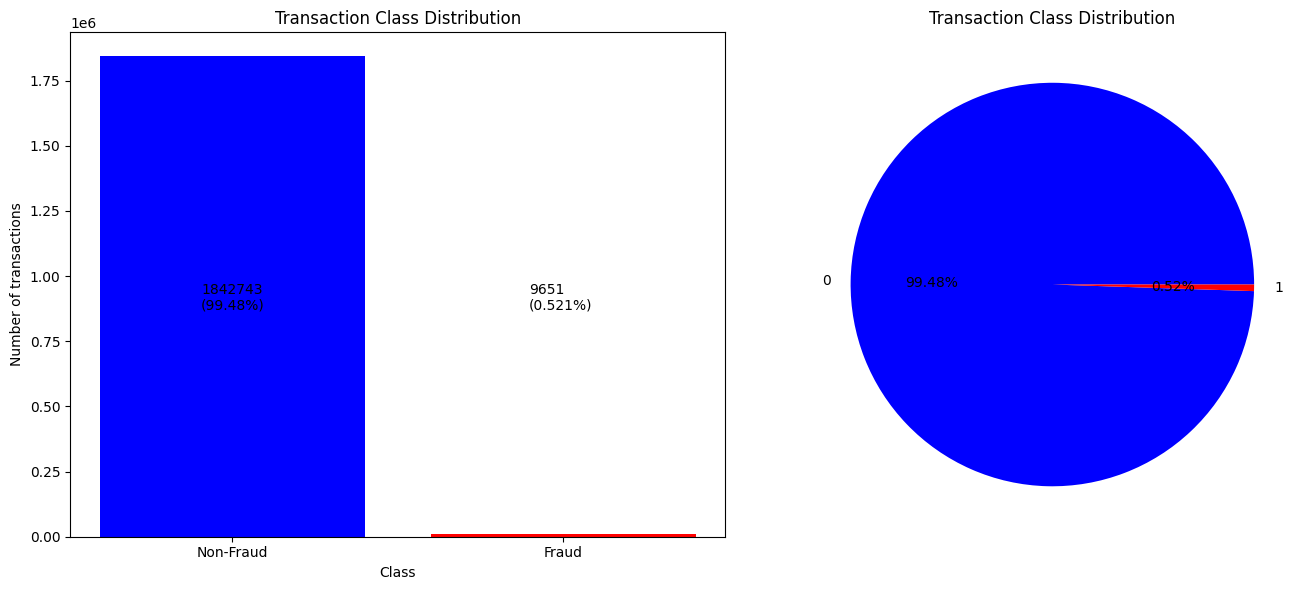

In [28]:
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure(figsize=(14, 6))

# Bar plot
plt.subplot(1, 2, 1)
plt.bar(['Non-Fraud', 'Fraud'], fraud_data['is_fraud'].value_counts(), color=['b', 'r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[0],
                                fraud_data['is_fraud'].value_counts()[0] / len(fraud_data) * 100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(fraud_data['is_fraud'].value_counts()[1],
                                fraud_data['is_fraud'].value_counts()[1] / len(fraud_data) * 100),
             (0.70, 0.45), xycoords='axes fraction')
plt.title('Transaction Class Distribution')

# Pie chart
plt.subplot(1, 2, 2)
fraud_data['is_fraud'].value_counts().plot.pie(autopct='%1.2f%%', colors=['b', 'r'])
plt.ylabel('')
plt.title('Transaction Class Distribution')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The dataset comprises a total of 1,852,394 transactions, among which 9,651 are identified as fraudulent transactions. With only 0.52% of the transactions labeled as fraudulent, the dataset exhibits a highly imbalanced class distribution.

Given the substantial class imbalance, it's imperative to address it before proceeding with model development. The 'amt' feature denotes the transaction amount, while the 'is_fraud' feature serves as the class label, taking the value 1 for fraudulent transactions and 0 for legitimate ones.

In [29]:
#This code snippet provides insights into the distribution of values within each selected column
#by printing the normalized value counts for each unique value in that column.
# Selecting specific columns
df = fraud_data[['job', 'category', 'state', 'city']]

# Iterate over each column
for c in df.columns:
    print("-----------------------------------------------------")
    print("---- %s ---" % c)
    # Print normalized value counts for each unique value in the column
    print(df[c].value_counts(normalize=True))


-----------------------------------------------------
---- job ---
job
Film/video editor             0.007503
Exhibition designer           0.007108
Surveyor, land/geomatics      0.006713
Naval architect               0.006712
Materials engineer            0.006322
                                ...   
Veterinary surgeon            0.000004
Engineer, water               0.000004
Contracting civil engineer    0.000004
Ship broker                   0.000004
Warehouse manager             0.000004
Name: proportion, Length: 497, dtype: float64
-----------------------------------------------------
---- category ---
category
gas_transport     0.101506
grocery_pos       0.095115
home              0.094721
shopping_pos      0.089864
kids_pets         0.087307
shopping_net      0.075212
entertainment     0.072403
food_dining       0.070573
personal_care     0.070225
health_fitness    0.066159
misc_pos          0.061666
misc_net          0.048939
grocery_net       0.035024
travel            0.03

In [30]:
fraud_data['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

In [31]:
# Filter and count job titles related to teaching professions
teaching_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)', regex=True, na=False)].value_counts()

# Print the count of teaching-related job titles
print(teaching_jobs)

job
Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Professor Emeritus                         734
Associate Professor                        734
Name: count, dtype: int64


In [32]:
# Standardize teaching-related job titles. This code snippet aims to standardize
#various job titles related to teaching professions by replacing them with a single label 'Teacher'.
teaching_titles = [
    "Secondary school teacher", "Early years teacher", "TEFL teacher",
    "Special educational needs teacher", "Teacher, special educational needs",
    "Further education lecturer", "English as a second language teacher",
    "Associate Professor", "Lecturer, further education",
    "Private music teacher", "Lecturer, higher education",
    "Teacher, early years/pre", "Teacher, secondary school",
    "Teacher, primary school", "Teacher, English as a foreign language",
    "Primary school teacher", "Professor Emeritus",
    "English as a foreign language teacher", "Teacher, adult education"
]

fraud_data['job'].replace(teaching_titles, 'Teacher', inplace=True)

In [33]:
# Count occurrences of engineering-related job titles
engineering_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Engineering|engineering|Engineer|engineer)', regex=True, na=False)].value_counts()

# Print the count of engineering-related job titles
print(engineering_jobs)

job
Materials engineer                       11711
Mining engineer                           8762
Water engineer                            8740
Mechanical engineer                       8062
Engineer, automotive                      8050
Petroleum engineer                        8046
Energy engineer                           8038
Chemical engineer                         7334
Engineer, biomedical                      7330
Drilling engineer                         7321
Electrical engineer                       7301
Engineer, production                      6584
Engineer, control and instrumentation     6579
Engineering geologist                     5857
Structural engineer                       5116
Engineer, mining                          5112
Engineer, electronics                     5107
Geologist, engineering                    4392
Site engineer                             4391
Engineer, land                            4381
Electronics engineer                      4380
Manufactu

In [34]:
#This code snippet aims to standardize various job titles related to Engineering professions by
#replacing them with a single label 'Engineer'.
fraud_data['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [35]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                          0.107049
Teacher                           0.038724
Film/video editor                 0.007503
Exhibition designer               0.007108
Surveyor, land/geomatics          0.006713
                                    ...   
Information officer               0.000004
Veterinary surgeon                0.000004
Armed forces technical officer    0.000004
Ship broker                       0.000004
Warehouse manager                 0.000004
Name: proportion, Length: 429, dtype: float64

In [36]:
# Filter and count job titles related to scientific professions
science_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Scientist|scientist)', regex=True, na=False)].value_counts()

# Print the count of science-related job titles
print(science_jobs)

job
Scientist, audiological                                        10234
Audiological scientist                                          8801
Scientist, research (maths)                                     8768
Geoscientist                                                    8041
Research scientist (physical sciences)                          7319
Scientist, marine                                               7306
Scientist, biomedical                                           5862
Biomedical scientist                                            4384
Product/process development scientist                           4374
Soil scientist                                                  3669
Scientist, physiological                                        2926
Research scientist (life sciences)                              2923
Scientist, research (physical sciences)                         2914
Physiological scientist                                         2194
Research scientist (maths)    

In [37]:
#This code snippet aims to standardize various job titles related to Scientist professions by
#replacing them with a single label 'Scientist'.
fraud_data['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [38]:
# Filter and count job titles containing the word 'Officer'
officer_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Officer|officer)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Officer'
print(officer_jobs)

job
Chief Executive Officer                                  10199
Historic buildings inspector/conservation officer         8787
Prison officer                                            8054
Trading standards officer                                 6611
Race relations officer                                    6583
Chief Strategy Officer                                    6577
Probation officer                                         5856
Exhibitions officer, museum/gallery                       5841
Research officer, trade union                             5134
Research officer, political party                         5123
Fisheries officer                                         5121
Education officer, museum                                 4404
Chief Operating Officer                                   4388
Careers information officer                               4387
Regulatory affairs officer                                4386
Human resources officer                            

In [39]:
#This code snippet aims to standardize various job titles related to Officer professions by
#replacing them with a single label 'Officer'.
fraud_data['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer",
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',
            'Research officer, trade union ','Research officer, political party',
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [40]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                   0.107049
Officer                    0.082633
Scientist                  0.047388
Teacher                    0.038724
Film/video editor          0.007503
                             ...   
Broadcast journalist       0.000005
Forest/woodland manager    0.000005
Veterinary surgeon         0.000004
Ship broker                0.000004
Warehouse manager          0.000004
Name: proportion, Length: 366, dtype: float64

In [41]:
# Filter and count job titles containing the word 'Surveyor'
surveyor_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Surveyor|surveyor)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Surveyor'
print(surveyor_jobs)

job
Surveyor, land/geomatics             12436
Building surveyor                     8786
Quantity surveyor                     8080
Land/geomatics surveyor               8052
Surveyor, minerals                    6589
Insurance risk surveyor               5133
Commercial/residential surveyor       4382
Building control surveyor             3670
Surveyor, rural practice              3643
Planning and development surveyor     2192
Surveyor, mining                      2191
Rural practice surveyor               2190
Hydrographic surveyor                 1469
Minerals surveyor                      740
Surveyor, hydrographic                 735
Name: count, dtype: int64


In [42]:
#This code snippet aims to standardize various job titles related to Surveyor professions by
#replacing them with a single label 'Surveyor'.
fraud_data['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)

In [43]:
# Filter and count job titles containing the word 'Designer'
designer_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Designer|designer)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Designer'
print(designer_jobs)

job
Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Interior and spatial designer      740
Designer, television/film set      740
Textile designer                   735
Name: count, dtype: int64


In [44]:
#This code snippet aims to standardize various job titles related to Designer professions by
#replacing them with a single label 'Designer'.
fraud_data['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [45]:
# Filter and count job titles containing the word 'manager' (case insensitive)
manager_jobs = fraud_data['job'][fraud_data['job'].str.contains('(manager|Manager)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'manager'
print(manager_jobs)

job
Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Public house manager                    2916
Pension scheme manager                  2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail

In [46]:
fraud_data['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [47]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                         0.107049
Officer                          0.082633
Manager                          0.047814
Scientist                        0.047388
Designer                         0.041880
                                   ...   
Operational investment banker    0.000006
Industrial buyer                 0.000005
Broadcast journalist             0.000005
Veterinary surgeon               0.000004
Ship broker                      0.000004
Name: proportion, Length: 299, dtype: float64

In [48]:
# Filter and count job titles containing the word 'psychologist' (case insensitive)
psychologist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(psychologist|Psychologist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'psychologist'
print(psychologist_jobs)

job
Psychologist, forensic              8044
Counselling psychologist            6590
Educational psychologist            6588
Occupational psychologist           5848
Forensic psychologist               5127
Psychologist, counselling           5121
Sport and exercise psychologist     2941
Psychologist, sport and exercise    2936
Psychologist, clinical              2200
Clinical psychologist               1461
Name: count, dtype: int64


In [49]:
fraud_data['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [50]:
# Filter and count job titles containing the word 'editor' (case insensitive)
editor_jobs = fraud_data['job'][fraud_data['job'].str.contains('(editor|Editor)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'editor'
print(editor_jobs)

job
Film/video editor            13898
Magazine features editor      9506
Editor, commissioning         5117
Video editor                  4386
Editor, film/video            2928
Editor, magazine features     2921
Commissioning editor          2202
Name: count, dtype: int64


In [51]:
fraud_data['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [52]:
# Filter and count job titles containing the word 'Producer' (case insensitive)
producer_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Producer|producer)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Producer'
print(producer_jobs)

job
Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: count, dtype: int64


In [53]:
fraud_data['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [54]:
# Filter and count job titles containing the word 'therapist' (case insensitive)
therapist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(therapist|Therapist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'therapist'
print(therapist_jobs)

job
Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: count, dtype: int64


In [55]:
fraud_data['job'].replace(["Psychotherapist, child","Therapist, occupational","Physiotherapist",
                "Child psychotherapist","Phytotherapist","Therapist, horticultural","Therapist, art",
                "Therapist, sports","Music therapist","Horticultural therapist","Art therapist",
                "Nutritional therapist","Dance movement psychotherapist","Psychotherapist",
                "Therapist, drama","Therapist, music","Occupational therapist"],
                          'Therapist', inplace=True)

In [56]:
# Filter and count job titles containing the word 'nurse' (case insensitive)
nurse_jobs = fraud_data['job'][fraud_data['job'].str.contains('(nurse|Nurse)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'nurse'
print(nurse_jobs)

job
Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: count, dtype: int64


In [57]:
fraud_data['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [58]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                 0.107049
Officer                  0.082633
Manager                  0.047814
Scientist                0.047388
Designer                 0.041880
                           ...   
Accountant, chartered    0.000006
Industrial buyer         0.000005
Broadcast journalist     0.000005
Veterinary surgeon       0.000004
Ship broker              0.000004
Name: proportion, Length: 260, dtype: float64

In [59]:
# Filter and count job titles containing the word 'assistant' (case insensitive)
assistant_jobs = fraud_data['job'][fraud_data['job'].str.contains('(assistant|Assistant)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'assistant'
print(assistant_jobs)

job
Television production assistant     7297
Radio broadcast assistant           6582
Politician's assistant              2944
Production assistant, radio         1466
Production assistant, television     738
Name: count, dtype: int64


In [60]:
fraud_data['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [61]:
# Filter and count job titles containing the word 'executive' (case insensitive)
executive_jobs = fraud_data['job'][fraud_data['job'].str.contains('(executive|Executive)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'executive'
print(executive_jobs)

job
Public relations account executive               5841
Advertising account executive                    2213
Sales executive                                  2206
Chartered legal executive (England and Wales)    1464
Marketing executive                               736
Sales promotion account executive                  14
Name: count, dtype: int64


In [62]:
fraud_data['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [63]:
# Filter and count job titles containing the word 'librarian' (case insensitive)
librarian_jobs = fraud_data['job'][fraud_data['job'].str.contains('(librarian|Librarian)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'librarian'
print(librarian_jobs)

job
Librarian, public      8773
Librarian, academic    7307
Public librarian       2196
Academic librarian     1467
Name: count, dtype: int64


In [64]:
fraud_data['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [65]:
# Filter and count job titles containing the word 'researcher' (case insensitive)
researcher_jobs = fraud_data['job'][fraud_data['job'].str.contains('(researcher|Researcher)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'researcher'
print(researcher_jobs)

job
Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: count, dtype: int64


In [66]:
fraud_data['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [67]:
# Filter and count job titles containing the word 'consultant' (case insensitive)
consultant_jobs = fraud_data['job'][fraud_data['job'].str.contains('(consultant|Consultant)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'consultant'
print(consultant_jobs)

job
Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: count, dtype: int64


In [68]:
fraud_data['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [69]:
# Filter and count job titles containing the word 'conservator' (case insensitive)
conservator_jobs = fraud_data['job'][fraud_data['job'].str.contains('(conservator|Conservator)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'conservator'
print(conservator_jobs)

job
Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: count, dtype: int64


In [70]:
fraud_data['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [71]:
# Filter and count job titles containing the word 'banker' (case insensitive)
banker_jobs = fraud_data['job'][fraud_data['job'].str.contains('(banker|Banker)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'banker'
print(banker_jobs)

job
Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: count, dtype: int64


In [72]:
fraud_data['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"],
                'Banker', inplace=True)

In [73]:
# Filter and count job titles containing the word 'chemist' (case insensitive)
chemist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(chemist|Chemist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'chemist'
print(chemist_jobs)

job
Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: count, dtype: int64


In [74]:
fraud_data['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [75]:
# Filter and count job titles containing the word 'Accountant' (case insensitive)
accountant_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Accountant|accountant)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Accountant'
print(accountant_jobs)

job
Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: count, dtype: int64


In [76]:
fraud_data['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [77]:
# Filter and count job titles containing the word 'administrator' (case insensitive)
administrator_jobs = fraud_data['job'][fraud_data['job'].str.contains('(administrator|Administrator)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'administrator'
print(administrator_jobs)

job
Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Education administrator                             1467
Sports administrator                                1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: count, dtype: int64


In [78]:
fraud_data['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"],
                          'Administrator', inplace=True)

In [79]:
# Filter and count job titles containing the word 'Writer' (case insensitive)
writer_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Writer|writer)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Writer'
print(writer_jobs)

job
Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: count, dtype: int64


In [80]:
fraud_data['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [81]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Solicitor               0.000006
Industrial buyer        0.000005
Broadcast journalist    0.000005
Veterinary surgeon      0.000004
Ship broker             0.000004
Name: proportion, Length: 210, dtype: float64

In [82]:
# Filter and count job titles related to medical professions
medical_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)', regex=True, na=False)].value_counts()

# Print the count of job titles related to medical professions
print(medical_jobs)

job
Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
General practice doctor     2934
Neurosurgeon                2934
Veterinary surgeon             8
Name: count, dtype: int64


In [83]:
fraud_data['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"],
                          'Doctor', inplace=True)

In [84]:
# Filter and count job titles containing the word 'buyer' (case insensitive)
buyer_jobs = fraud_data['job'][fraud_data['job'].str.contains('(buyer|Buyer)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'buyer'
print(buyer_jobs)

job
Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: count, dtype: int64


In [85]:
fraud_data['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"],
                                                                                  'Buyer', inplace=True)

In [86]:
# Filter and count job titles containing the word 'Geneticist' (case insensitive)
geneticist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(Geneticist|geneticist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'Geneticist'
print(geneticist_jobs)

job
Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: count, dtype: int64


In [87]:
fraud_data['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [88]:
# Filter and count job titles containing the word 'pharmacist' (case insensitive)
pharmacist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(pharmacist|Pharmacist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'pharmacist'
print(pharmacist_jobs)

job
Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: count, dtype: int64


In [89]:
fraud_data['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [90]:
# Filter and count job titles containing the word 'physicist' (case insensitive)
physicist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(physicist|Physicist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'physicist'
print(physicist_jobs)

job
Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: count, dtype: int64


In [91]:
fraud_data['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [92]:
# Filter and count job titles containing the word 'analyst' (case insensitive)
analyst_jobs = fraud_data['job'][fraud_data['job'].str.contains('(analyst|Analyst)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'analyst'
print(analyst_jobs)

job
Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: count, dtype: int64


In [93]:
fraud_data['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"],
                                                                          'Analyst', inplace=True)

In [94]:
# Filter and count job titles containing the word 'technologist' (case insensitive)
technologist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(technologist|Technologist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'technologist'
print(technologist_jobs)

job
Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: count, dtype: int64


In [95]:
fraud_data['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [96]:
# Filter and count job titles containing the word 'technician' (case insensitive)
technician_jobs = fraud_data['job'][fraud_data['job'].str.contains('(technician|Technician)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'technician'
print(technician_jobs)

job
Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: count, dtype: int64


In [97]:
fraud_data['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [98]:
# Filter and count job titles containing the word 'horticulturist' (case insensitive)
horticulturist_jobs = fraud_data['job'][fraud_data['job'].str.contains('(horticulturist|Horticulturist)', regex=True, na=False)].value_counts()

# Print the count of job titles containing 'horticulturist'
print(horticulturist_jobs)

job
Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: count, dtype: int64


In [99]:
fraud_data['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'],
                                                                      'Horticulturist', inplace=True)

fraud_data['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'],
                                                                      'Merchandiser', inplace=True)

fraud_data['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [100]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                0.107049
Officer                 0.082633
Manager                 0.047814
Scientist               0.047388
Designer                0.041880
                          ...   
Legal secretary         0.000006
Homeopath               0.000006
Solicitor               0.000006
Broadcast journalist    0.000005
Ship broker             0.000004
Name: proportion, Length: 176, dtype: float64

Due to the presence of analogous data in the 'job' column, repetitive entries are being replaced with unique category data.

In [101]:
# Calculate the normalized value counts of job titles
job_freqs = fraud_data['job'].value_counts(normalize=True)

# Calculate the cumulative sum of the normalized value counts
cumulative_freqs = job_freqs.cumsum()

# Print the cumulative frequencies
print(cumulative_freqs)

job
Engineer                0.107049
Officer                 0.189682
Manager                 0.237495
Scientist               0.284883
Designer                0.326764
                          ...   
Legal secretary         0.999979
Homeopath               0.999985
Solicitor               0.999991
Broadcast journalist    0.999996
Ship broker             1.000000
Name: proportion, Length: 176, dtype: float64


In [102]:
# Define top_jobs as the index values of the first 91 cumulative sum entries from the job frequency data
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Producer', 'Chartered Accountant',
       'Analyst', 'Physicist', 'Buyer', 'Executive', 'Horticulturist',
       'Naval architect', 'Technician', 'Financial adviser',
       'Systems developer', 'IT trainer', 'Chemist', 'Geneticist',
       'Podiatrist', 'Comptroller', 'Banker', 'Paramedic', 'Sub', 'Musician',
       'Barrister', 'Immunologist', 'Pharmacist', 'Financial trader',
       'Sales professional, IT', 'Counsellor', 'Claims inspector/assessor',
       'Make', 'Firefighter', 'Merchandiser', 'Medical sales representative',
       'Trade mark attorney', 'Chartered loss adjuster', 'Dealer',
       'Multimedia programmer', 'Fine artist', 'Technical brewer',
       'Toxicologist', 'Conservator', 'Senior tax professional/t

In [103]:
fraud_data['job'].describe()

count      1852394
unique         176
top       Engineer
freq        198297
Name: job, dtype: object

In [104]:
# Replace repetitive job titles with 'OTHERS' for job titles not in the top_jobs list
fraud_data['job'] = np.where(fraud_data['job'].isin(top_jobs), fraud_data['job'], 'OTHERS')

In [105]:
fraud_data['job'].describe()

count      1852394
unique          92
top       Engineer
freq        198297
Name: job, dtype: object

In [106]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                    0.107049
OTHERS                      0.098896
Officer                     0.082633
Manager                     0.047814
Scientist                   0.047388
                              ...   
Radiographer, diagnostic    0.002372
Music tutor                 0.002371
Warden/ranger               0.002369
Journalist, newspaper       0.002369
Tax inspector               0.002364
Name: proportion, Length: 92, dtype: float64

Considering the high number of unique job titles with low occurrence rates, the code further consolidates job titles with lower percentages into a single category named 'OTHERS'.

In [107]:
#Lets Check with State column
fraud_data['state'].describe()

count     1852394
unique         51
top            TX
freq       135269
Name: state, dtype: object

In [108]:
fraud_data['state'].value_counts(normalize=True)

state
TX    0.073024
NY    0.064467
PA    0.061635
CA    0.043455
OH    0.035968
MI    0.035535
IL    0.033585
FL    0.032809
AL    0.031592
MO    0.029639
MN    0.024527
AR    0.024083
NC    0.023286
VA    0.022542
WI    0.022532
SC    0.022528
KY    0.022123
IN    0.021345
IA    0.020948
OK    0.020541
MD    0.020160
GA    0.020158
WV    0.019720
NJ    0.018965
NE    0.018584
KS    0.017782
MS    0.016207
LA    0.016170
WY    0.014995
WA    0.014597
OR    0.014256
TN    0.013449
ME    0.012650
NM    0.012647
ND    0.011435
CO    0.010671
SD    0.009487
MA    0.009481
VT    0.009076
MT    0.009073
AZ    0.008293
UT    0.008290
NH    0.006331
CT    0.005927
NV    0.004350
ID    0.004338
DC    0.002769
HI    0.001970
AK    0.001600
RI    0.000402
DE    0.000005
Name: proportion, dtype: float64

The United States is frequently partitioned into geographical regions, which aids in delineating larger areas and grouping together states with similar characteristics such as geography, culture, history, and climate. Although official government regions exist, such as those designated by the U.S. Census Bureau and the Standard Federal Regions, the populace commonly refers to five primary regions for this purpose: the Northeast, South, Midwest, and West.

In [109]:
# Define the label_states function
def label_states(state):
    northeast_states = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
    midwest_states = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
    south_states = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']

    if state in northeast_states:
        return 'Northeast'
    elif state in midwest_states:
        return 'Midwest'
    elif state in south_states:
        return 'South'
    else:
        return 'West'

# Apply the label_states function to create the 'state_bin' column
fraud_data['state_bin'] = fraud_data['state'].apply(label_states)

# Display the DataFrame with the new 'state_bin' column
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

            long  city_pop             job        dob  \
0       -81.1781      3495    Psychologist 1988-03-09   
1      -118.2105       149         Teacher 1978-06-21   
2      -112.2620      4154         Officer 1962-01-19   
3      -112.1138      1939          OTHERS 1967-01-12   
4       -79.4629        99       Therapist 1986-03-28   
...          ...       ...             ...        ...   
555714  -91.8912       519    Town planner 1966-02-13   
555715  -95.4401     28739  Futures trader 1999-12-27   
555716 -118.9017      3684        Musician 1981-11-29   
555717 -116.4493       129          OTHERS 1965-12-15   
555718  -97.4798    116001           Buyer 1993-05-10   

                               trans_num   unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4       a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                  ...         ...        ...         ...   
555714  9b1f753c79894c9f4b71f04581835ada  1388534347  39.946837  -91.333331   
555715  2090647dac2c89a1d86c514c427f5b91  1388534349  29.661049  -96.186633   
555716  6c5b7c8add471975aa0fec023b2e8408  1388534355  46.658340 -119.715054   
555717  14392d723bb7737606b2700ac791b7aa  1388534364  44.470525 -117.080888   
555718  1765bb45b3aa3224b4cdcb6e7a96ce

The state column has been binned into four regions—north, east, west, and south—to facilitate better comprehension of fraud patterns.

In [110]:
fraud_data['state_bin'].describe()

count     1852394
unique          4
top         South
freq       706068
Name: state_bin, dtype: object

In [111]:
fraud_data['state_bin'].value_counts(normalize=True)

state_bin
South        0.381165
Midwest      0.281367
Northeast    0.188934
West         0.148533
Name: proportion, dtype: float64

In [112]:
fraud_data.shape

(1852394, 21)

Following data cleaning and type conversion of columns, binning was applied to the 'state' and 'job' columns due to their analogous nature. Consequently, the dataset now contains 1,852,394 rows and 21 columns.

### Step 3: Visualization of data (EDA)

Lets check the coorelations between the variables

In [113]:
# Select columns with non-numeric (object) data type
non_numeric_columns = fraud_data.select_dtypes(exclude=['number'])

# Print the non-numeric columns
print(non_numeric_columns)

       trans_date_trans_time                            merchant  \
0        2019-01-01 00:00:18          fraud_Rippin, Kub and Mann   
1        2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme   
2        2019-01-01 00:00:51                fraud_Lind-Buckridge   
3        2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell   
4        2019-01-01 00:03:06                 fraud_Keeling-Crist   
...                      ...                                 ...   
555714   2020-12-31 23:59:07               fraud_Reilly and Sons   
555715   2020-12-31 23:59:09                fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15                     fraud_Rau-Robel   
555717   2020-12-31 23:59:24               fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34                   fraud_Dare-Marvin   

              category gender                        street            city  \
0             misc_net      F                561 Perry Cove  Moravian Falls   
1          grocery_pos   

In [114]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud_data['category_encoded'] = label_encoder.fit_transform(fraud_data['category'])
fraud_data['gender_encoded'] = label_encoder.fit_transform(fraud_data['gender'])
fraud_data['state_bin_encoded'] = label_encoder.fit_transform(fraud_data['state_bin'])
fraud_data['job_encoded'] = label_encoder.fit_transform(fraud_data['job'])

In [115]:
# Select columns with non-numeric (object) data type
non_numeric_columns = fraud_data.select_dtypes(exclude=['number'])

# Print the non-numeric columns
print(non_numeric_columns)

       trans_date_trans_time                            merchant  \
0        2019-01-01 00:00:18          fraud_Rippin, Kub and Mann   
1        2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme   
2        2019-01-01 00:00:51                fraud_Lind-Buckridge   
3        2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell   
4        2019-01-01 00:03:06                 fraud_Keeling-Crist   
...                      ...                                 ...   
555714   2020-12-31 23:59:07               fraud_Reilly and Sons   
555715   2020-12-31 23:59:09                fraud_Hoppe-Parisian   
555716   2020-12-31 23:59:15                     fraud_Rau-Robel   
555717   2020-12-31 23:59:24               fraud_Breitenberg LLC   
555718   2020-12-31 23:59:34                   fraud_Dare-Marvin   

              category gender                        street            city  \
0             misc_net      F                561 Perry Cove  Moravian Falls   
1          grocery_pos   

In [116]:
# Select only numerical columns
numerical_columns = fraud_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix among the numerical features
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                     cc_num       amt       zip       lat      long  city_pop  \
cc_num             1.000000  0.001826  0.041504 -0.058744 -0.048429 -0.009118   
amt                0.001826  1.000000  0.001979 -0.000670 -0.000735  0.004921   
zip                0.041504  0.001979  1.000000 -0.114554 -0.909795  0.077601   
lat               -0.058744 -0.000670 -0.114554  1.000000 -0.014744 -0.154816   
long              -0.048429 -0.000735 -0.909795 -0.014744  1.000000 -0.052359   
city_pop          -0.009118  0.004921  0.077601 -0.154816 -0.052359  1.000000   
unix_time          0.000284 -0.002411  0.001017  0.000741 -0.000574 -0.001636   
merch_lat         -0.058415 -0.000613 -0.113934  0.993582 -0.014585 -0.153863   
merch_long        -0.048421 -0.000711 -0.908981 -0.014709  0.999118 -0.052329   
is_fraud          -0.001125  0.209308 -0.002190  0.002904  0.001022  0.000325   
category_encoded   0.000327  0.029665  0.003013 -0.008526 -0.001406  0.009318   
gender_encoded     0.000333 

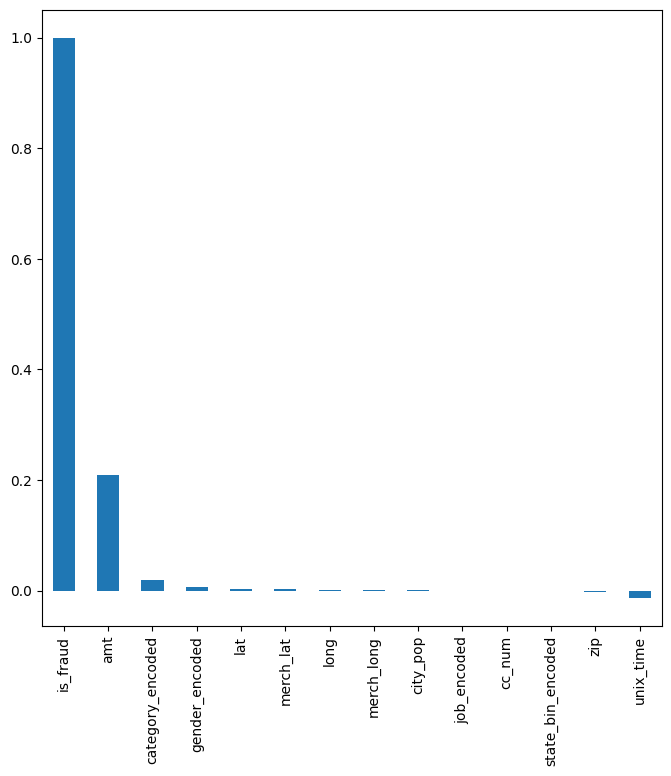

In [117]:
# Select only numerical columns
numerical_columns = fraud_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation of 'is_fraud' with other numerical columns
correlation_with_fraud = numerical_columns.corr()['is_fraud'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(8, 8))
correlation_with_fraud.plot(kind='bar')
plt.show()

The columns 'amt' and 'unix_time' exhibit a positive correlation with the 'is_fraud' column.

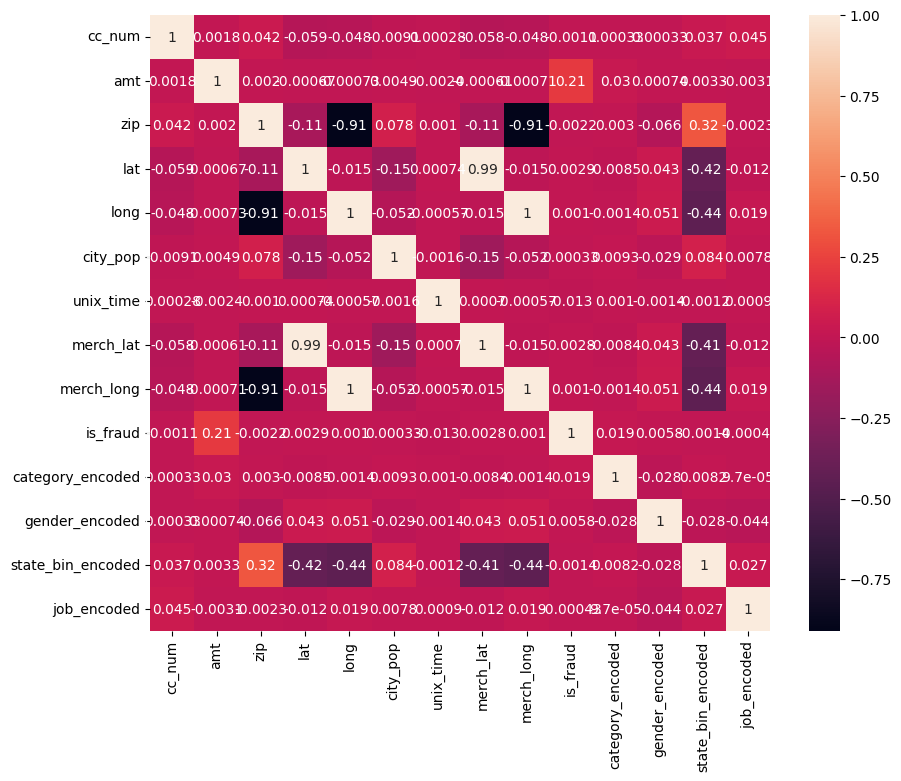

In [118]:
# Select only numerical columns
numerical_columns = fraud_data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

The variables 'zip' and 'long' are highly negatively correlated with a coefficient of -0.91. Similarly, 'merch_long' and 'zip' also exhibit a strong negative correlation of -0.91. On the other hand, 'merch_lat' and 'lat' are highly positively correlated, with a coefficient of 0.99.

**Univariate Analysis**

In [119]:
# Lets check the info to see the types of the feature variables and the null values present
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

Univariate Analysis of Numerical Variables

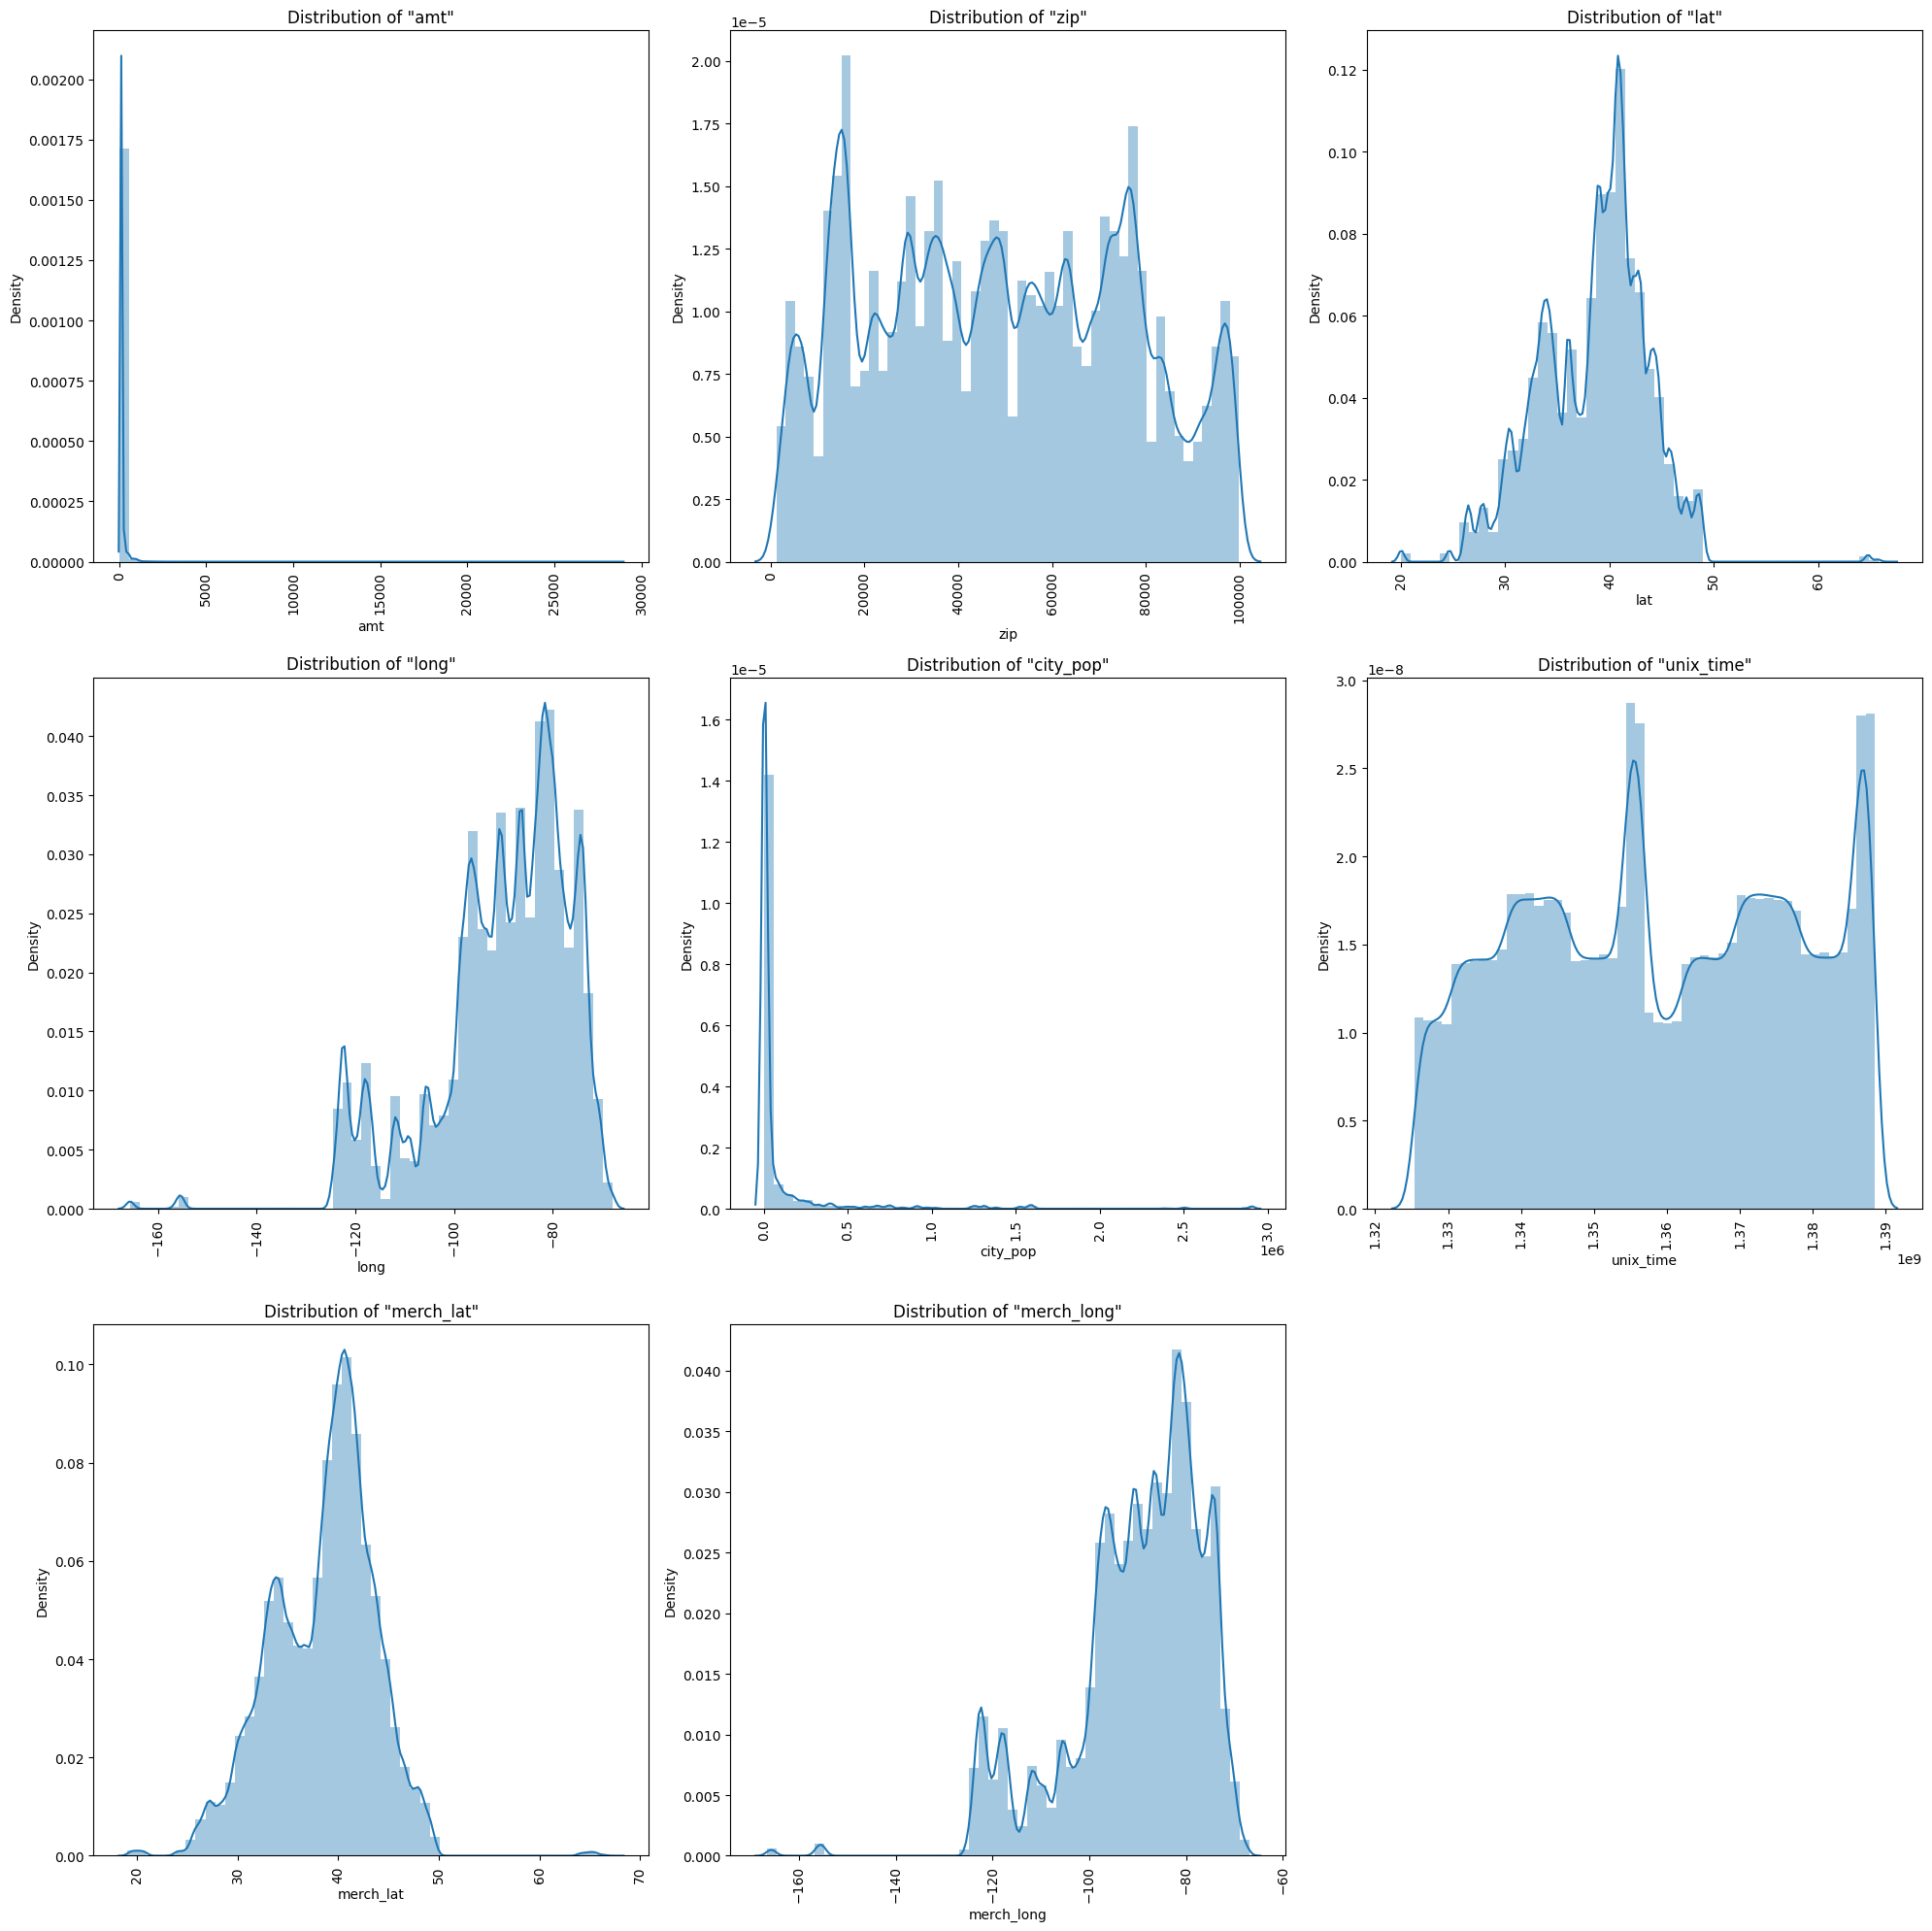

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

# Plot distribution plots for each variable
sns.distplot(fraud_data['amt'], ax=axes[0, 0])
axes[0, 0].set_title('Distribution of "amt"')

sns.distplot(fraud_data['zip'], ax=axes[0, 1])
axes[0, 1].set_title('Distribution of "zip"')

sns.distplot(fraud_data['lat'], ax=axes[0, 2])
axes[0, 2].set_title('Distribution of "lat"')

sns.distplot(fraud_data['long'], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of "long"')

sns.distplot(fraud_data['city_pop'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of "city_pop"')

sns.distplot(fraud_data['unix_time'], ax=axes[1, 2])
axes[1, 2].set_title('Distribution of "unix_time"')

sns.distplot(fraud_data['merch_lat'], ax=axes[2, 0])
axes[2, 0].set_title('Distribution of "merch_lat"')

sns.distplot(fraud_data['merch_long'], ax=axes[2, 1])
axes[2, 1].set_title('Distribution of "merch_long"')

# Hide the last subplot (3,3,3) since it's unused
fig.delaxes(axes[2, 2])

# Rotate x-axis labels for better readability
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The plotted distributions illustrate the characteristics of the variables 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', and 'merch_long'. Notably, both 'amt' and 'city_pop' exhibit substantial skewness in their distributions.

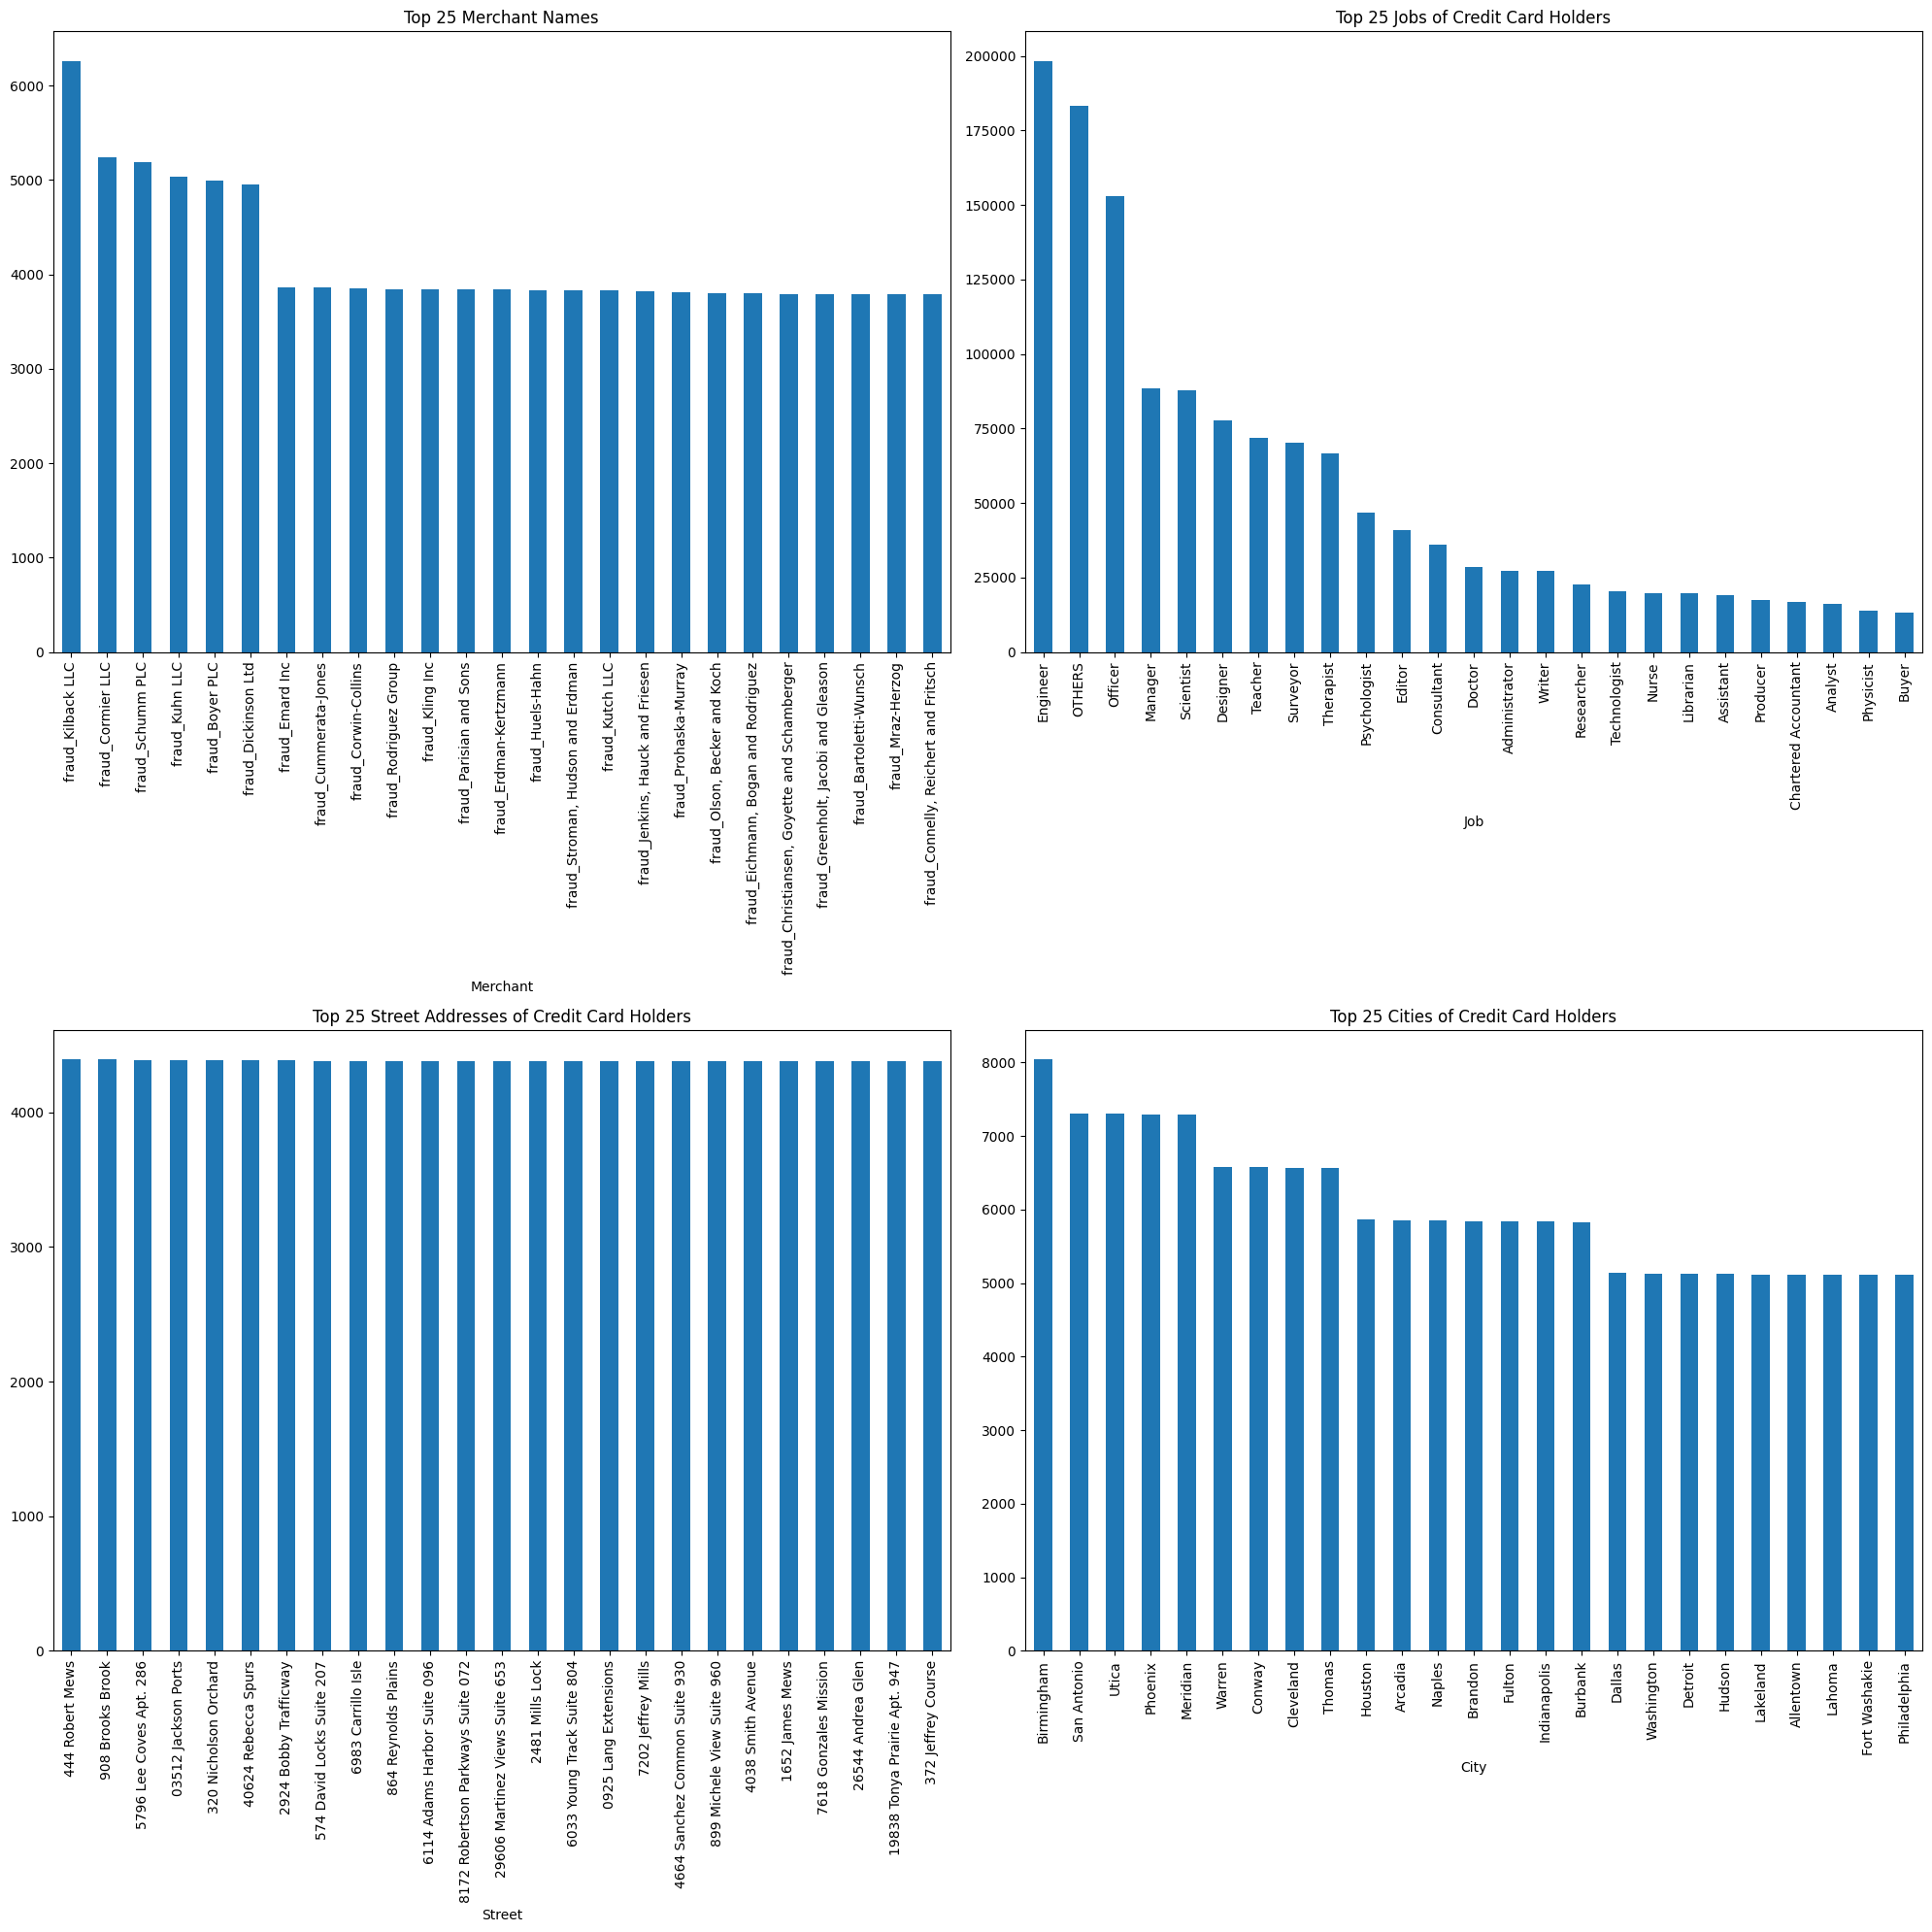

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Plot top 25 merchant names
fraud_data['merchant'].value_counts().head(25).plot.bar(ax=axes[0, 0])
axes[0, 0].set_xlabel('Merchant')
axes[0, 0].set_title('Top 25 Merchant Names')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot top 25 jobs of credit card holders
fraud_data['job'].value_counts().head(25).plot.bar(ax=axes[0, 1])
axes[0, 1].set_xlabel('Job')
axes[0, 1].set_title('Top 25 Jobs of Credit Card Holders')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot top 25 street addresses of credit card holders
fraud_data['street'].value_counts().head(25).plot.bar(ax=axes[1, 0])
axes[1, 0].set_xlabel('Street')
axes[1, 0].set_title('Top 25 Street Addresses of Credit Card Holders')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot top 25 cities of credit card holders
fraud_data['city'].value_counts().head(25).plot.bar(ax=axes[1, 1])
axes[1, 1].set_xlabel('City')
axes[1, 1].set_title('Top 25 Cities of Credit Card Holders')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The visualizations above depict the top 25 merchant names, the top 25 jobs of credit card holders, the top 25 street addresses of credit card holders, and the top 25 cities of credit card holders.

**Univariate Analysis of Categorical Variables**

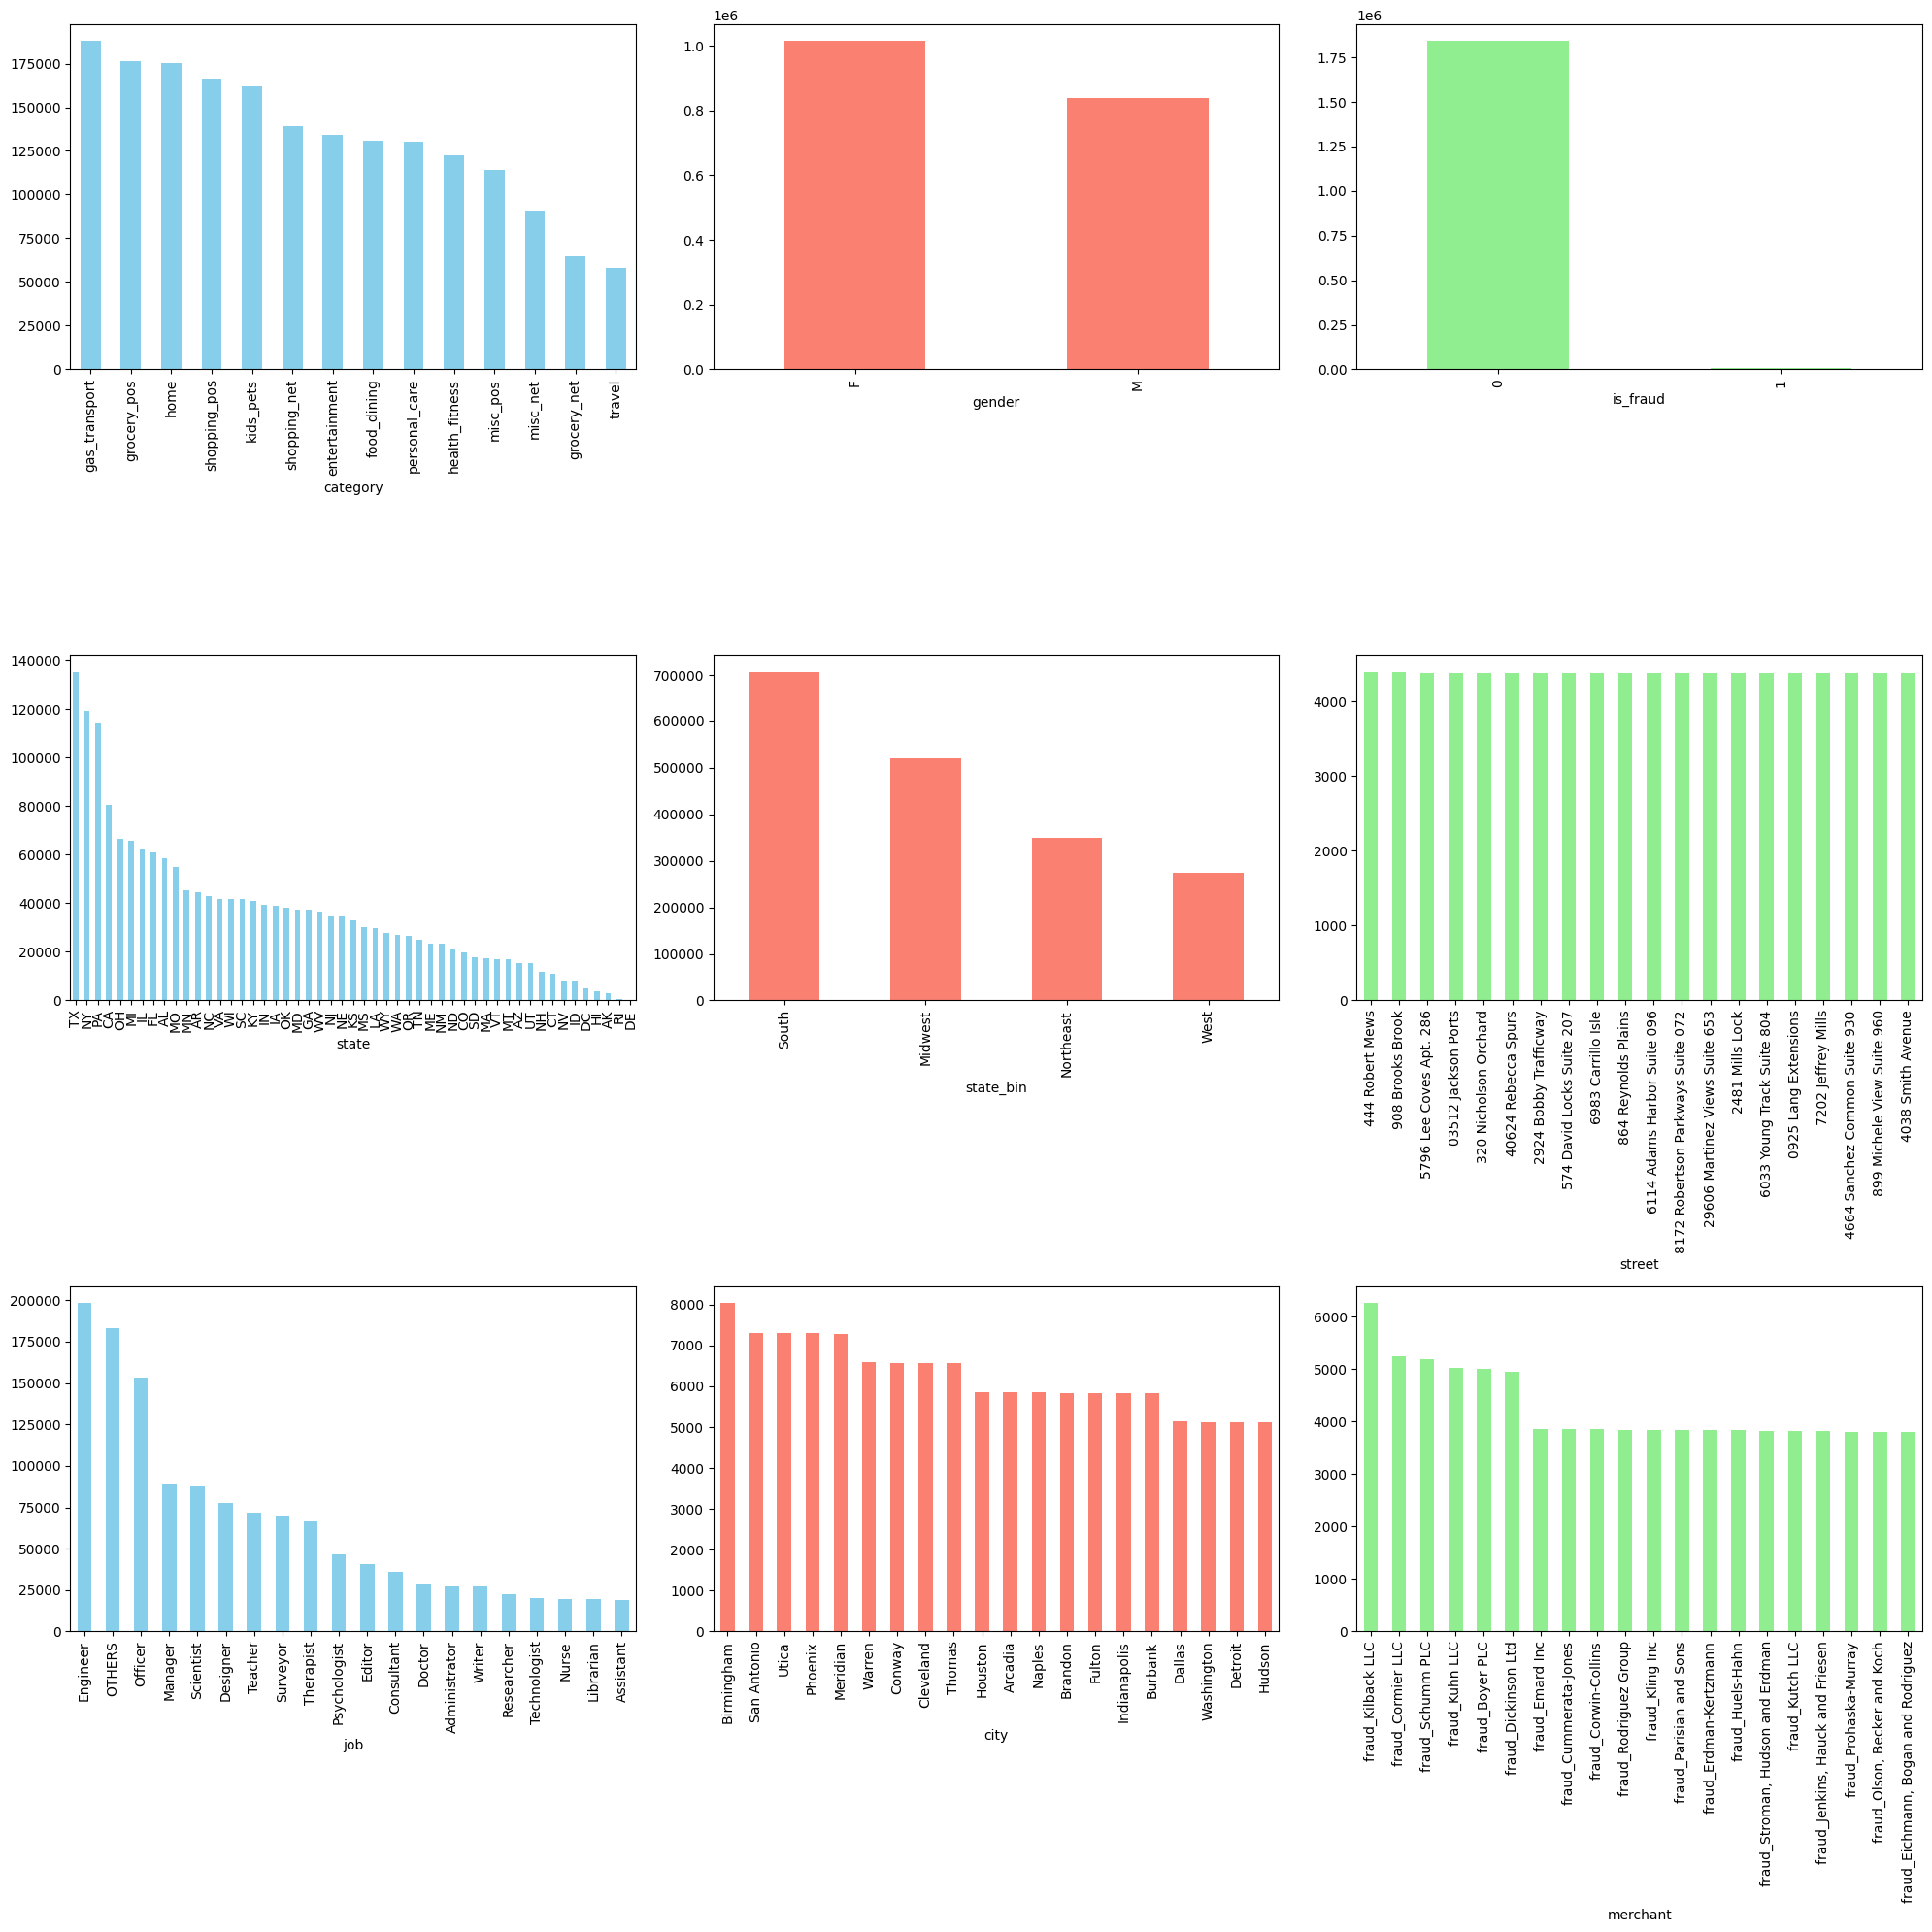

In [122]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

fraud_data['category'].value_counts().plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].tick_params(axis='x', rotation=90)

fraud_data['gender'].value_counts().plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].tick_params(axis='x', rotation=90)

fraud_data['is_fraud'].value_counts().plot(kind='bar', ax=axes[0, 2], color='lightgreen')
axes[0, 2].tick_params(axis='x', rotation=90)

fraud_data['state'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].tick_params(axis='x', rotation=90)

fraud_data['state_bin'].value_counts().plot(kind='bar', ax=axes[1, 1], color='salmon')
axes[1, 1].tick_params(axis='x', rotation=90)

fraud_data['street'].value_counts().head(20).plot(kind='bar', ax=axes[1, 2], color='lightgreen')
axes[1, 2].tick_params(axis='x', rotation=90)

fraud_data['job'].value_counts().head(20).plot(kind='bar', ax=axes[2, 0], color='skyblue')
axes[2, 0].tick_params(axis='x', rotation=90)

fraud_data['city'].value_counts().head(20).plot(kind='bar', ax=axes[2, 1], color='salmon')
axes[2, 1].tick_params(axis='x', rotation=90)

fraud_data['merchant'].value_counts().head(20).plot(kind='bar', ax=axes[2, 2], color='lightgreen')
axes[2, 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The plot above displays the transaction count based on categorical variables such as category, fraud status (is_fraud), gender, state, and state_bin. Additionally, it shows the transaction count for the top 25 streets, jobs, cities, and merchants.

**Multivariate Analysis**

Visualising Numerical - Numerical Variables

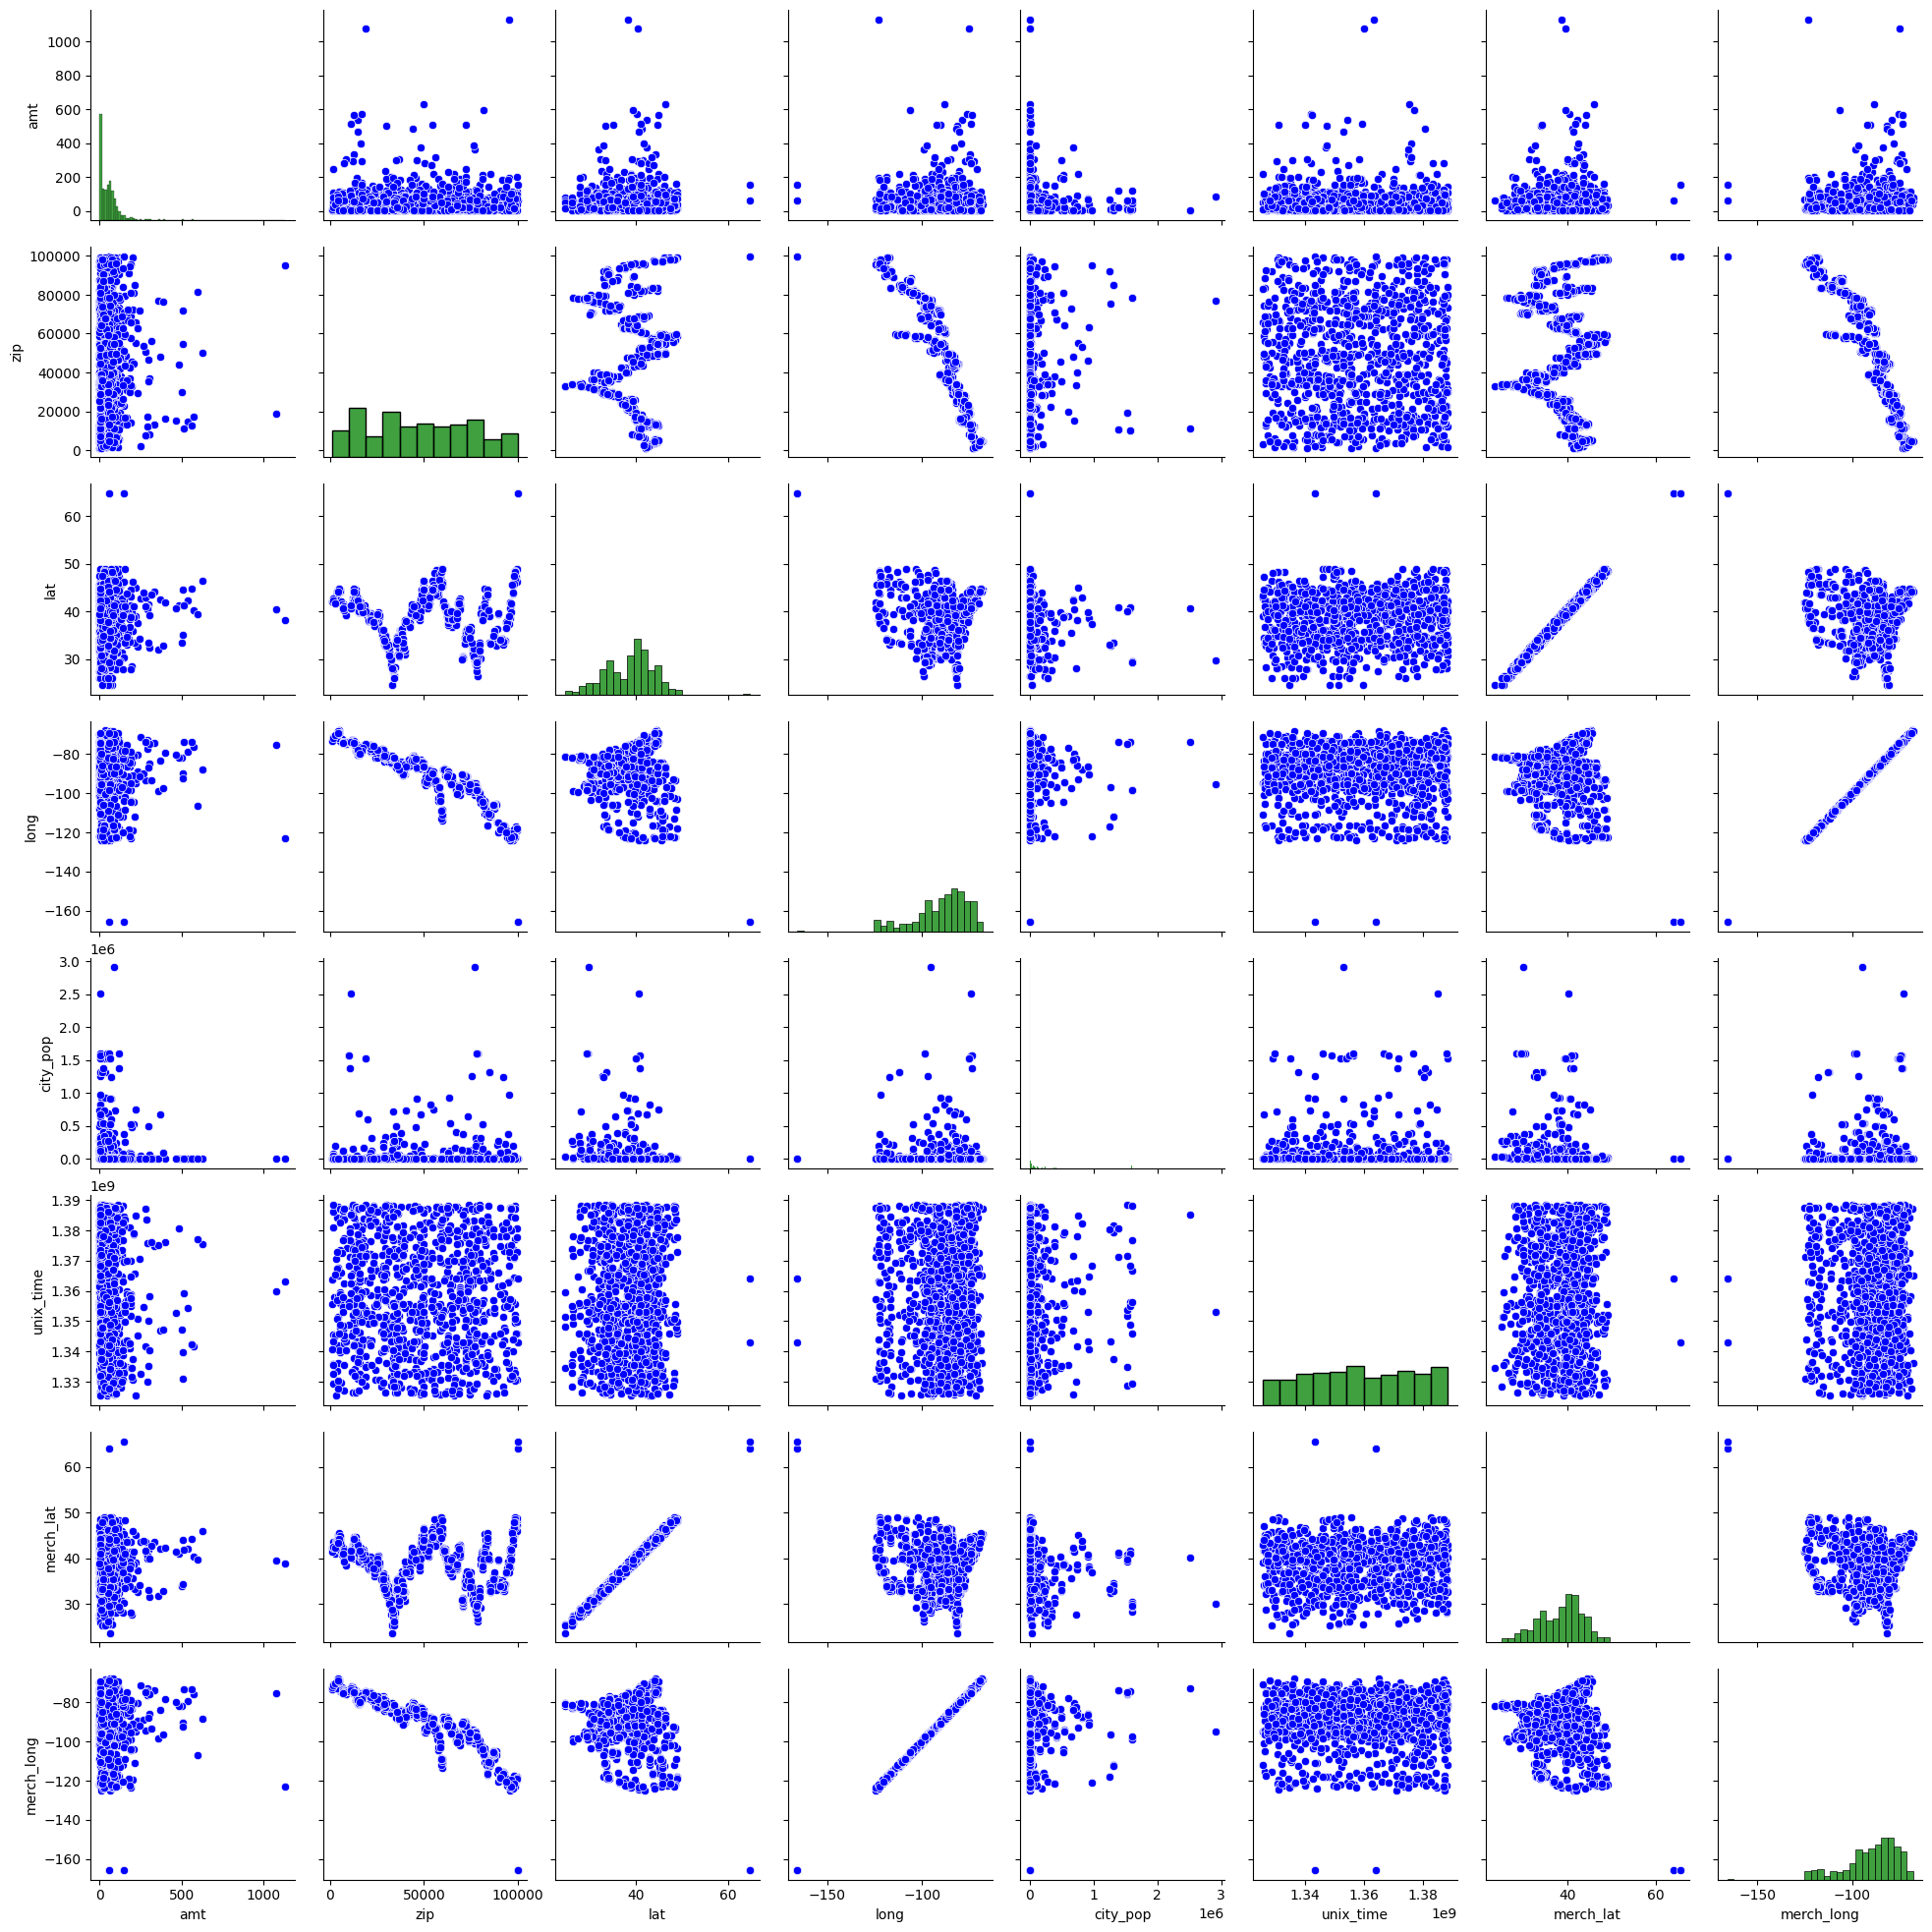

In [123]:
# Sample a subset of data for plotting
sampled_data = fraud_data.sample(n=1000, random_state=42)  # Adjust the sample size as needed

# Extracting numeric variables
num_vars = sampled_data[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]

# Creating a pairplot with specified colors
sns.pairplot(num_vars, plot_kws={'color': 'blue'}, diag_kws={'color': 'green'})
plt.show()

The above pairplot of numeric variables shows relation between each other

**Visualising Categorical- Categorical Variables**

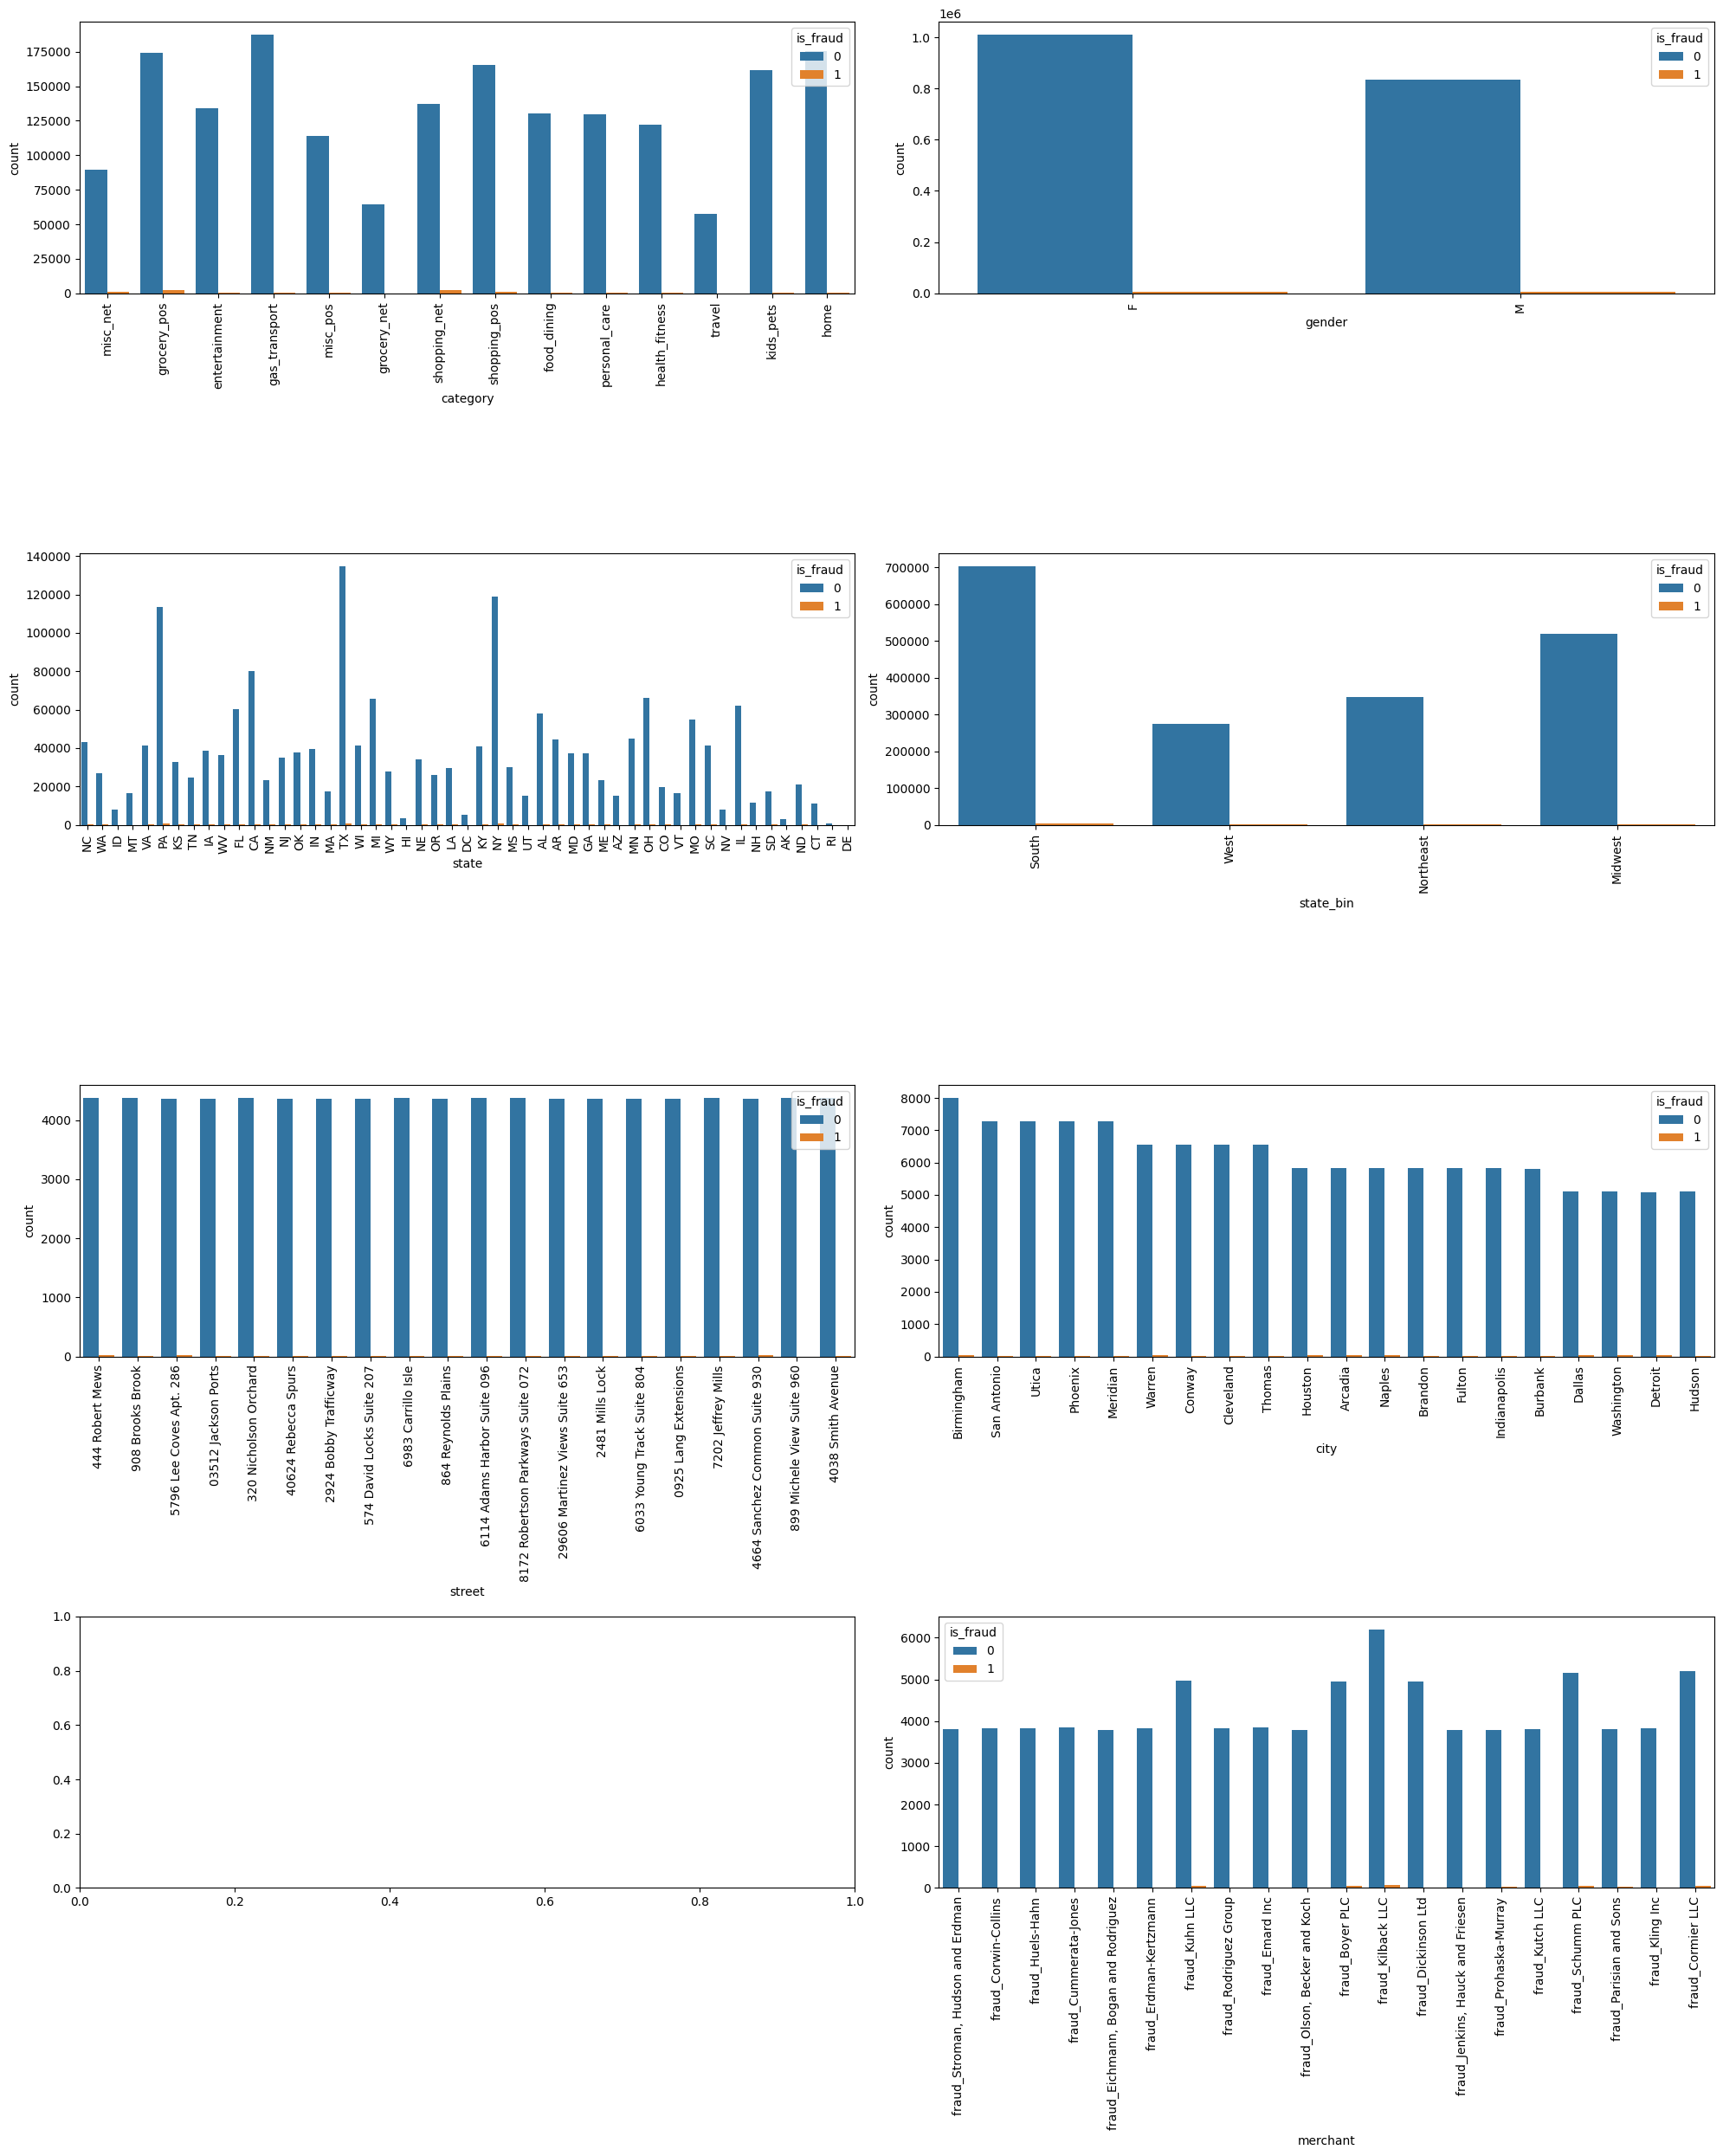

In [124]:
# Creating subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 25))

# Plotting countplots
sns.countplot(x="category", hue="is_fraud", data=fraud_data, ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x="gender", hue="is_fraud", data=fraud_data, ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x="state", hue="is_fraud", data=fraud_data, ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x="state_bin", hue="is_fraud", data=fraud_data, ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=90)

# Get the top 20 most common streets
top_streets = fraud_data['street'].value_counts().index[:20]

# Create the countplot with ordered street values
sns.countplot(x="street", hue="is_fraud", data=fraud_data[fraud_data['street'].isin(top_streets)], ax=axes[2, 0],
              order=top_streets)
axes[2, 0].tick_params(axis='x', rotation=90)

# Get the top 20 most common cities
top_cities = fraud_data['city'].value_counts().index[:20]

# Create the countplot with ordered city values
sns.countplot(x="city", hue="is_fraud", data=fraud_data[fraud_data['city'].isin(top_cities)], ax=axes[2, 1],
              order=top_cities)
axes[2, 1].tick_params(axis='x', rotation=90)

# Get the top 20 merchants with the highest count
top_merchants = fraud_data['merchant'].value_counts().head(20)

# Plot the countplot with the top merchants
sns.countplot(x="merchant", hue="is_fraud", data=fraud_data[fraud_data['merchant'].isin(top_merchants.index)], ax=axes[3, 1])
axes[3, 1].tick_params(axis='x', rotation=90)


# Adjusting layout
fig.tight_layout()

# Displaying the plot
plt.show()

The plot above illustrates the relationship between the target variable `is_fraud` and various categorical features such as category, gender, state, state_bin, street, city, and merchant.

Visualising Numerical - Categorical Variables

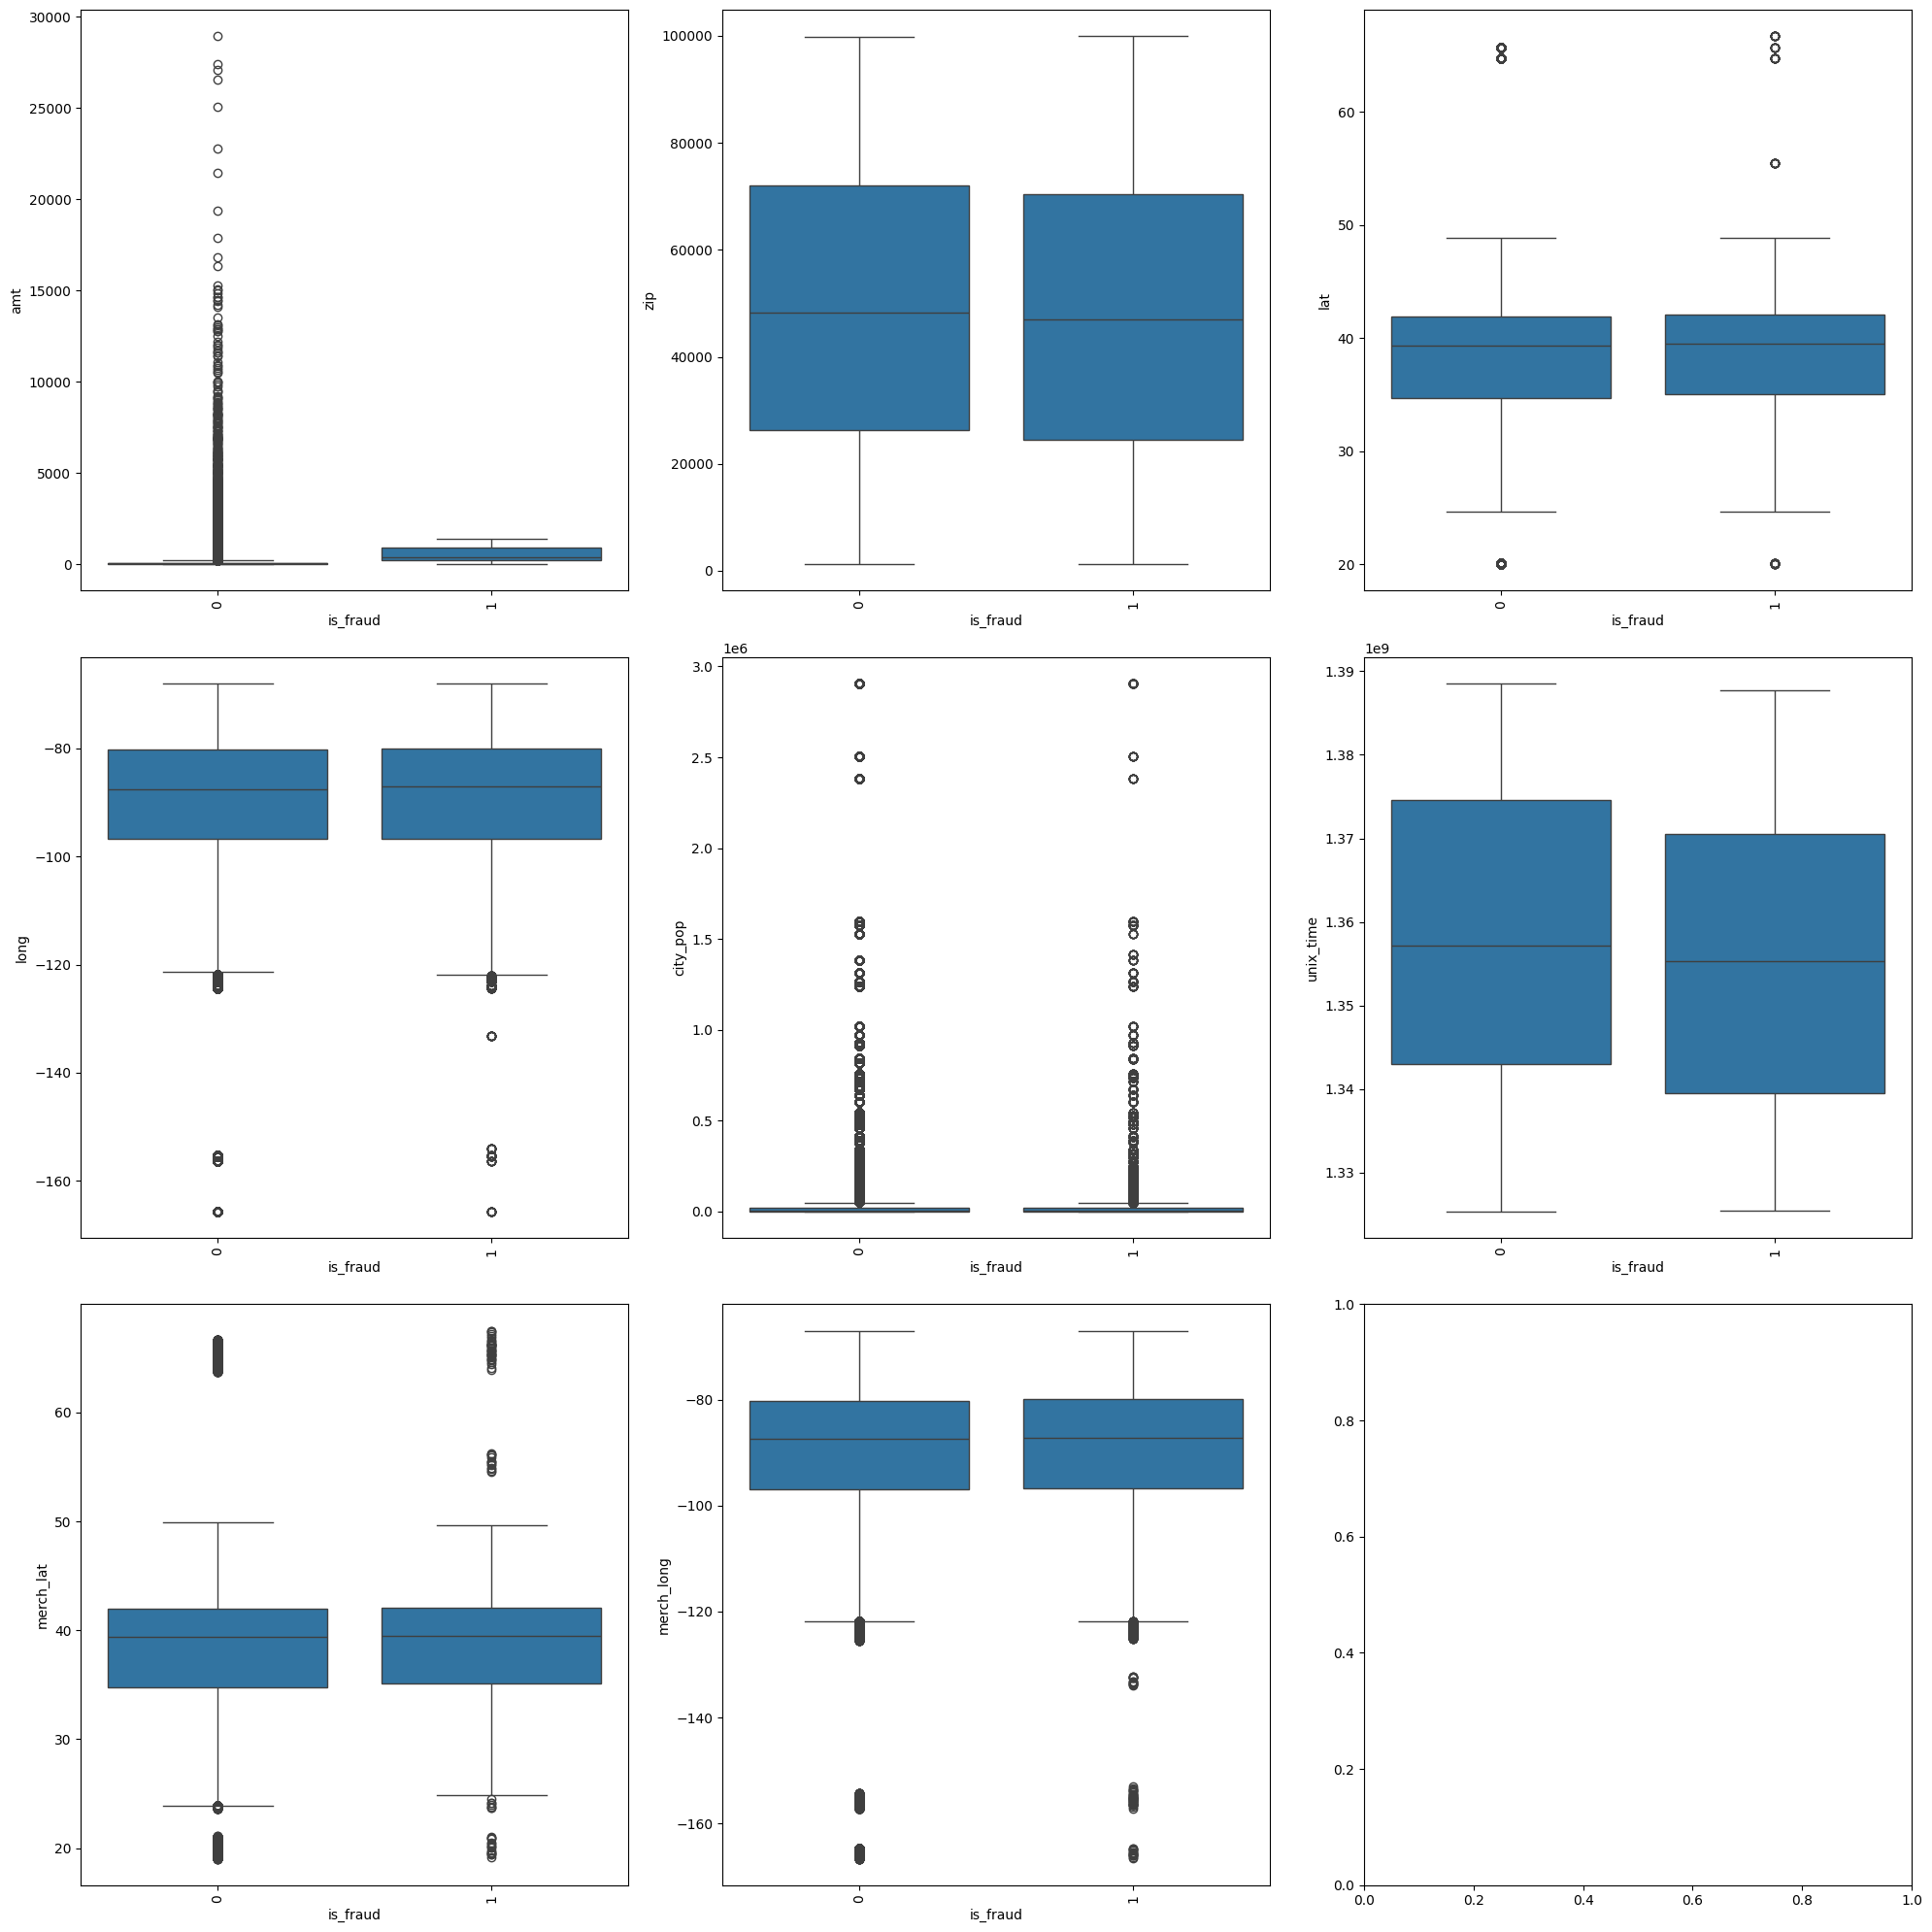

In [125]:
# Define the layout of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# List of numerical variables
numeric_vars = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Plot boxplots for each numerical variable
for i, var in enumerate(numeric_vars):
    row_idx = i // 3  # Calculate row index
    col_idx = i % 3   # Calculate column index

    # Plot boxplot
    sns.boxplot(y=var, x="is_fraud", data=fraud_data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].tick_params(axis='x', rotation=90)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

The provided plot displays boxplots depicting the relationship between the target variable 'is_fraud' and various numerical features such as 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merchat_lat', and 'merchant_long'. This visualization helps in understanding the distribution of these numerical variables concerning fraudulent and non-fraudulent transactions.

### **Step 4: Data Preparation**

Feature Engineering involves creating new features from existing data that can enhance the predictive power of machine learning models. Here are some feature engineering steps we can perform:

1. **Age Calculation**: Calculate the age of the cardholder on the transaction day using the 'dob' variable. Then, bin the age variable.
2. **Transaction Date-Time Features**: Extract various time-related features such as transaction year, month, hour, day, and weekday from the 'trans_date_trans_time' variable.
3. **Distance Calculation**: Calculate the distance between the credit card holder's location (latitude and longitude) and the merchant's location (merch_lat and merch_long).
4. **Historical Variables**: Create historical variables such as moving averages and amount by moving average to capture trends and patterns over time.
5. **Previous Merchant Location and Time Since Previous Transaction**: Calculate the longitude and latitude of the previous merchant. Also, compute the time elapsed since the previous transaction in hours.
6. **Distance Between Merchants**: Calculate the distance between the current and previous purchase locations.

These new features can provide valuable insights and improve the performance of fraud detection models.

In [126]:
from datetime import datetime

# Assuming fraud_data is already defined
fraud_data["age"] = fraud_data["dob"].apply(lambda x: datetime.now().year - x.year)

In [127]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         unix_time  merch_lat  merch_long is_fraud state_bin category_encoded  \
0       1325376018  36.011293  -82.048315        0     South                8   
1       1325376044  49.159047 -118.186462        0      West                4   
2       1325376051  43.150704 -112.154481        0      West                0   
3       1325376076  47.034331 -112.561071        0      West                2   
4       1325376186  38.674999  -78.632459        0     South                9   
...            ...        ...         ...      ...       ...              ...   
555714  1388534347  39.946837  -91.333331        0   Midwest                5   
555715  1388534349  29.661049  -96.186633        0     South                7   
555716  1388534355  46.658340 -119.715054        0      West                7   
555717  1388534364  44.470525 -117.080888        0      West               13   
555718  1388534374  36.210097  -97.036372        0     South                0   

        gender_encoded  state_bin_encoded  job_encoded  age  
0                    0                  2           70   36  
1                    0                  3           82   46  
2                    1                  3           61   62  
3                    1                  3           59   57  
4                    1                  2           86   38  
...                ...                ...          ...  ...  
555714               1                  0           87   58  
555715               1                  2           37   25  
555716               0                  3           56   43  

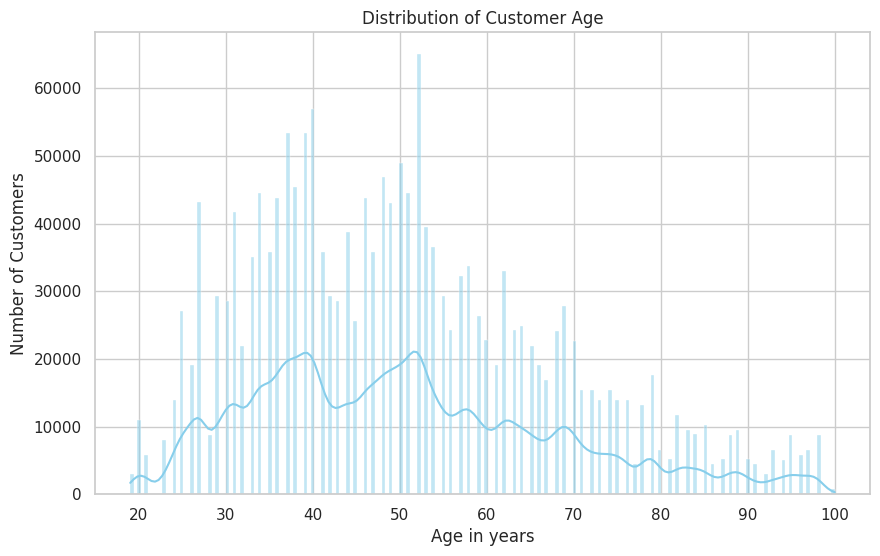

In [128]:
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

sns.histplot(fraud_data['age'], kde=True, color='skyblue')
plt.xlabel('Age in years')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Age')
plt.show()

The graph illustrates the ages of credit card holders, with the bulk of individuals falling within the 30 to 50-year-old range.

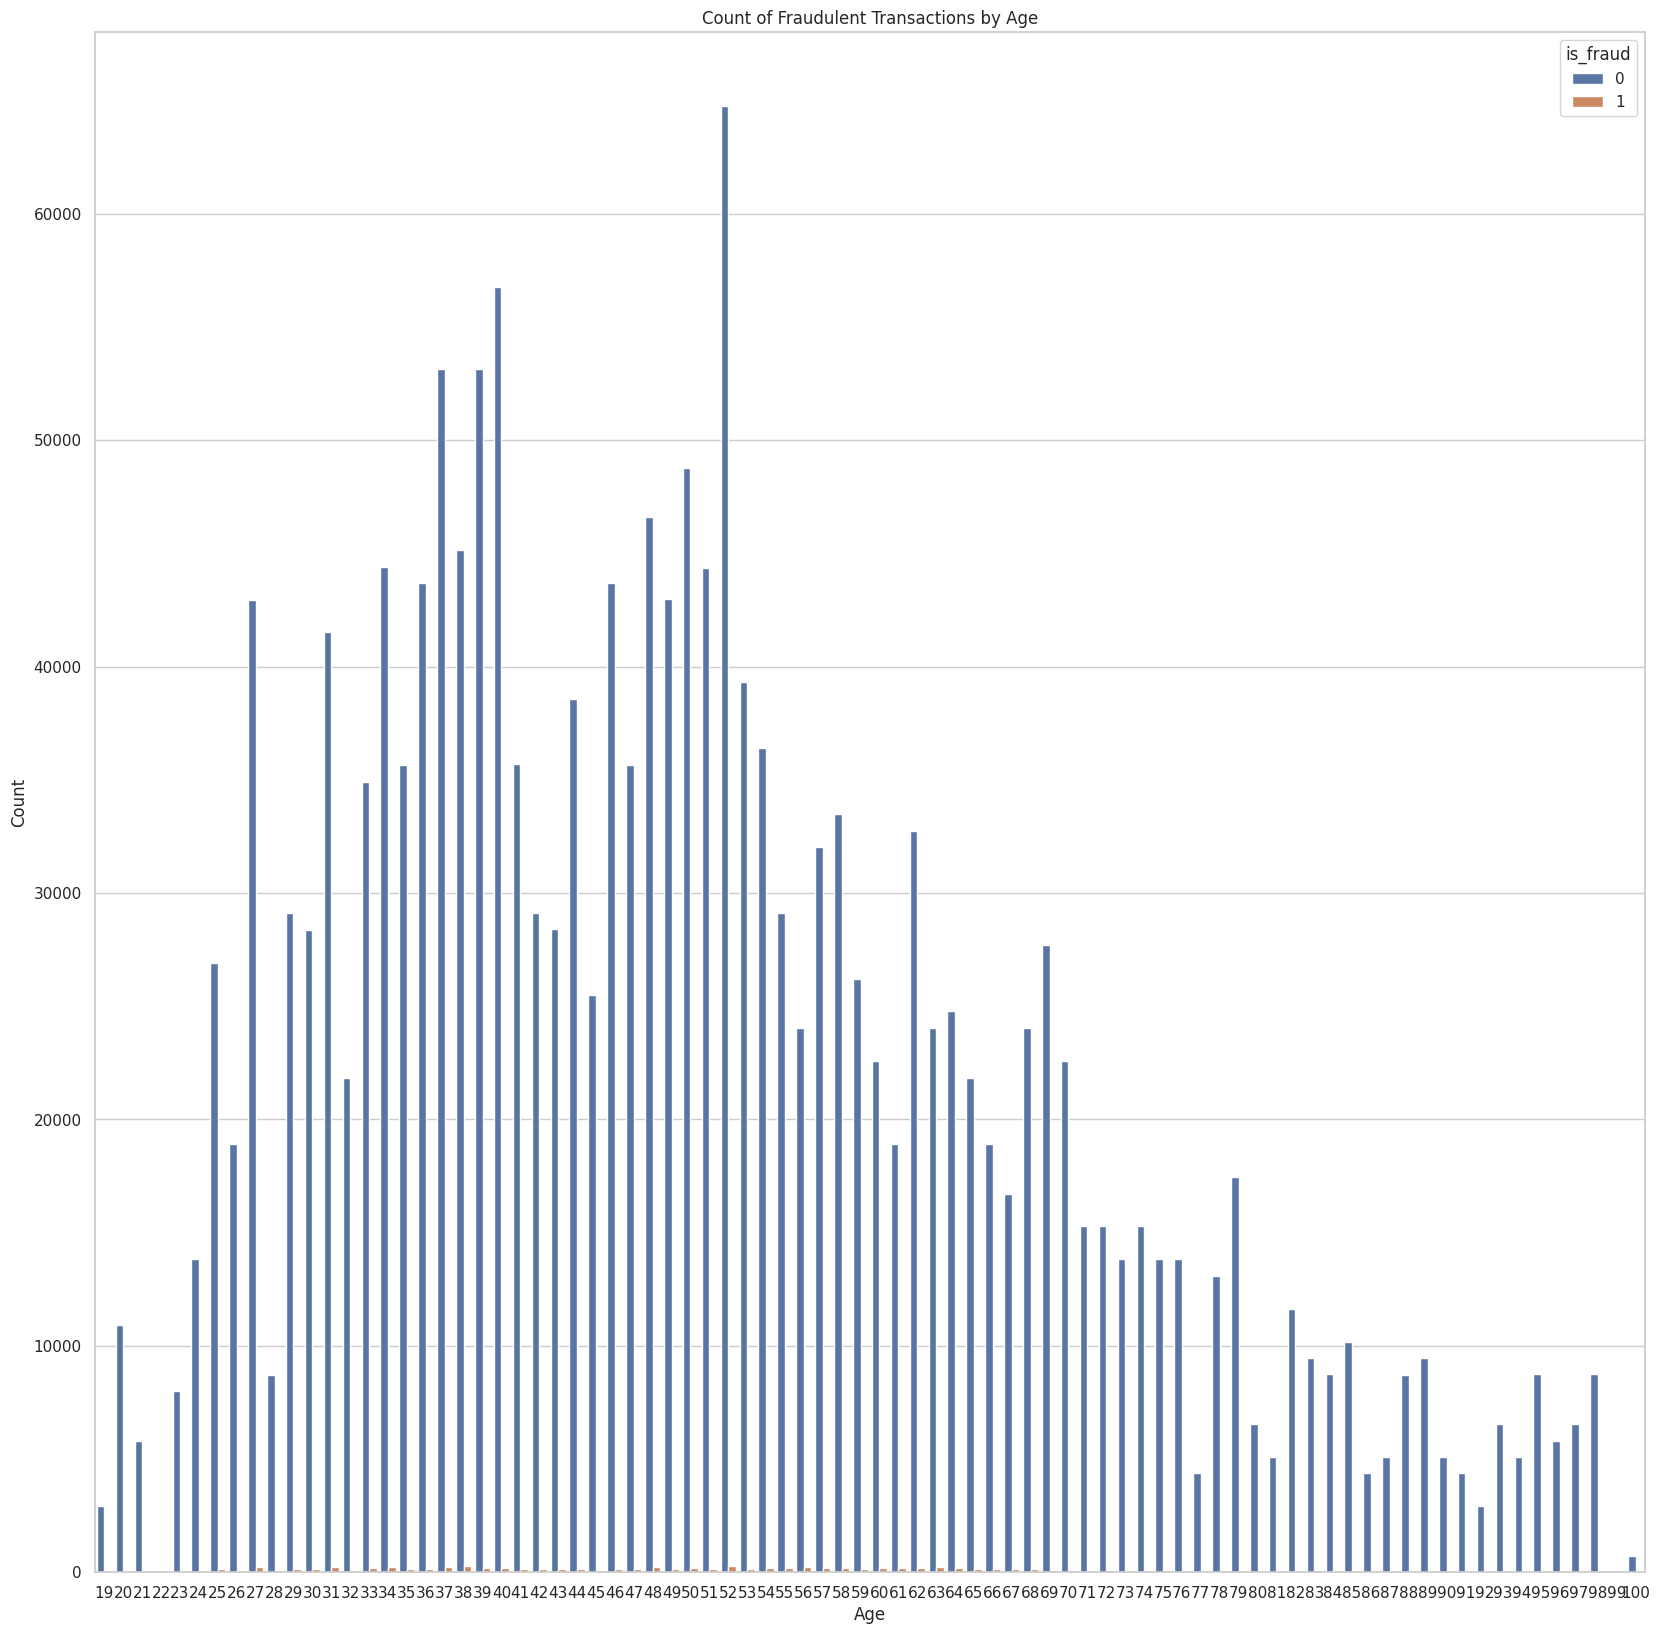

In [129]:
plt.figure(figsize=(20, 20))

sns.countplot(x='age', hue='is_fraud', data=fraud_data)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age')
plt.show()

In [130]:
#binning the age variable

bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

fraud_data['age_bin'] = pd.cut(fraud_data['age'], bins=bin_manual, labels=labels)
fraud_data[['age_bin', 'age']].head()

age_bin  age
0   30-40   36
1   40-50   46
2   60-70   62
3   50-60   57
4   30-40   38

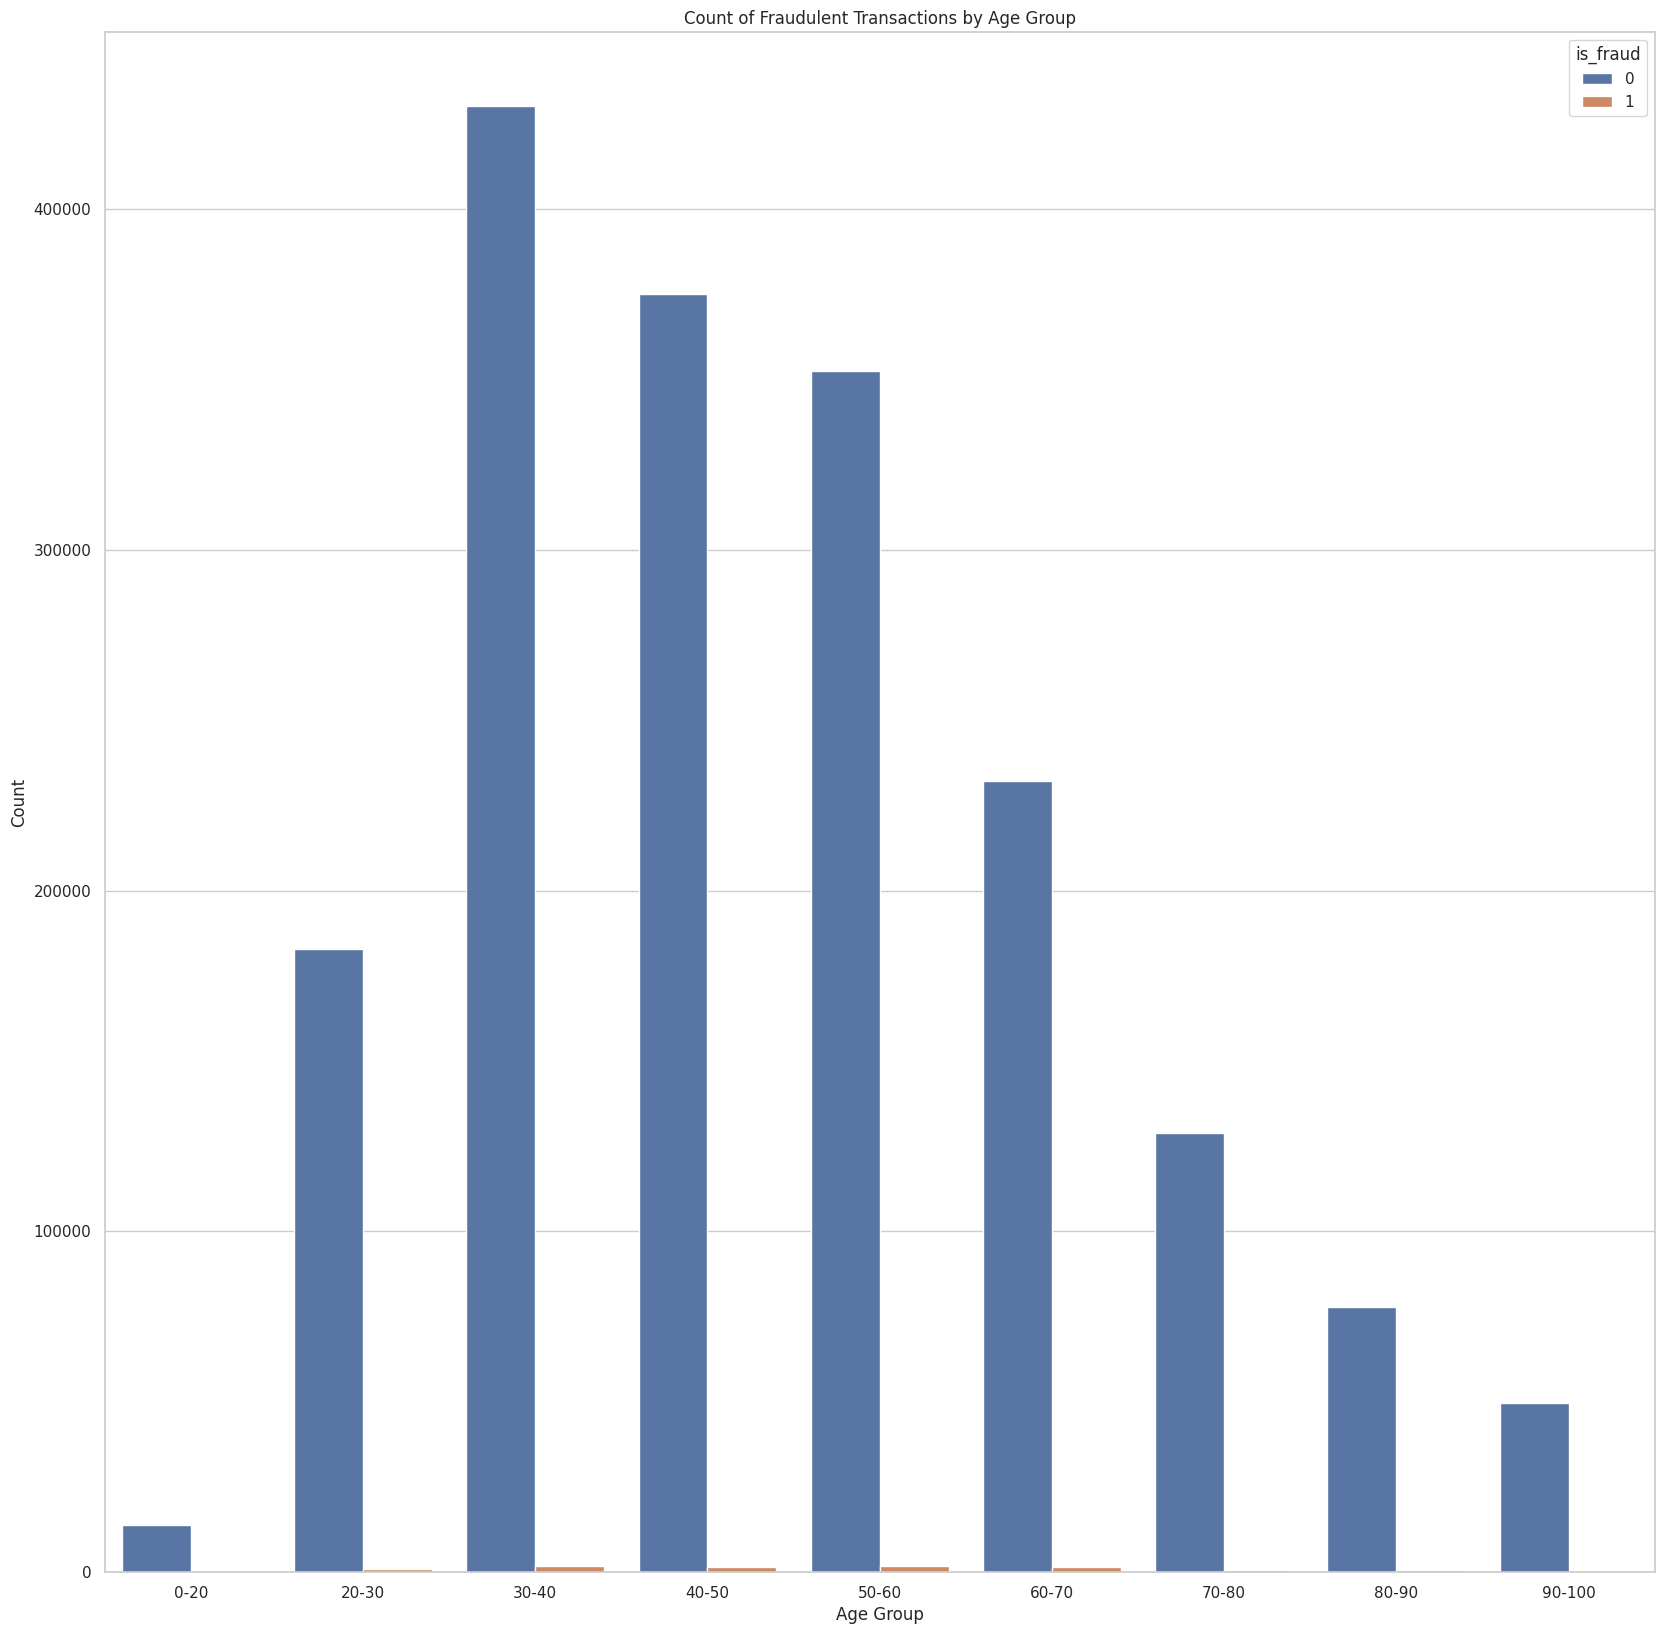

In [131]:
plt.figure(figsize=(20, 20))

sns.countplot(x='age_bin', hue='is_fraud', data=fraud_data)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age Group')
plt.show()

The graph indicates that the majority of credit card holders are aged between 30 and 50 years. Conversely, fraudulent transactions predominantly occur among cardholders aged between 20 and 70 years.

In [132]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             float

In [133]:
#Deriving trans_Year, trans_year_month, trans_Month, trans_Hour, trans_Day, trans_weekday of transaction from trans_date_trans_time variable

fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])

# Deriving features
fraud_data['trans_Year'] = fraud_data['trans_date_trans_time'].dt.year
fraud_data['trans_year_month'] = fraud_data['trans_date_trans_time'].dt.to_period('M')
fraud_data['trans_Month'] = fraud_data['trans_date_trans_time'].dt.month
fraud_data['trans_Hour'] = fraud_data['trans_date_trans_time'].dt.hour
fraud_data['trans_Day'] = fraud_data['trans_date_trans_time'].dt.day
fraud_data['trans_weekday'] = fraud_data['trans_date_trans_time'].dt.day_name()
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        state_bin_encoded  job_encoded  age age_bin trans_Year  \
0                       2           70   36   30-40       2019   
1                       3           82   46   40-50       2019   
2                       3           61   62   60-70       2019   
3                       3           59   57   50-60       2019   
4                       2           86   38   30-40       2019   
...                   ...          ...  ...     ...        ...   
555714                  0           87   58   50-60       2020   
555715                  2           37   25   20-30       2020   
555716                  3           56   43   40-50       2020   
555717                  3           59   59   50-60       2020   
555718                  2           11   31   30-40       2020   

       trans_year_month  trans_Month  trans_Hour  trans_Day  trans_weekday  
0               2019-01            1           0          1        Tuesday  
1               2019-01            1           0          1        Tuesday  
2               2019-01            1           0          1        Tuesday  
3               2019-01            1           0          1        Tuesday  
4               2019-01            1           0          1        Tuesday  
...                 ...          ...         ...        ...            ...  
555714          2020-12           12          23         31       Thursday  
555715          2020-12           12          23         31       Thursday  
555716          2020-12           12          23         31       Thursday  
555717          2020-12      

Deriving dist between credit card lat, long to merchant and long

In [134]:
import numpy as np

def haversine_distance(lat, longitude, merch_lat, merch_long):

    # Convert latitude and longitude from degrees to radians
    longitude = np.radians(longitude)
    merch_long = np.radians(merch_long)
    lat = np.radians(lat)
    merch_lat = np.radians(merch_lat)

    # Haversine formula
    dlon = merch_long - longitude
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Radius of the Earth in kilometers
    r = 6371
    # Calculate the distance
    distance = c * r

    return distance

In [135]:
# Assuming fraud_data is your DataFrame containing columns lat, long, merch_lat, and merch_long
fraud_data['dist'] = fraud_data.apply(lambda x: haversine_distance(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)


In [136]:
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        job_encoded  age  age_bin trans_Year trans_year_month trans_Month  \
0                70   36    30-40       2019          2019-01           1   
1                82   46    40-50       2019          2019-01           1   
2                61   62    60-70       2019          2019-01           1   
3                59   57    50-60       2019          2019-01           1   
4                86   38    30-40       2019          2019-01           1   
...             ...  ...      ...        ...              ...         ...   
555714           87   58    50-60       2020          2020-12          12   
555715           37   25    20-30       2020          2020-12          12   
555716           56   43    40-50       2020          2020-12          12   
555717           59   59    50-60       2020          2020-12          12   
555718           11   31    30-40       2020          2020-12          12   

        trans_Hour  trans_Day  trans_weekday        dist  
0                0          1        Tuesday   78.597568  
1                0          1        Tuesday   30.212176  
2                0          1        Tuesday  108.206083  
3                0          1        Tuesday   95.673231  
4                0          1        Tuesday   77.556744  
...            ...        ...            ...         ...  
555714          23         31       Thursday   77.026148  
555715          23         31       Thursday  100.074420  
555716          23         31       Thursday   80.759302  
555717          23         31       Thursday   52.933240  
555718          23

Creating the features "prev_merch_lat" and "prev_merch_long" to represent the latitude and longitude of the merchant in the previous transaction, and "time_since_prev_transaction" to indicate the time elapsed since the previous transaction, measured in hours.

In [137]:
# Derive previous longitude/latitude and time elapsed of a transaction
fraud_data['prev_merch_lat'] = grp_by_cc['merch_lat'].transform(lambda x: x.shift(1)).fillna(fraud_data['merch_lat'])
fraud_data['prev_merch_long'] = grp_by_cc['merch_long'].transform(lambda x: x.shift(1)).fillna(fraud_data['merch_long'])

# Calculate time since previous transaction in hours
fraud_data['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x: round((x - x.shift(1)), 1)).fillna(0)
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        trans_Year  trans_year_month  trans_Month trans_Hour trans_Day  \
0             2019           2019-01            1          0         1   
1             2019           2019-01            1          0         1   
2             2019           2019-01            1          0         1   
3             2019           2019-01            1          0         1   
4             2019           2019-01            1          0         1   
...            ...               ...          ...        ...       ...   
555714        2020           2020-12           12         23        31   
555715        2020           2020-12           12         23        31   
555716        2020           2020-12           12         23        31   
555717        2020           2020-12           12         23        31   
555718        2020           2020-12           12         23        31   

       trans_weekday        dist  prev_merch_lat  prev_merch_long  \
0            Tuesday   78.597568       36.011293       -82.048315   
1            Tuesday   30.212176       49.159047      -118.186462   
2            Tuesday  108.206083       43.150704      -112.154481   
3            Tuesday   95.673231       47.034331      -112.561071   
4            Tuesday   77.556744       38.674999       -78.632459   
...              ...         ...             ...              ...   
555714      Thursday   77.026148       40.395006       -91.537312   
555715      Thursday  100.074420       28.599619       -95.170763   
555716      Thursday   80.759302       45.716706      -119.886246   
555717      T

Creating the feature "distance_between_merchants" by determining the distance between the current and previous purchase locations.

In [138]:
fraud_data['distance_between_merchants'] = fraud_data.apply(lambda x: haversine_distance(x['prev_merch_lat'], x['prev_merch_long'], x['merch_lat'], x['merch_long']), axis=1)
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                              street            city state    zip  ...  \
0                     561 Perry Cove  Moravian Falls    NC  28654  ...   
1       43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2           594 White Dale Suite 530      Malad City    ID  83252  ...   
3        9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                   408 Bradley Rest        Doe Hill    VA  24433  ...   
...                              ...             ...   ...    ...  ...   
555714           558 Michael Estates           Luray    MO  63453  ...   
555715           572 Davis Mountains    Lake Jackson    TX  77566  ...   
555716    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
555717    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
555718      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

        trans_year_month  trans_Month  trans_Hour trans_Day trans_weekday  \
0                2019-01            1           0         1       Tuesday   
1                2019-01            1           0         1       Tuesday   
2                2019-01            1           0         1       Tuesday   
3                2019-01            1           0         1       Tuesday   
4                2019-01            1           0         1       Tuesday   
...                  ...          ...         ...       ...           ...   
555714           2020-12           12          23        31      Thursday   
555715           2020-12           12          23        31      Thursday   
555716           2020-12           12          23        31      Thursday   
555717           2020-12           12          23        31      Thursday   
555718           2020-12           12          23        31      Thursday   

              dist  prev_merch_lat  prev_merch_long  \
0        78.597568       36.011293       -82.048315   
1        30.212176       49.159047      -118.186462   
2       108.206083       43.150704      -112.154481   
3        95.673231       47.034331      -112.561071   
4        77.556744       38.674999       -78.632459   
...            ...             ...              ...   
555714   77.026148       40.395006       -91.537312   
555715  100.074420       28.599619       -95.170763   
555716   80.759302       45.716706      -119.886246   
555717   52.933240       45.152800      -116.250539   
555718   72.438289       35.358399       -96.720178   

      

Creating historical variables such as "24 Hours Orders by Customers", "30 Day Transactions by Customers", "30 Day Orders Amt Avg by Customers", and "24 Hours Orders Amt Avg by Customers" involves calculating rolling moving averages over previous data to determine the average transaction amount. This aids in setting a threshold for fraud detection, triggering a fraud alert for customers exceeding this threshold.

In [139]:
df2 = fraud_data.copy()
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_year_month  trans_Month  trans_Hour trans_Day  \
0    NC  28654  ...           2019-01            1           0         1   
1    WA  99160  ...           2019-01            1           0         1   
2    ID  83252  ...           2019-01            1           0         1   
3    MT  59632  ...           2019-01            1           0         1   
4    VA  24433  ...           2019-01            1           0         1   

  trans_weekday        dist  prev_merch_lat  prev_merch_long  \
0       Tuesday   78.597568       36.011293       -82.048315   
1       Tuesday   30.212176       49.159047      -118.186462   
2       Tuesday  108.206083       43.150704      -112.154481   
3       Tuesday   95.673231       47.034331      -112.561071   
4       Tuesday   77.556744       38.674999       -78.632459   

   time_since_prev_transaction  distance_between_merchants  
0                          0.0                         0.0  
1                          0.0                         0.0  
2                          0.0                         0.0  
3                          0.0                         0.0  
4                          0.0                         0.0  

[5 rows x 38 columns]

In [140]:
df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2.index.name = 'time_index'
df2.sort_index(inplace=True)
df2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender                        street  \
time_index                                                         
2019-01-01 00:00:18    4.97      F                561 Perry Cove   
2019-01-01 00:00:44  107.23      F  43039 Riley Greens Suite 393   
2019-01-01 00:00:51  220.11      M      594 White Dale Suite 530   
2019-01-01 00:01:16   45.00      M   9443 Cynthia Court Apt. 038   
2019-01-01 00:03:06   41.96      M              408 Bradley Rest   

                               city state    zip  ...  trans_year_month  \
time_index                                        ...                     
2019-01-01 00:00:18  Moravian Falls    NC  28654  ...           2019-01   
2019-01-01 00:00:44          Orient    WA  99160  ...           2019-01   
2019-01-01 00:00:51      Malad City    ID  83252  ...           2019-01   
2019-01-01 00:01:16         Boulder    MT  59632  ...           2019-01   
2019-01-01 00:03:06        Doe Hill    VA  24433  ...           2019-01   

                     trans_Month  trans_Hour trans_Day trans_weekday  \
time_index                                                             
2019-01-01 00:00:18            1           0         1       Tuesday   
2019-01-01 00:00:44            1           0         1       Tuesday   
2019-01-01 00:00:51            1           0         1       Tuesday   
2019-01-01 00:01:16            1           0         1       Tuesday   
2019-01-01 00:03:06            1           0         1       Tuesday   

                           dist  prev_merch_lat  prev_merch_long  \
time_index                                                         
2019-01-01 00:00:18   78.597568       36.011293       -82.048315   
2019-01-01 00:00:44   30.212176       49.159047      -118.186462   
2019-01-01 00:00:51  108.206083       43.150704      -112.154481   
2019-01-01 00:01:16   95.673231       47.034331      -112.561071   
2019-01-01 00:03:06   77.556744       38.674999       -78.632459   

                     time_since_prev_transaction  distance_between_merchants  
time_index                                                                    
2019-01-01 00:00:18                          0.0                         0.0  
2019-01-01 00:00:44                          0.0                         0.0  
2019-01-01 00:00:51                          0.0                         0.0  
2019-01-01 00:01:16                          0.0                         0.0  
2019-01-01 00:03:06                          0.0                         0.0  

[5 rows x 38 columns]

Orders in last 2 Months

In [141]:
df2['val_for_agg'] = 1
df_hist_trans_30d = df2.groupby('cc_num')['val_for_agg'] \
                        .rolling('30D') \
                        .count() \
                        .shift() \
                        .reset_index() \
                        .fillna(0)

df_hist_trans_30d.columns = ['cc_num', 'trans_date_trans_time', 'hist_trans_30d']

df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num', 'trans_date_trans_time'])['hist_trans_30d'].min().reset_index()
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [142]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


24 Hours Orders by Customers

In [143]:
df_hist_orders_24h = df2.groupby('cc_num')['val_for_agg'] \
                        .rolling('24H') \
                        .count() \
                        .shift() \
                        .reset_index() \
                        .fillna(0)

df_hist_orders_24h.columns = ['cc_num', 'trans_date_trans_time', 'hist_trans_24h']

df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num', 'trans_date_trans_time'])['hist_trans_24h'].min().reset_index()
df_hist_orders_24h

cc_num trans_date_trans_time  hist_trans_24h
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10             7.0
1852346  4992346398065154184   2020-12-31 05:13:35             7.0
1852347  4992346398065154184   2020-12-31 11:15:44             7.0
1852348  4992346398065154184   2020-12-31 11:17:25             8.0
1852349  4992346398065154184   2020-12-31 13:24:36             9.0

[1852350 rows x 3 columns]

In [144]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


30 Day Orders Amt Avg by Customers

In [145]:
df_hist_trans_amt_avg_30d = df2.groupby('cc_num')['amt'] \
                                .rolling('30D') \
                                .mean() \
                                .shift(1) \
                                .reset_index() \
                                .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num', 'trans_date_trans_time', 'hist_trans_avg_amt_30d']

df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num', 'trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()
df_hist_trans_amt_avg_30d

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               73.768533
1852346  4992346398065154184   2020-12-31 05:13:35               73.727135
1852347  4992346398065154184   2020-12-31 11:15:44               73.734757
1852348  4992346398065154184   2020-12-31 11:17:25               73.884890
1852349  4992346398065154184   2020-12-31 13:24:36               74.297978

[1852350 rows x 3 columns]

In [146]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


24 Hours Orders Amt Avg by Customers

In [147]:
df_hist_trans_amt_avg_24h = df2.groupby('cc_num')['amt'] \
                                .rolling('24H') \
                                .mean() \
                                .shift(1) \
                                .reset_index() \
                                .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num', 'trans_date_trans_time', 'hist_trans_avg_amt_24h']

df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num', 'trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()
df_hist_trans_amt_avg_24h

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0                60416207185   2019-01-01 12:47:15                0.000000
1                60416207185   2019-01-02 08:44:57                7.270000
2                60416207185   2019-01-02 08:47:36               30.105000
3                60416207185   2019-01-02 12:38:14               47.430000
4                60416207185   2019-01-02 13:10:46               44.270000
...                      ...                   ...                     ...
1852345  4992346398065154184   2020-12-31 02:10:10               95.651429
1852346  4992346398065154184   2020-12-31 05:13:35               91.812857
1852347  4992346398065154184   2020-12-31 11:15:44               84.262857
1852348  4992346398065154184   2020-12-31 11:17:25               85.725000
1852349  4992346398065154184   2020-12-31 13:24:36               92.808889

[1852350 rows x 3 columns]

In [148]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [149]:
df_hist_trans_30d

cc_num trans_date_trans_time  hist_trans_30d
0                60416207185   2019-01-01 12:47:15             0.0
1                60416207185   2019-01-02 08:44:57             1.0
2                60416207185   2019-01-02 08:47:36             2.0
3                60416207185   2019-01-02 12:38:14             3.0
4                60416207185   2019-01-02 13:10:46             4.0
...                      ...                   ...             ...
1852345  4992346398065154184   2020-12-31 02:10:10           184.0
1852346  4992346398065154184   2020-12-31 05:13:35           185.0
1852347  4992346398065154184   2020-12-31 11:15:44           185.0
1852348  4992346398065154184   2020-12-31 11:17:25           182.0
1852349  4992346398065154184   2020-12-31 13:24:36           183.0

[1852350 rows x 3 columns]

In [150]:
df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [151]:
fraud_data=pd.merge(fraud_data, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Month  trans_Hour  trans_Day trans_weekday        dist  \
0                  1           0          1       Tuesday   78.597568   
1                  1           0          1       Tuesday   30.212176   
2                  1           0          1       Tuesday  108.206083   
3                  1           0          1       Tuesday   95.673231   
4                  1           0          1       Tuesday   77.556744   
...              ...         ...        ...           ...         ...   
1852389           12          23         31      Thursday   77.026148   
1852390           12          23         31      Thursday  100.074420   
1852391           12          23         31      Thursday   80.759302   
1852392           12          23         31      Thursday   52.933240   
1852393           12          23         31      Thursday   72.438289   

        prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0            36.011293       -82.048315                          0.0   
1            49.159047      -118.186462                          0.0   
2            43.150704      -112.154481                          0.0   
3            47.034331      -112.561071                          0.0   
4            38.674999       -78.632459                          0.0   
...                ...              ...                          ...   
1852389      40.395006       -91.537312                          4.0   
1852390      28.599619       -95.170763                          2.0   
1852391      45.716706      -119

In [152]:
df_hist_trans_30d[df_hist_trans_30d['cc_num'] == 38859492057661]

cc_num trans_date_trans_time  hist_trans_30d
443618  38859492057661   2019-01-01 00:00:51             8.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             2.0
443621  38859492057661   2019-01-05 03:25:17             3.0
443622  38859492057661   2019-01-05 05:05:19             4.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43            47.0
444349  38859492057661   2020-12-29 06:50:33            48.0
444350  38859492057661   2020-12-29 17:22:06            49.0
444351  38859492057661   2020-12-31 10:11:14            50.0
444352  38859492057661   2020-12-31 12:04:41            46.0

[735 rows x 3 columns]

In [153]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Month  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...            1   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...            1   
...                           ...         ...   ...    ...  ...          ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...           12   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...           12   

         trans_Hour  trans_Day trans_weekday        dist prev_merch_lat  \
2                 0          1       Tuesday  108.206083      43.150704   
5013              5          4        Friday   78.632996      43.150704   
5733             17          4        Friday   71.809368      41.785311   
6389              3          5      Saturday  105.618702      41.932075   
6474              5          5      Saturday   65.388682      43.129486   
...             ...        ...           ...         ...            ...   
1839040          21         28        Monday   43.373557      41.881625   
1841195           6         29       Tuesday  108.414003      42.419812   
1843933          17         29       Tuesday   92.724169      41.419063   
1850115          10         31      Thursday   70.950911      42.950748   
1850333          12         31      Thursday  100.614358      41.955145   

         prev_merch_long  time_since_prev_transaction  \
2            -112.154481                          0.0   
5013         -112.154481                          5.0   
5733         -113.050652                         12.0   
6389         -111.459315                        -14.0   
6474         -112.325972                          2.0   
...                  ...                          ...   
1839040      -112.653738                          6.0   
1841195      -112.678783                        -15.0   
1843933      -113.078380                         11.0   
1850115      -112.696817                         -7.0   
18503

In [154]:
fraud_data=pd.merge(fraud_data, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Hour  trans_Day  trans_weekday        dist prev_merch_lat  \
0                 0          1        Tuesday   78.597568      36.011293   
1                 0          1        Tuesday   30.212176      49.159047   
2                 0          1        Tuesday  108.206083      43.150704   
3                 0          1        Tuesday   95.673231      47.034331   
4                 0          1        Tuesday   77.556744      38.674999   
...             ...        ...            ...         ...            ...   
1852389          23         31       Thursday   77.026148      40.395006   
1852390          23         31       Thursday  100.074420      28.599619   
1852391          23         31       Thursday   80.759302      45.716706   
1852392          23         31       Thursday   52.933240      45.152800   
1852393          23         31       Thursday   72.438289      35.358399   

        prev_merch_long  time_since_prev_transaction  \
0            -82.048315                          0.0   
1           -118.186462                          0.0   
2           -112.154481                          0.0   
3           -112.561071                          0.0   
4            -78.632459                          0.0   
...                 ...                          ...   
1852389      -91.537312                          4.0   
1852390      -95.170763                          2.0   
1852391     -119.886246                          0.0   
1852392     -116.250539                          3.0   
1852393      -96.720178     

In [155]:
df_hist_orders_24h[df_hist_orders_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_24h
443618  38859492057661   2019-01-01 00:00:51             5.0
443619  38859492057661   2019-01-04 05:32:14             1.0
443620  38859492057661   2019-01-04 17:32:51             1.0
443621  38859492057661   2019-01-05 03:25:17             2.0
443622  38859492057661   2019-01-05 05:05:19             3.0
...                ...                   ...             ...
444348  38859492057661   2020-12-28 21:34:43             3.0
444349  38859492057661   2020-12-29 06:50:33             1.0
444350  38859492057661   2020-12-29 17:22:06             2.0
444351  38859492057661   2020-12-31 10:11:14             3.0
444352  38859492057661   2020-12-31 12:04:41             1.0

[735 rows x 3 columns]

In [156]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Hour  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...           0   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...           5   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...          17   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...           3   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...           5   
...                           ...         ...   ...    ...  ...         ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...          21   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...           6   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...          17   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...          10   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...          12   

         trans_Day  trans_weekday        dist prev_merch_lat prev_merch_long  \
2                1        Tuesday  108.206083      43.150704     -112.154481   
5013             4         Friday   78.632996      43.150704     -112.154481   
5733             4         Friday   71.809368      41.785311     -113.050652   
6389             5       Saturday  105.618702      41.932075     -111.459315   
6474             5       Saturday   65.388682      43.129486     -112.325972   
...            ...            ...         ...            ...             ...   
1839040         28         Monday   43.373557      41.881625     -112.653738   
1841195         29        Tuesday  108.414003      42.419812     -112.678783   
1843933         29        Tuesday   92.724169      41.419063     -113.078380   
1850115         31       Thursday   70.950911      42.950748     -112.696817   
1850333         31       Thursday  100.614358      41.955145     -111.458004   

         time_since_prev_transaction  distance_between_merchants  \
2                                0.0                    0.000000   
5013                             5.0                  168.680455   
5733                            12.0                  132.794617   
6389                           -14.0                  150.898255   
6474                             2.0                  170.977539   
...                              ...                         ...   
1839040                          6.0                   59.879269   
1841195                        -15.0    

In [157]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_Day  trans_weekday        dist prev_merch_lat prev_merch_long  \
0                1        Tuesday   78.597568      36.011293      -82.048315   
1                1        Tuesday   30.212176      49.159047     -118.186462   
2                1        Tuesday  108.206083      43.150704     -112.154481   
3                1        Tuesday   95.673231      47.034331     -112.561071   
4                1        Tuesday   77.556744      38.674999      -78.632459   
...            ...            ...         ...            ...             ...   
1852389         31       Thursday   77.026148      40.395006      -91.537312   
1852390         31       Thursday  100.074420      28.599619      -95.170763   
1852391         31       Thursday   80.759302      45.716706     -119.886246   
1852392         31       Thursday   52.933240      45.152800     -116.250539   
1852393         31       Thursday   72.438289      35.358399      -96.720178   

        time_since_prev_transaction  distance_between_merchants  \
0                               0.0                    0.000000   
1                               0.0                    0.000000   
2                               0.0                    0.000000   
3                               0.0                    0.000000   
4                               0.0                    0.000000   
...                             ...                         ...   
1852389                         4.0                   52.761902   
1852390                         2.0                  153.836

In [158]:
df_hist_trans_amt_avg_30d[df_hist_trans_amt_avg_30d['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
443618  38859492057661   2019-01-01 00:00:51              377.925000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51              142.185000
443621  38859492057661   2019-01-05 03:25:17               98.176667
443622  38859492057661   2019-01-05 05:05:19               94.095000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               72.140851
444349  38859492057661   2020-12-29 06:50:33               72.130208
444350  38859492057661   2020-12-29 17:22:06               72.731837
444351  38859492057661   2020-12-31 10:11:14               75.038400
444352  38859492057661   2020-12-31 12:04:41               81.195435

[735 rows x 3 columns]

In [159]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  trans_Day  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...          1   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...          4   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...          4   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...          5   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...          5   
...                           ...         ...   ...    ...  ...        ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...         28   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...         29   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...         29   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...         31   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...         31   

         trans_weekday        dist prev_merch_lat prev_merch_long  \
2              Tuesday  108.206083      43.150704     -112.154481   
5013            Friday   78.632996      43.150704     -112.154481   
5733            Friday   71.809368      41.785311     -113.050652   
6389          Saturday  105.618702      41.932075     -111.459315   
6474          Saturday   65.388682      43.129486     -112.325972   
...                ...         ...            ...             ...   
1839040         Monday   43.373557      41.881625     -112.653738   
1841195        Tuesday  108.414003      42.419812     -112.678783   
1843933        Tuesday   92.724169      41.419063     -113.078380   
1850115       Thursday   70.950911      42.950748     -112.696817   
1850333       Thursday  100.614358      41.955145     -111.458004   

        time_since_prev_transaction  distance_between_merchants  \
2                               0.0                    0.000000   
5013                            5.0                  168.680455   
5733                           12.0                  132.794617   
6389                          -14.0                  150.898255   
6474                            2.0                  170.977539   
...                             ...                         ...   
1839040                         6.0                   59.879269   
1841195                       -15.0                  116.085495   
1843933                        11.0                  173.192272   
1850115                        -7.0                  150.2

In [160]:
fraud_data=pd.merge(fraud_data, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_weekday        dist  prev_merch_lat prev_merch_long  \
0              Tuesday   78.597568       36.011293      -82.048315   
1              Tuesday   30.212176       49.159047     -118.186462   
2              Tuesday  108.206083       43.150704     -112.154481   
3              Tuesday   95.673231       47.034331     -112.561071   
4              Tuesday   77.556744       38.674999      -78.632459   
...                ...         ...             ...             ...   
1852389       Thursday   77.026148       40.395006      -91.537312   
1852390       Thursday  100.074420       28.599619      -95.170763   
1852391       Thursday   80.759302       45.716706     -119.886246   
1852392       Thursday   52.933240       45.152800     -116.250539   
1852393       Thursday   72.438289       35.358399      -96.720178   

        time_since_prev_transaction distance_between_merchants  \
0                               0.0                   0.000000   
1                               0.0                   0.000000   
2                               0.0                   0.000000   
3                               0.0                   0.000000   
4                               0.0                   0.000000   
...                             ...                        ...   
1852389                         4.0                  52.761902   
1852390                         2.0                 153.836231   
1852391                         0.0                 105.530919   
1852392                         3.0                 100.

In [161]:
df_hist_trans_amt_avg_24h[df_hist_trans_amt_avg_24h['cc_num']==38859492057661]

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
443618  38859492057661   2019-01-01 00:00:51              445.778000
443619  38859492057661   2019-01-04 05:32:14              220.110000
443620  38859492057661   2019-01-04 17:32:51               64.260000
443621  38859492057661   2019-01-05 03:25:17               37.210000
443622  38859492057661   2019-01-05 05:05:19               52.090000
...                ...                   ...                     ...
444348  38859492057661   2020-12-28 21:34:43               30.326667
444349  38859492057661   2020-12-29 06:50:33               71.630000
444350  38859492057661   2020-12-29 17:22:06               86.620000
444351  38859492057661   2020-12-31 10:11:14              120.433333
444352  38859492057661   2020-12-31 12:04:41               18.400000

[735 rows x 3 columns]

In [162]:
fraud_data[fraud_data['cc_num']==38859492057661]

trans_date_trans_time          cc_num  \
2         2019-01-01 00:00:51  38859492057661   
5013      2019-01-04 05:32:14  38859492057661   
5733      2019-01-04 17:32:51  38859492057661   
6389      2019-01-05 03:25:17  38859492057661   
6474      2019-01-05 05:05:19  38859492057661   
...                       ...             ...   
1839040   2020-12-28 21:34:43  38859492057661   
1841195   2020-12-29 06:50:33  38859492057661   
1843933   2020-12-29 17:22:06  38859492057661   
1850115   2020-12-31 10:11:14  38859492057661   
1850333   2020-12-31 12:04:41  38859492057661   

                                  merchant        category     amt gender  \
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
5013     fraud_Schaefer, McGlynn and Bosco   gas_transport   64.26      M   
5733                     fraud_Dare-Gibson  health_fitness   10.16      M   
6389                      fraud_Harris Inc   gas_transport   81.85      M   
6474                    fraud_Donnelly LLC   entertainment  188.25      M   
...                                    ...             ...     ...    ...   
1839040             fraud_Bogisich-Weimann       kids_pets   71.63      M   
1841195                  fraud_Bradtke PLC     grocery_pos  101.61      M   
1843933                  fraud_Berge-Hills       kids_pets  188.06      M   
1850115               fraud_Stiedemann Ltd     food_dining   18.40      M   
1850333                     fraud_Will Ltd     food_dining   31.56      M   

                           street        city state    zip  ...  \
2        594 White Dale Suite 530  Malad City    ID  83252  ...   
5013     594 White Dale Suite 530  Malad City    ID  83252  ...   
5733     594 White Dale Suite 530  Malad City    ID  83252  ...   
6389     594 White Dale Suite 530  Malad City    ID  83252  ...   
6474     594 White Dale Suite 530  Malad City    ID  83252  ...   
...                           ...         ...   ...    ...  ...   
1839040  594 White Dale Suite 530  Malad City    ID  83252  ...   
1841195  594 White Dale Suite 530  Malad City    ID  83252  ...   
1843933  594 White Dale Suite 530  Malad City    ID  83252  ...   
1850115  594 White Dale Suite 530  Malad City    ID  83252  ...   
1850333  594 White Dale Suite 530  Malad City    ID  83252  ...   

         trans_weekday        dist  prev_merch_lat prev_merch_long  \
2              Tuesday  108.206083       43.150704     -112.154481   
5013            Friday   78.632996       43.150704     -112.154481   
5733            Friday   71.809368       41.785311     -113.050652   
6389          Saturday  105.618702       41.932075     -111.459315   
6474          Saturday   65.388682       43.129486     -112.325972   
...                ...         ...             ...             ...   
1839040         Monday   43.373557       41.881625     -112.653738   
1841195        Tuesday  108.414003       42.419812     -112.678783   
1843933        Tuesday   92.724169       41.419063     -113.078380   
1850115       Thursday   70.950911       42.950748     -112.696817   
1850333       Thursday  100.614358       41.955145     -111.458004   

        time_since_prev_transaction distance_between_merchants  \
2                               0.0                   0.000000   
5013                            5.0                 168.680455   
5733                           12.0                 132.794617   
6389                          -14.0                 150.898255   
6474                            2.0                 170.977539   
...                             ...                        ...   
1839040                         6.0                  59.879269   
1841195                       -15.0                 116.085495   
1843933                        11.0                 173.192272   
1850115                        -7.0                 150.281828   
1850333                         2.0                 165.350617   

         hist_trans_30d  hist_trans_24h  hist_trans_avg

In [163]:
fraud_data.shape

(1852394, 42)

Valuable insights for business or eventual modeling/feature engineering may include:

In [164]:
# Storing Fraud and non-Fraud transactions
# Selecting non-fraudulent transactions
df_nonfraud = fraud_data[fraud_data.is_fraud == 0]

# Selecting fraudulent transactions
df_fraud = fraud_data[fraud_data.is_fraud == 1]

Fraud transactions in 2019 and 2020

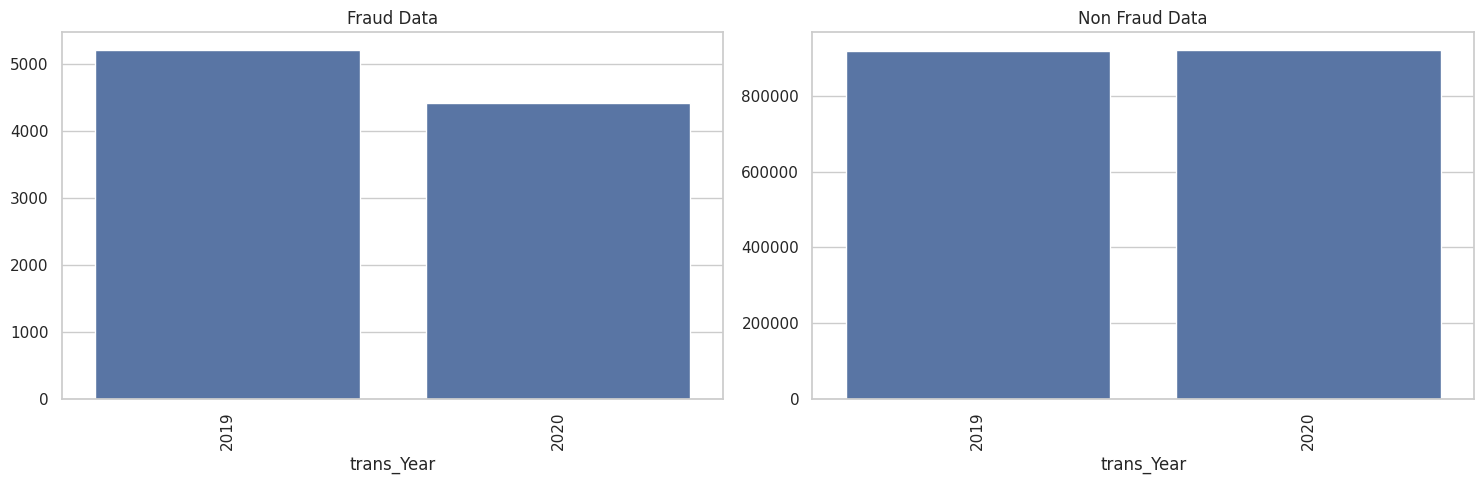

In [165]:
# Aggregate counts for Fraud Data
fraud_year_counts = df_fraud['trans_Year'].value_counts().sort_index()

# Aggregate counts for Non Fraud Data
nonfraud_year_counts = df_nonfraud['trans_Year'].value_counts().sort_index()

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Fraud Data
sns.barplot(x=fraud_year_counts.index, y=fraud_year_counts.values, ax=ax[0])
ax[0].set_title('Fraud Data')

# Plot for Non Fraud Data
sns.barplot(x=nonfraud_year_counts.index, y=nonfraud_year_counts.values, ax=ax[1])
ax[1].set_title('Non Fraud Data')

# Rotate x-axis labels for better readability
for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

Frauds Transcations are decreased over the year, more frauds transactions in 2019.

In [166]:
df_nonfraud.gender.value_counts()

gender
F    1009850
M     832893
Name: count, dtype: int64

Fraud transaction based on gender

In [167]:
# Aggregate transaction counts by gender
df_gender = fraud_data.groupby('gender')['trans_num'].count().reset_index()

# Rename columns
df_gender.columns = ['Gender', 'gender_count']

# Calculate percentage
df_gender['percent'] = (df_gender['gender_count'] / df_gender['gender_count'].sum()) * 100

df_gender

Gender  gender_count    percent
0      F       1014749  54.780408
1      M        837645  45.219592

In [168]:
# Aggregate transaction counts by gender and fraud status
df_fraud_gender = fraud_data.groupby(['gender', 'is_fraud'])['trans_num'].count().reset_index()

# Rename columns
df_fraud_gender.columns = ['Gender', 'is_fraud', 'count']

# Merge with gender counts DataFrame
df_fraud_gender = df_fraud_gender.merge(df_gender, how='inner', on='Gender')

# Calculate percentage within gender group
df_fraud_gender['percent_grp'] = (df_fraud_gender['count'] / df_fraud_gender['gender_count']) * 100

df_fraud_gender

Gender  is_fraud    count  gender_count    percent  percent_grp
0      F         0  1009850       1014749  54.780408    99.517221
1      F         1     4899       1014749  54.780408     0.482779
2      M         0   832893        837645  45.219592    99.432695
3      M         1     4752        837645  45.219592     0.567305

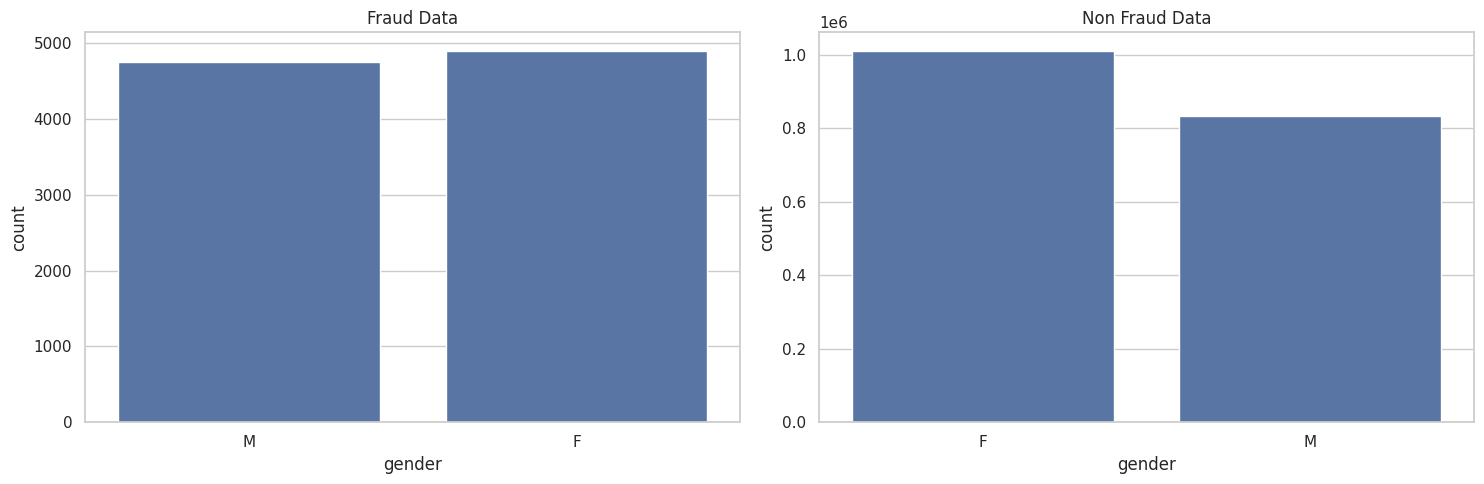

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Fraud Data
sns.countplot(data=df_fraud, x='gender', ax=axes[0])
axes[0].set_title('Fraud Data')

# Plot for Non Fraud Data
sns.countplot(data=df_nonfraud, x='gender', ax=axes[1])
axes[1].set_title('Non Fraud Data')

plt.tight_layout()
plt.show()

Frauds Transcations are done on both male and female but fraud transcations is slightly more on Female's credit card holders

**Fraud transcations in months**

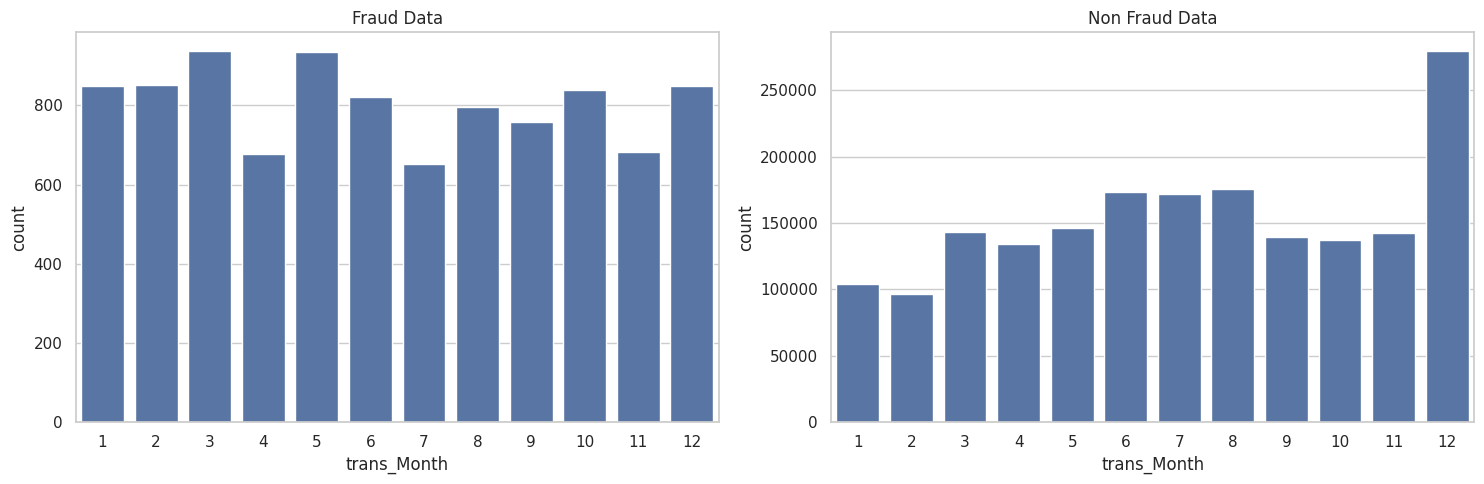

In [170]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Fraud Data
sns.countplot(data=df_fraud, x='trans_Month', ax=axes[0])
axes[0].set_title('Fraud Data')

# Plot for Non Fraud Data
sns.countplot(data=df_nonfraud, x='trans_Month', ax=axes[1])
axes[1].set_title('Non Fraud Data')

plt.tight_layout()
plt.show()

- Fraudulent transactions are more prevalent in the 1st, 2nd, 3rd, and 5th months compared to non-fraudulent transactions, where the latter exhibit lower counts.
- Both fraudulent and non-fraudulent transactions show higher counts in the 12th month.

**Fraud transactions in weekdays**

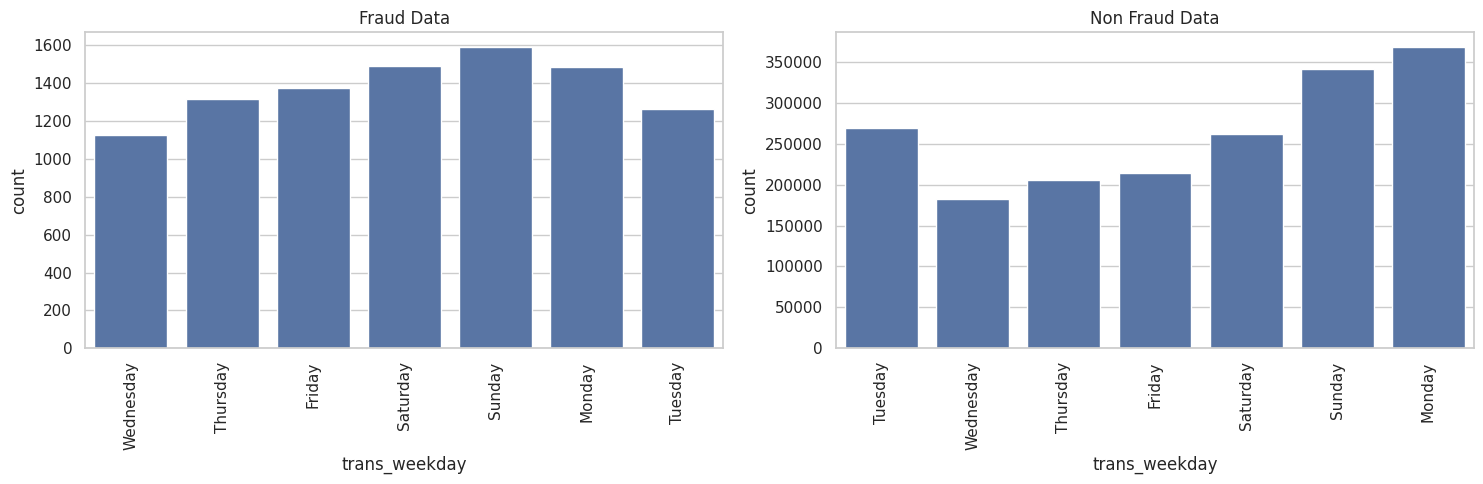

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Fraud Data
sns.countplot(data=df_fraud, x='trans_weekday', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Non Fraud Data
sns.countplot(data=df_nonfraud, x='trans_weekday', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

- Fraudulent transactions are more prevalent on Sunday, Saturday, and Monday, while non-fraudulent transactions exhibit lower counts on Saturday and higher counts on Sunday and Monday.

Fraud transaction on daywise

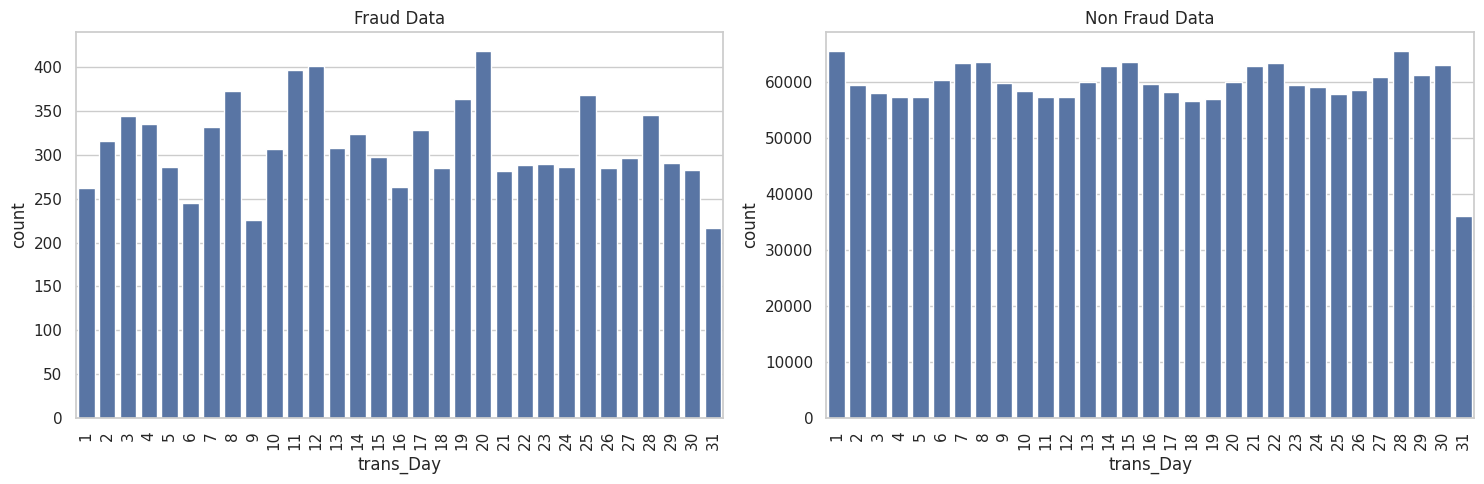

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Fraud Data
sns.countplot(data=df_fraud, x='trans_Day', ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Non Fraud Data
sns.countplot(data=df_nonfraud, x='trans_Day', ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Frauds transactions are more on 20th, 12th and 11th days of month.

Hourly based Fraud Transactions

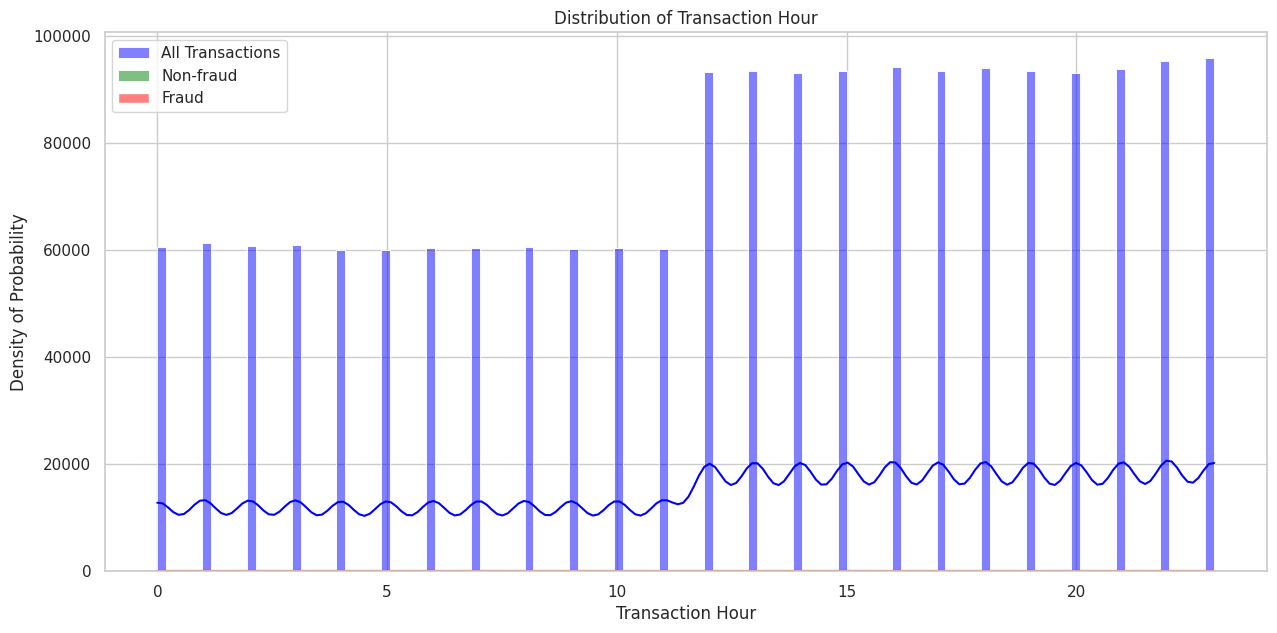

In [173]:
plt.figure(figsize=(15,7))
plt.title('Distribution of Transaction Hour')

sns.histplot(fraud_data['trans_Hour'], kde=True, color='blue', label='All Transactions')

target_0 = fraud_data[fraud_data['is_fraud'] == 0]
target_1 = fraud_data[fraud_data['is_fraud'] == 1]

sns.histplot(target_0['trans_Hour'], kde=True, color='green', label='Non-fraud', stat='density')
sns.histplot(target_1['trans_Hour'], kde=True, color='red', label='Fraud', stat='density')

plt.xlabel('Transaction Hour')
plt.ylabel('Density of Probability')
plt.legend()
plt.show()


Frauds Transcations are done on the odd hours of the day, that is from  22-3 hr (i.e 1am- 2am and then increased after 8pm till 23pm )

**Fraud Transaction in age_bins**

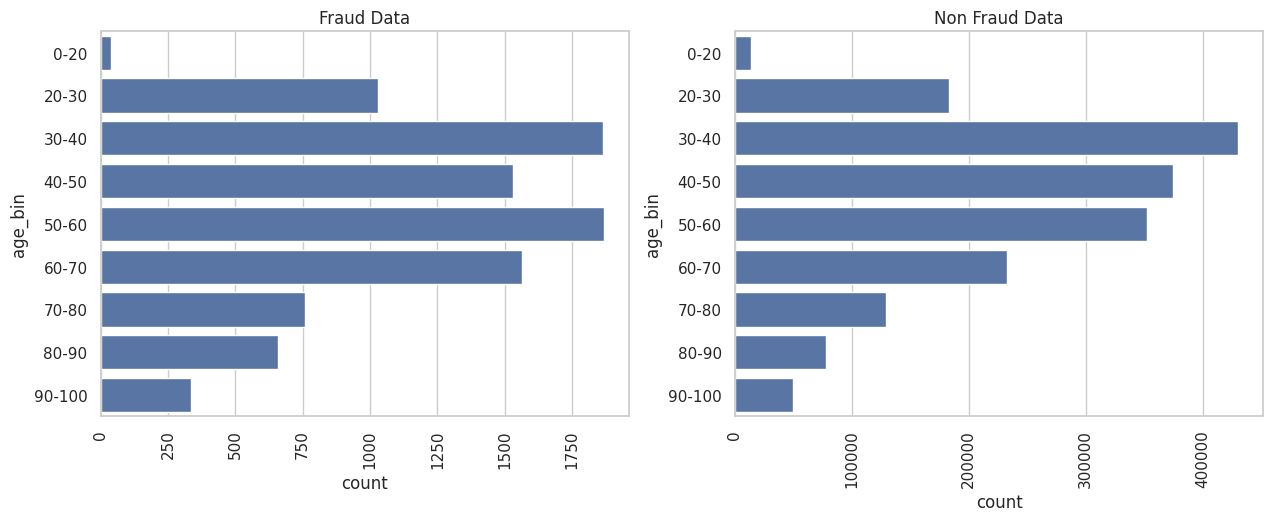

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(df_fraud['age_bin'], ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.countplot(df_nonfraud['age_bin'], ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

Fraudulent transactions predominantly occur within the age range of 20 to 60 among credit card holders. Particularly, within the age bracket of 50 to 60, the frequency of fraudulent transactions is higher compared to normal transactions.

**Fraud Transactions in categories**

In [175]:
df_category = fraud_data[['category','trans_num']].groupby('category').count().reset_index()
df_category.columns = ['Category', 'category_count']

df_category['percent'] = (df_category['category_count'] / df_category['category_count'].sum()) * 100

df_category = df_category.sort_values(by='percent', ascending=False)
df_category

Category  category_count    percent
2    gas_transport          188029  10.150594
4      grocery_pos          176191   9.511529
6             home          175460   9.472067
12    shopping_pos          166463   8.986371
7        kids_pets          161727   8.730702
11    shopping_net          139322   7.521186
0    entertainment          134118   7.240252
1      food_dining          130729   7.057300
10   personal_care          130085   7.022534
5   health_fitness          122553   6.615925
9         misc_pos          114229   6.166561
8         misc_net           90654   4.893883
3      grocery_net           64878   3.502387
13          travel           57956   3.128708

In [176]:
df_fraud_category = fraud_data[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count    percent  percent_grp
4    gas_transport         0  187257          188029  10.150594    99.589425
5    gas_transport         1     772          188029  10.150594     0.410575
8      grocery_pos         0  173963          176191   9.511529    98.735463
9      grocery_pos         1    2228          176191   9.511529     1.264537
13            home         1     265          175460   9.472067     0.151032
12            home         0  175195          175460   9.472067    99.848968
25    shopping_pos         1    1056          166463   8.986371     0.634375
24    shopping_pos         0  165407          166463   8.986371    99.365625
14       kids_pets         0  161423          161727   8.730702    99.812029
15       kids_pets         1     304          161727   8.730702     0.187971
23    shopping_net         1    2219          139322   7.521186     1.592713
22    shopping_net         0  137103          139322   7.521186    98.407287
1    entertainment         1     292          134118   7.240252     0.217719
0    entertainment         0  133826          134118   7.240252    99.782281
3      food_dining         1     205          130729   7.057300     0.156813
2      food_dining         0  130524          130729   7.057300    99.843187
20   personal_care         0  129795          130085   7.022534    99.777069
21   personal_care         1     290          130085   7.022534     0.222931
11  health_fitness         1     185          122553   6.615925     0.150955
10  health_fitness         0  122368          122553   6.615925    99.849045
18        misc_pos         0  113907          114229   6.166561    99.718110
19        misc_pos         1     322          114229   6.166561     0.281890
16        misc_net         0   89472           90654   4.893883    98.696141
17        misc_net         1    1182           90654   4.893883     1.303859
7      grocery_net         1     175           64878   3.502387     0.269737
6      grocery_net         0   64703           64878   3.502387    99.730263
26          travel         0   57800           57956   3.128708    99.730830
27          travel         1     156           57956   3.128708     0.269170

In [177]:
df_fraud_cate = df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by='percent_grp', ascending=False)
df_fraud_cate

Category  is_fraud  count  category_count    percent  percent_grp
23    shopping_net         1   2219          139322   7.521186     1.592713
17        misc_net         1   1182           90654   4.893883     1.303859
9      grocery_pos         1   2228          176191   9.511529     1.264537
25    shopping_pos         1   1056          166463   8.986371     0.634375
5    gas_transport         1    772          188029  10.150594     0.410575
19        misc_pos         1    322          114229   6.166561     0.281890
7      grocery_net         1    175           64878   3.502387     0.269737
27          travel         1    156           57956   3.128708     0.269170
21   personal_care         1    290          130085   7.022534     0.222931
1    entertainment         1    292          134118   7.240252     0.217719
15       kids_pets         1    304          161727   8.730702     0.187971
3      food_dining         1    205          130729   7.057300     0.156813
13            home         1    265          175460   9.472067     0.151032
11  health_fitness         1    185          122553   6.615925     0.150955

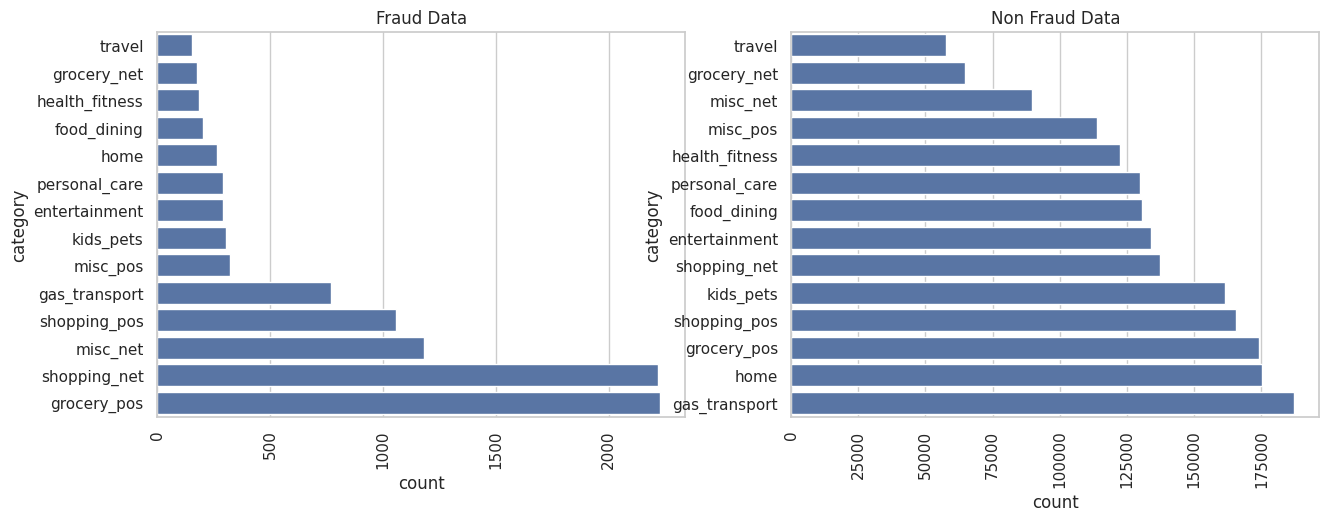

In [178]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['category'],order=df_fraud['category'].value_counts().sort_values().index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['category'],order=df_nonfraud['category'].value_counts().sort_values().index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Fraudulent transactions are more frequent in categories such as grocery_pos, shopping_net, misc_net, shopping_pos, and gas_transport. Specifically, in the shopping_net category, the frequency of fraudulent transactions is higher relative to normal transactions. Conversely, fraudulent transactions are slightly less common in the gas_transport and shopping_pos categories, where the count of normal transactions is higher.

**Fraud Transactions in job**

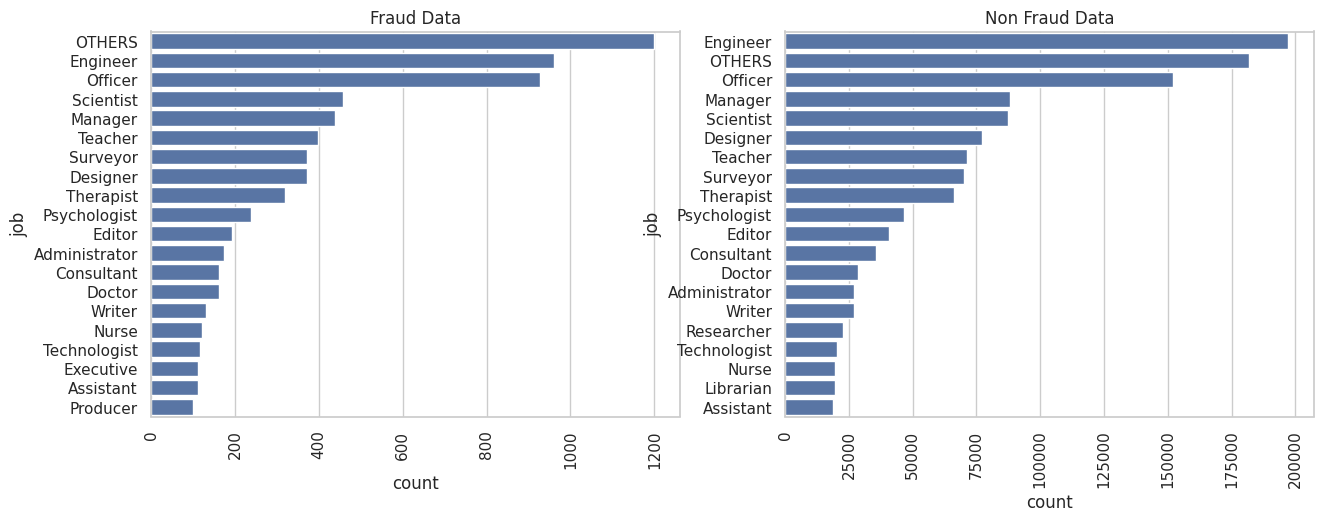

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(df_fraud['job'], order=df_fraud['job'].value_counts().iloc[:20].index, ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(df_nonfraud['job'], order=df_nonfraud['job'].value_counts().iloc[:20].index, ax=axes[1])
axes[1].set_title('Non Fraud Data')
axes[1].tick_params(axis='x', rotation=90)

plt.show()

Frauds transactions are done more at Engineer, officer, others, scientist Categories

### 10. Fraud Transactions in State

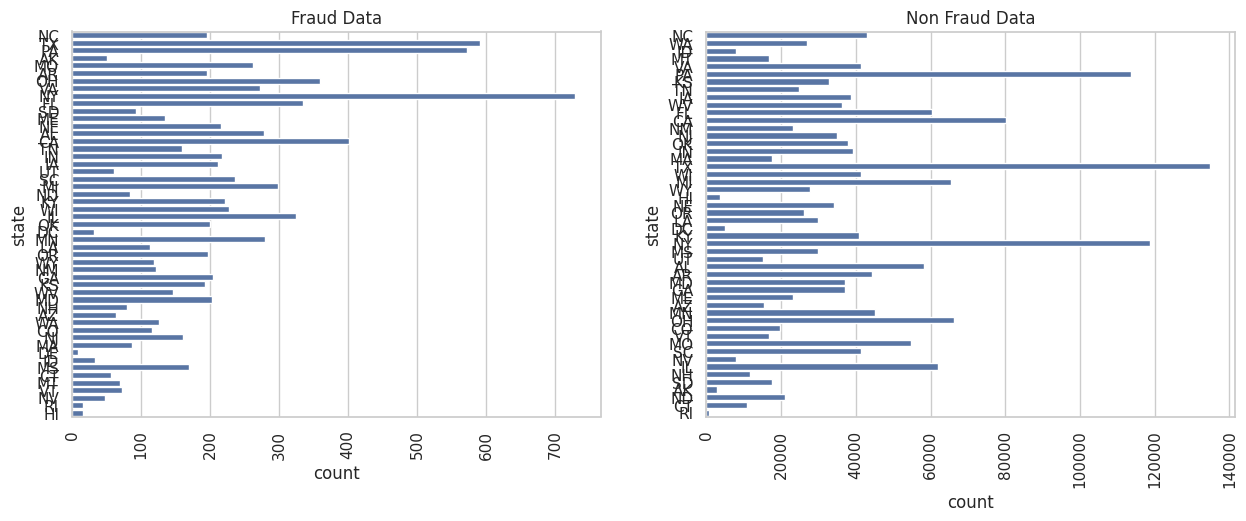

In [180]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in NY, TX and PA States.

### 11. Fraud Transactions in State_bin

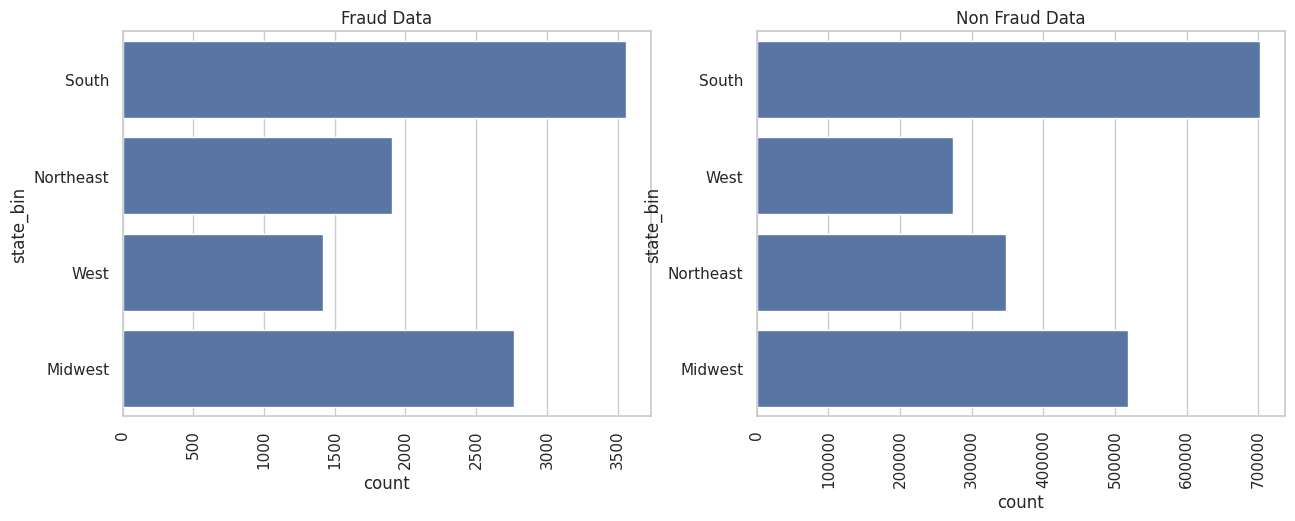

In [181]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in South , MIdwest and lower in West and Northeast States.

### 12. Fraud Transactions in city (top 20)

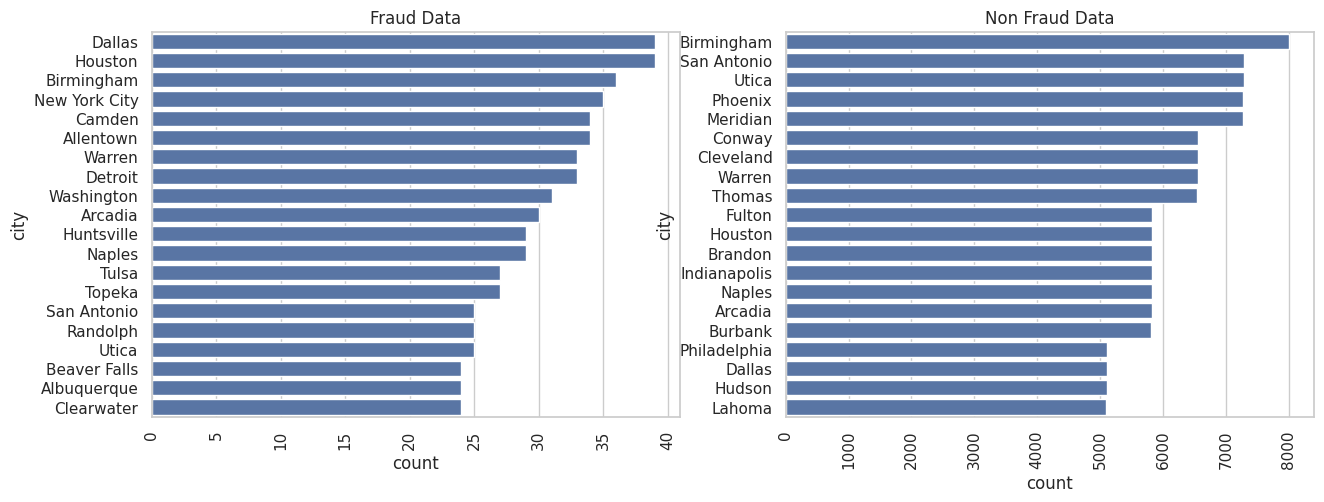

In [182]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['city'],order=df_fraud.city.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['city'],order=df_nonfraud.city.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in Dallas , Houston City and Birmingham City..

### 13. Fraud Transactions in street(top 20)

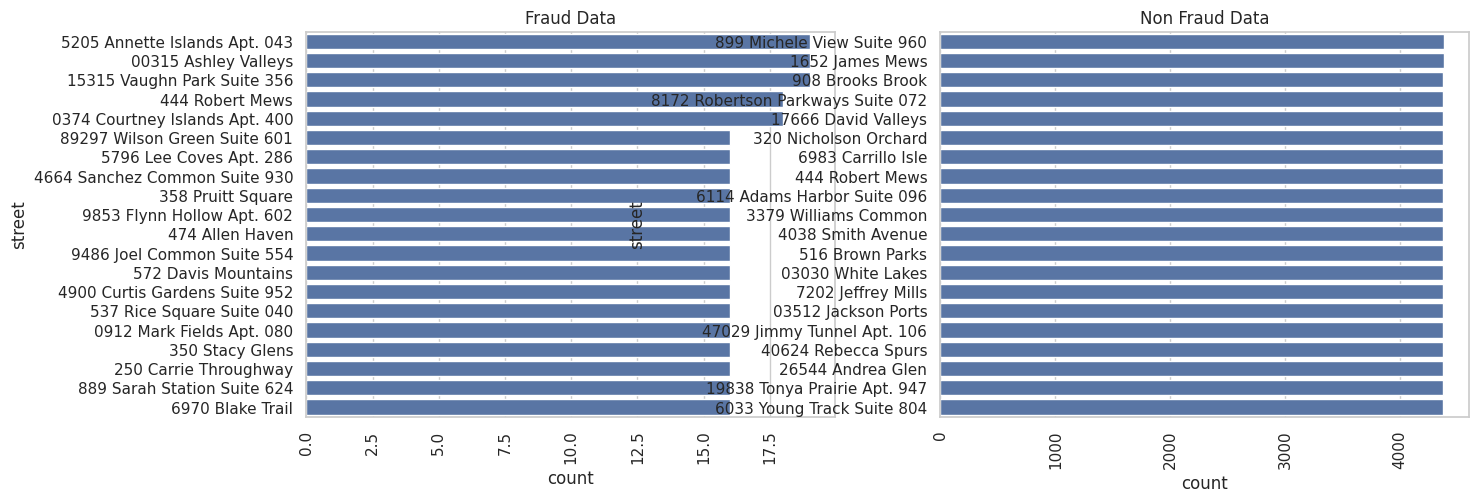

In [183]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['street'],order=df_fraud.street.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['street'],order=df_nonfraud.street.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- Frauds transactions are more in 00315 Ashley Valleys, 15315 Vaughn Park Suite 356 and 5205 Annette Islands Apt. 043 street.

### 14. Fraud Transactions in merchant(top 20)

In [184]:
df_merchant = fraud_data[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count   percent
316                      fraud_Kilback LLC            6262  0.338049
105                      fraud_Cormier LLC            5246  0.283201
571                       fraud_Schumm PLC            5195  0.280448
349                         fraud_Kuhn LLC            5031  0.271594
70                         fraud_Boyer PLC            4999  0.269867
..                                     ...             ...       ...
143    fraud_Douglas, DuBuque and McKenzie            1101  0.059437
633                     fraud_Treutel-King            1098  0.059275
544                 fraud_Satterfield-Lowe            1095  0.059113
221     fraud_Hahn, Douglas and Schowalter            1091  0.058897
516  fraud_Ritchie, Bradtke and Stiedemann            1090  0.058843

[693 rows x 3 columns]

In [185]:
df_fraud_merchant = fraud_data[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100
df_fraud_merchant.sort_values(by = ['merchant_count'], ascending=False)

Merchant  is_fraud  count  merchant_count  \
631                       fraud_Kilback LLC         1     62            6262   
630                       fraud_Kilback LLC         0   6200            6262   
211                       fraud_Cormier LLC         1     53            5246   
210                       fraud_Cormier LLC         0   5193            5246   
1135                       fraud_Schumm PLC         0   5154            5195   
...                                     ...       ...    ...             ...   
1082                 fraud_Satterfield-Lowe         0   1091            1095   
1083                 fraud_Satterfield-Lowe         1      4            1095   
442      fraud_Hahn, Douglas and Schowalter         1      5            1091   
441      fraud_Hahn, Douglas and Schowalter         0   1086            1091   
1027  fraud_Ritchie, Bradtke and Stiedemann         0   1090            1090   

       percent  percent_grp  
631   0.338049     0.990099  
630   0.338049    99.009901  
211   0.283201     1.010294  
210   0.283201    98.989706  
1135  0.280448    99.210780  
...        ...          ...  
1082  0.059113    99.634703  
1083  0.059113     0.365297  
442   0.058897     0.458295  
441   0.058897    99.541705  
1027  0.058843   100.000000  

[1378 rows x 6 columns]

In [186]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  merchant_count  \
673                     fraud_Kozey-Boehm         1     60            2758   
490     fraud_Herman, Treutel and Dickens         1     38            1870   
1226                     fraud_Terry-Huel         1     56            2864   
607                 fraud_Kerluke-Abshire         1     50            2635   
884   fraud_Mosciski, Ziemann and Farrell         1     53            2821   
...                                   ...       ...    ...             ...   
775        fraud_Lesch, D'Amore and Brown         1      1            2659   
1089        fraud_Schaefer, Fay and Hilll         1      1            2664   
950       fraud_Parker, Nolan and Trantow         1      1            2795   
1335                    fraud_Windler LLC         1      1            3170   
977   fraud_Prosacco, Kreiger and Kovacek         1      1            3454   

       percent  percent_grp  
673   0.148888     2.175489  
490   0.100950     2.032086  
1226  0.154611     1.955307  
607   0.142248     1.897533  
884   0.152289     1.878766  
...        ...          ...  
775   0.143544     0.037608  
1089  0.143814     0.037538  
950   0.150886     0.035778  
1335  0.171130     0.031546  
977   0.186461     0.028952  

[685 rows x 6 columns]

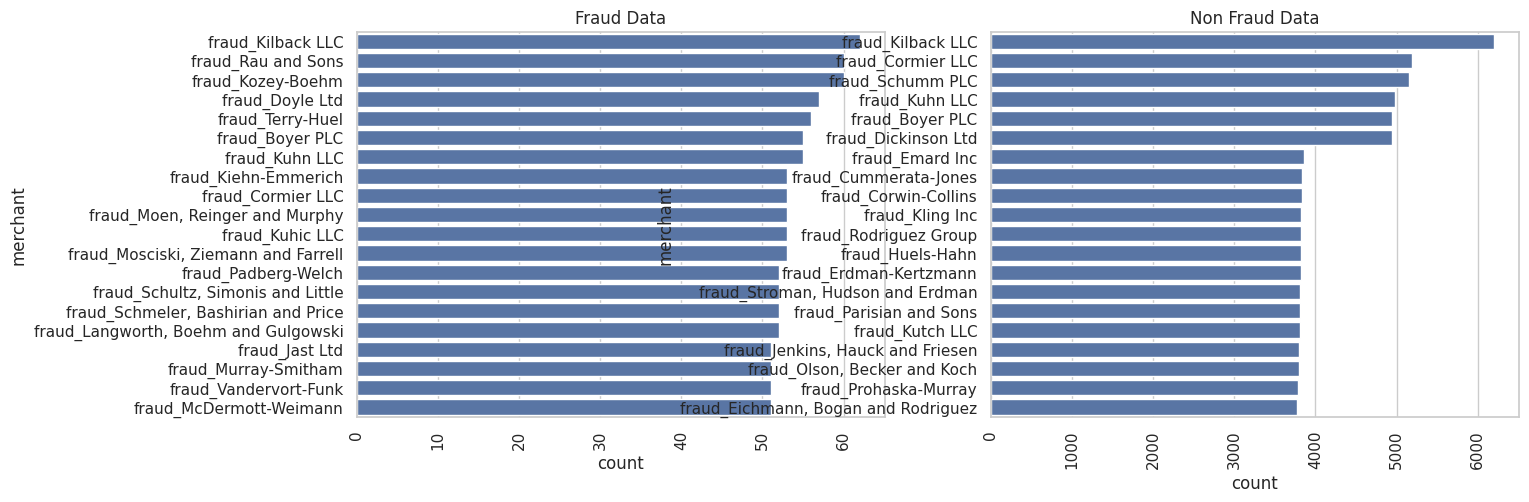

In [187]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)### 13. Fraud Transactions in street(top 20)
sns.countplot(df_fraud['merchant'],order=df_fraud.merchant.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['merchant'],order=df_nonfraud.merchant.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Frauds transactions are more for fraud_Kilback LLC, fraud_Rau and sons, fraud_Kozey.Boehm merchants. As shown in figure
    fraud_Kilback LLC did 6000 cost transaction there is fraud of 60 and so on

### Mean of Fraud and non Fraud Transactions

In [188]:
pd.concat(
[fraud_data['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
fraud_data.loc[fraud_data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.852394e+06                1.842743e+06   
1     mean              7.006357e+01                6.765128e+01   
2      std              1.592540e+02                1.535481e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.745000e+01                4.724000e+01   
5      95%              1.953400e+02                1.895900e+02   
6    99.9%              1.517241e+03                1.519623e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

Distribution and Mean of Fraud Transaction's Amount is way different from the Non Fraud Transaction's Amount

Mean of Non Fraud Transactions: 67.6
Mean of Fraud Transactions: 531.3

### Overall Amount Distribution

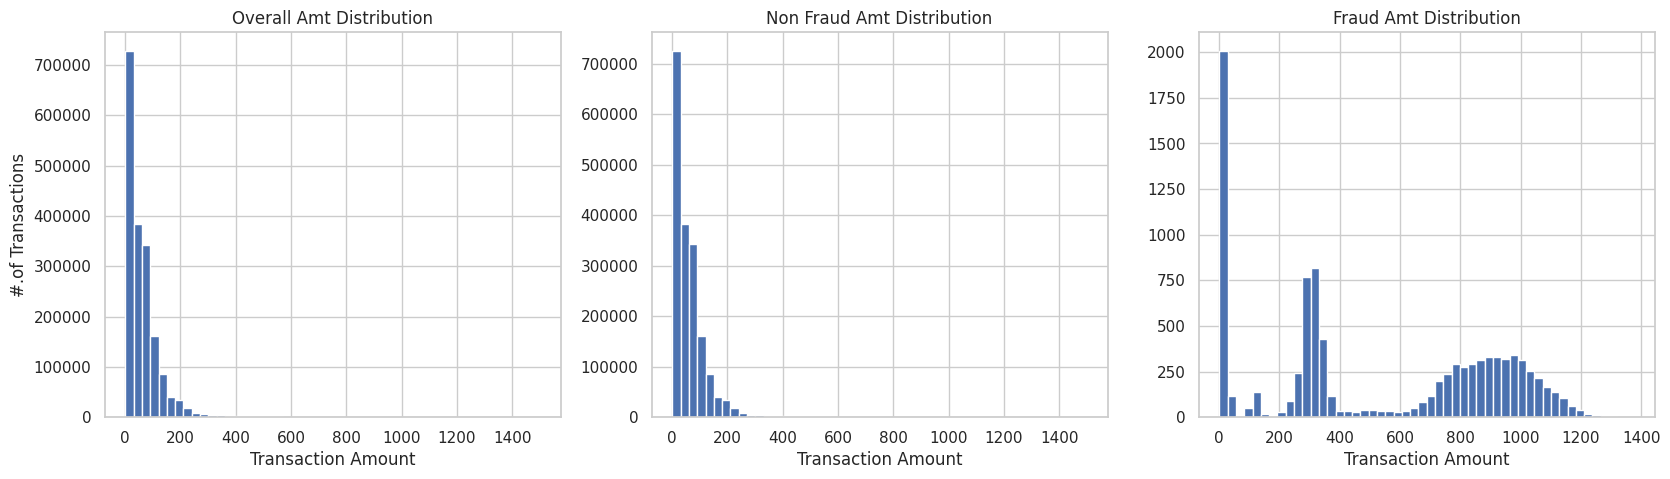

In [189]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(fraud_data[fraud_data['amt']<=1500]['amt'], bins=50)
ax[1].hist(fraud_data[(fraud_data['is_fraud']==0) & (fraud_data['amt']<=1500)]['amt'], bins=50)
ax[2].hist(fraud_data[(fraud_data['is_fraud']==1) & (fraud_data['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

1. Plot the overall distribution of transaction amounts for all data where the transaction amount is less than or equal to 1500, including both fraud and non-fraud transactions.

2. Plot the distribution of transaction amounts for non-fraudulent transactions where the transaction amount is less than or equal to 1500 and the approximate number of transactions is around 600.

3. Plot the distribution of transaction amounts for fraudulent transactions where the transaction amount is less than or equal to 1500 and the approximate number of transactions reaches around 1300, as depicted in the figure.

### Fraud Transactions in AMT

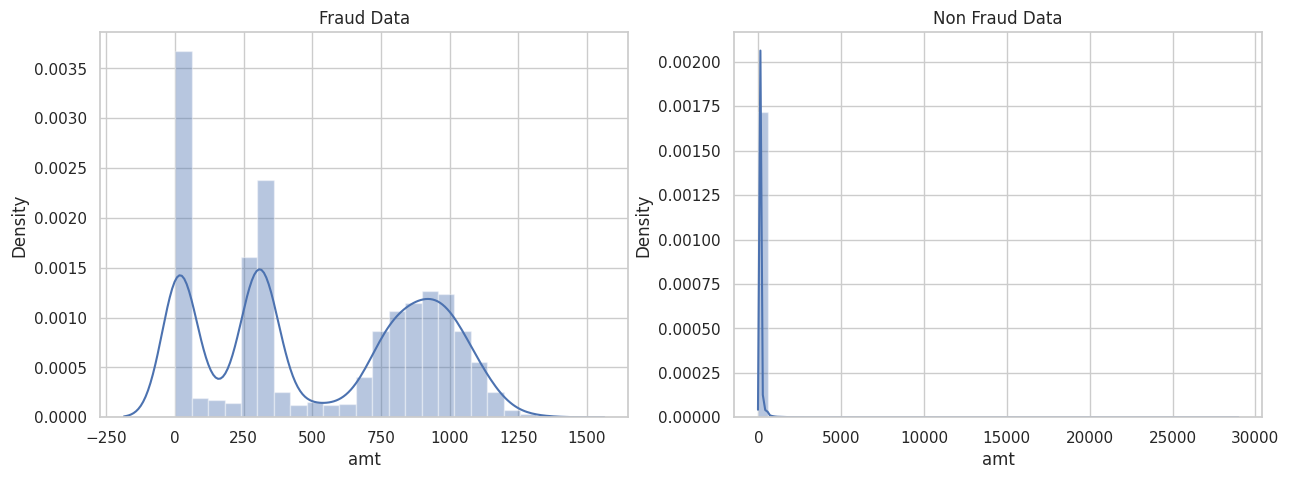

In [190]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['amt'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['amt'])
plt.title('Non Fraud Data')
plt.show()

The graph illustrates a significant variation in the deducted amounts from accounts in fraudulent transactions.

### Fraud Transactions in city population

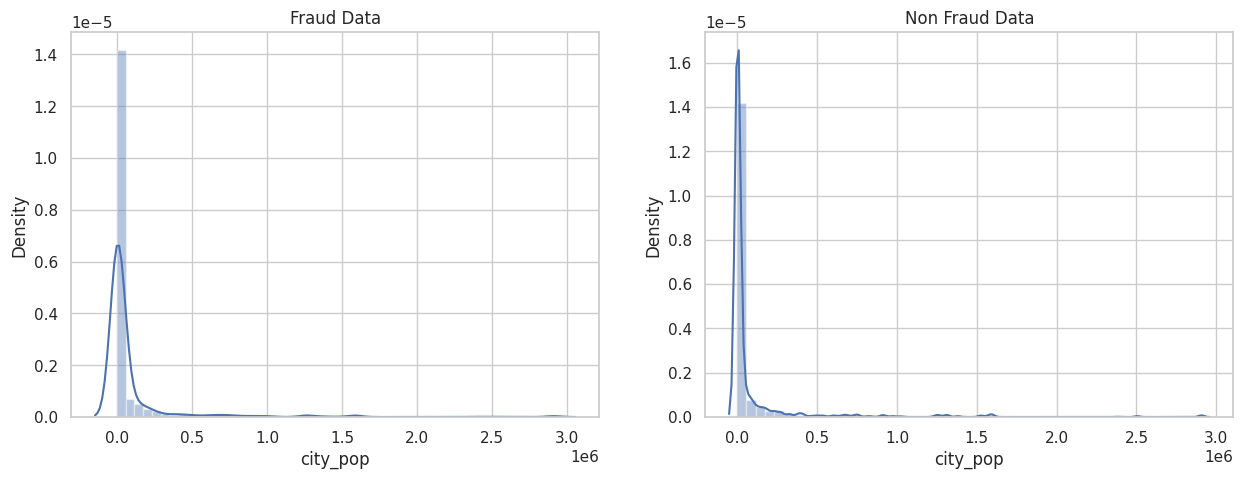

In [191]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['city_pop'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['city_pop'])
plt.title('Non Fraud Data')
plt.show()

  
#### city_pop is same for fraud and non fraud data .

### Fraud Transactions in dist'

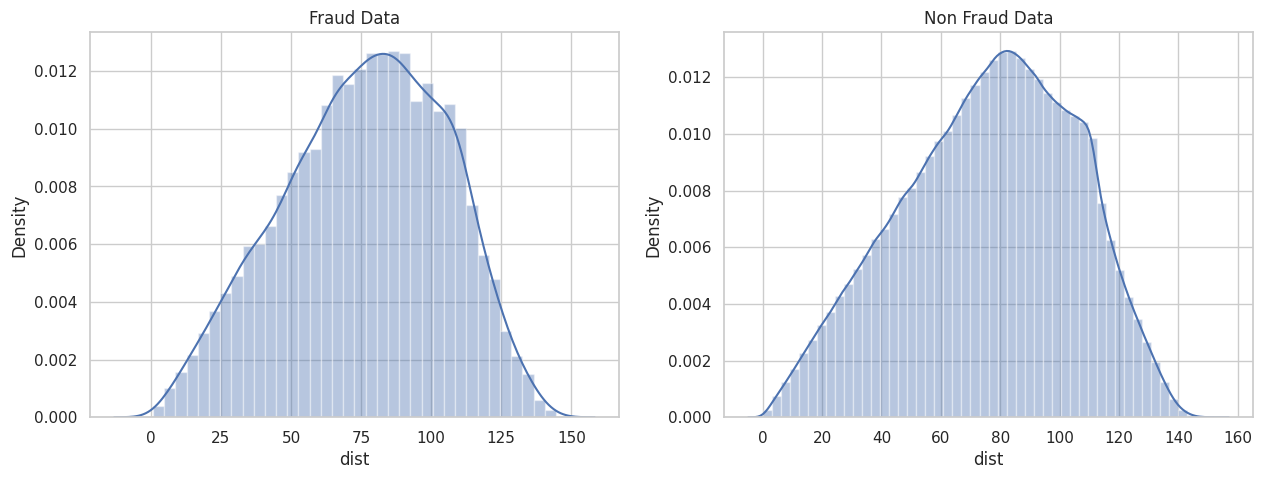

In [192]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['dist'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['dist'])
plt.title('Non Fraud Data')
plt.show()


    
#### Dist is same fror fraud_data and non fraud_data both

### Fraud Transactions in time_since_prev_transaction

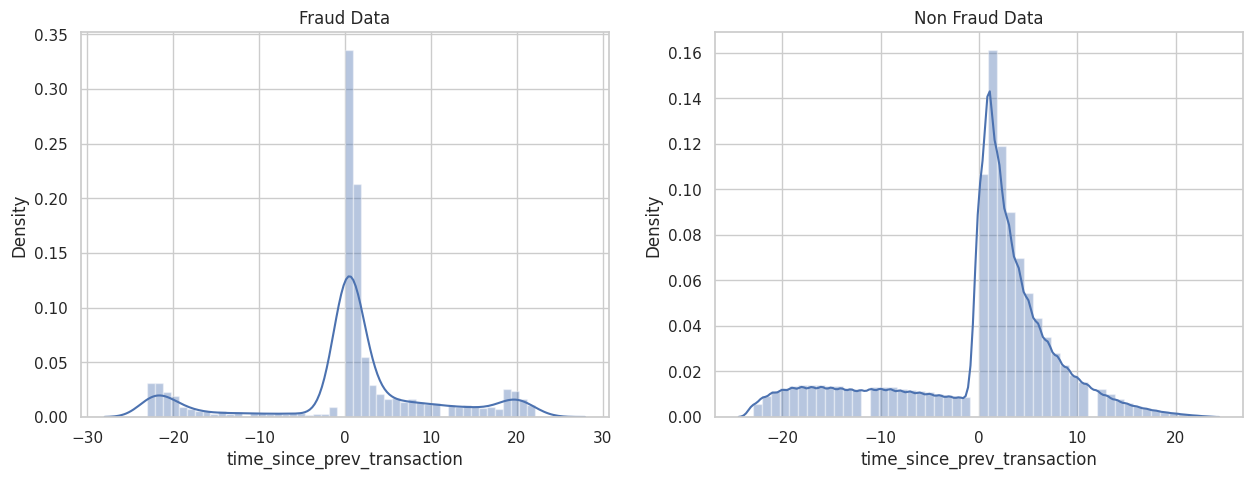

In [193]:

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['time_since_prev_transaction'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['time_since_prev_transaction'])
plt.title('Non Fraud Data')
plt.show()

The behavior of the "time_since_prev_transaction" feature is similar in both fraudulent and non-fraudulent data, exhibiting approximately the same pattern.

### Fraud Transactions in distance_between_merchants

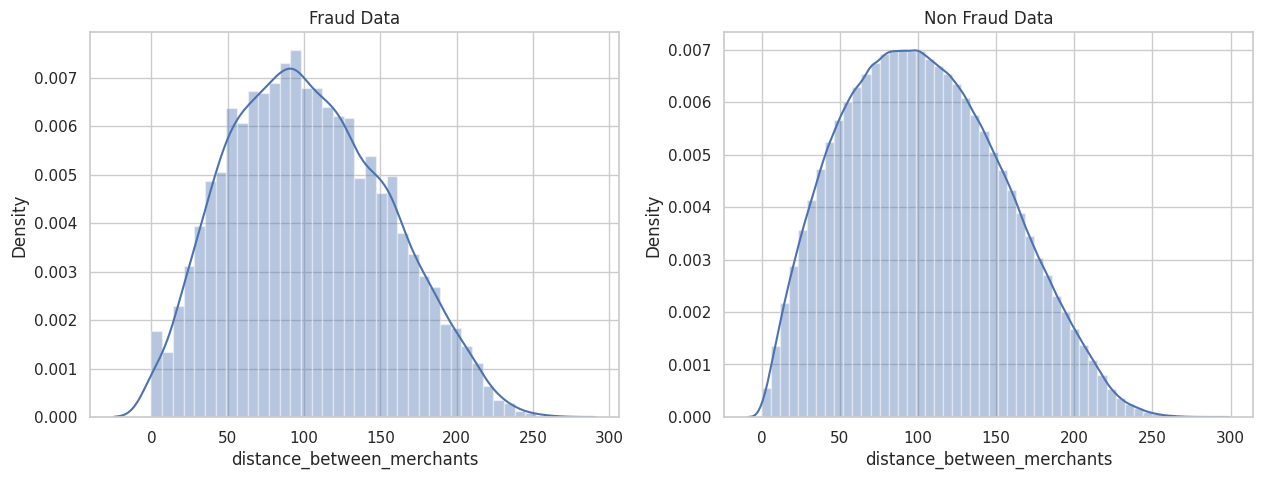

In [194]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['distance_between_merchants'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['distance_between_merchants'])
plt.title('Non Fraud Data')
plt.show()

The "distance_between_merchants" feature shows a similar behavior in both fraudulent and non-fraudulent data, with approximately the same patterns observed.

### Fraud Transactions in 30 Day Transactions by Customers

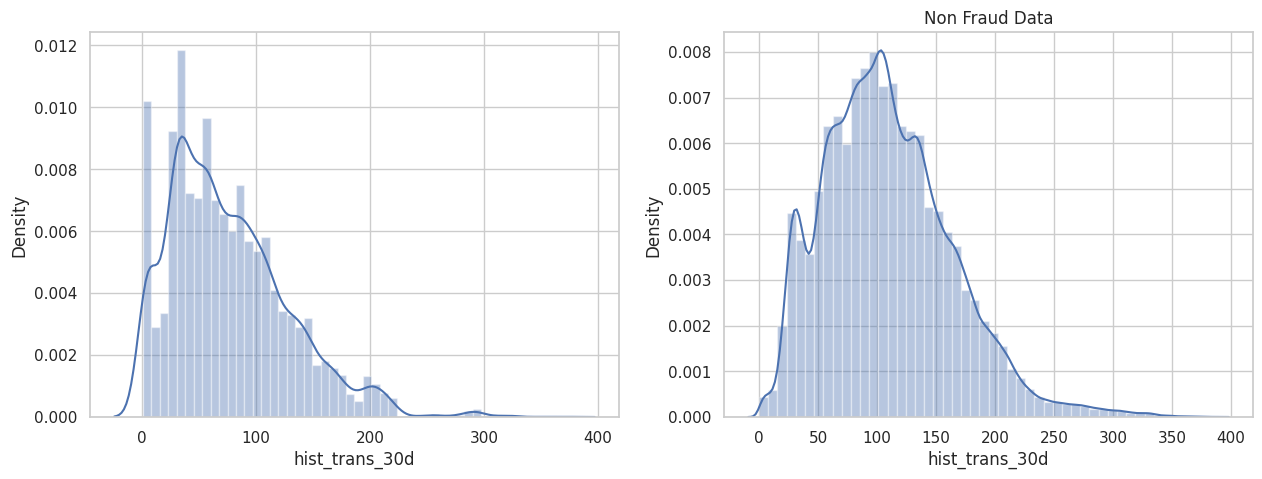

In [195]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_30d'])

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_30d'])
plt.title('Non Fraud Data')
plt.show()

The moving average amount in Frauds Transcations are normally distributed as compared to non_fraud data .

### Fraud Transactions in 30 Day Orders Amt Avg by Customers

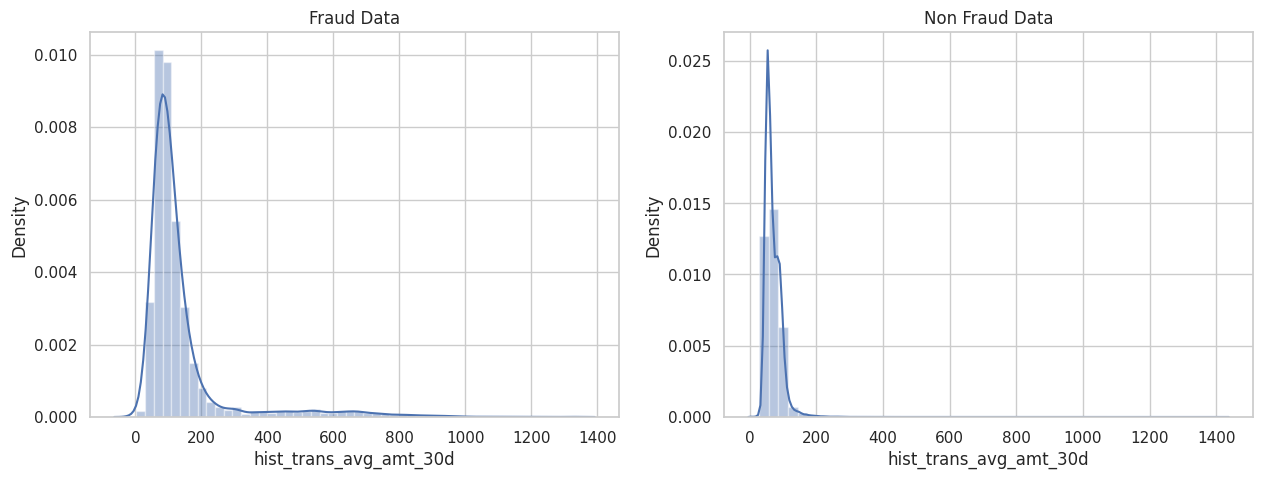

In [196]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_30d'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_30d'])
plt.title('Non Fraud Data')
plt.show()

The spread of the distribution for "hist_trans_avg_amt_24h" in fraudulent transactions is similar to that in non-fraudulent transactions.

### Fraud Transactions in 24 hours Orders Amt Avg by Customers

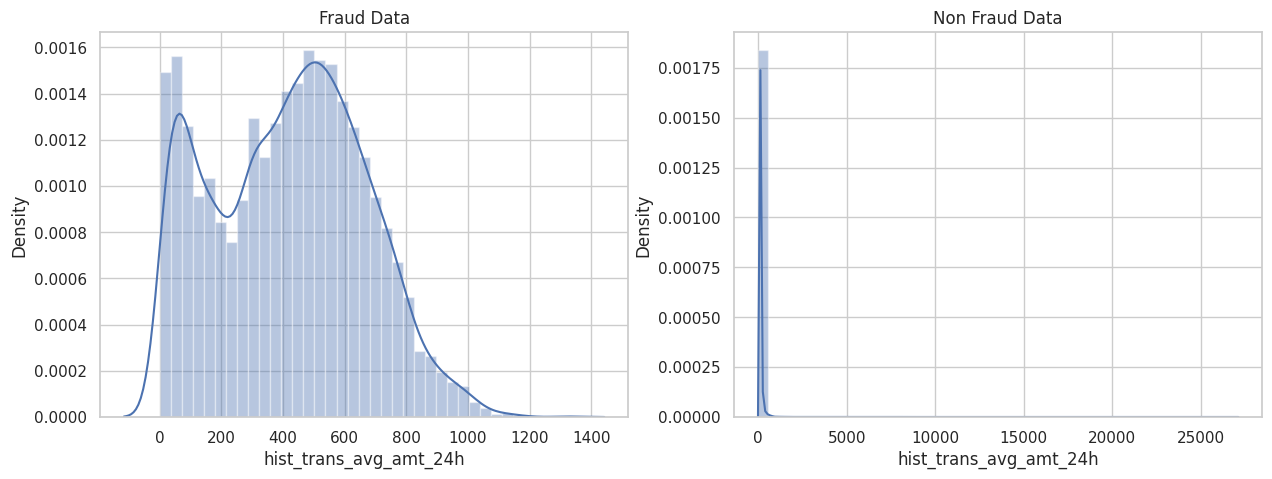

In [197]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df_fraud['hist_trans_avg_amt_24h'])
plt.title('Fraud Data')

plt.subplot(1,2,2)
sns.distplot(df_nonfraud['hist_trans_avg_amt_24h'])
plt.title('Non Fraud Data')
plt.show()

The distribution of "hist_trans_avg_amt_24h" in fraudulent transactions exhibits a wide spread, with the majority of frauds occurring at lower amounts compared to non-fraudulent transactions.


### Fraud Transactions based on category and amt

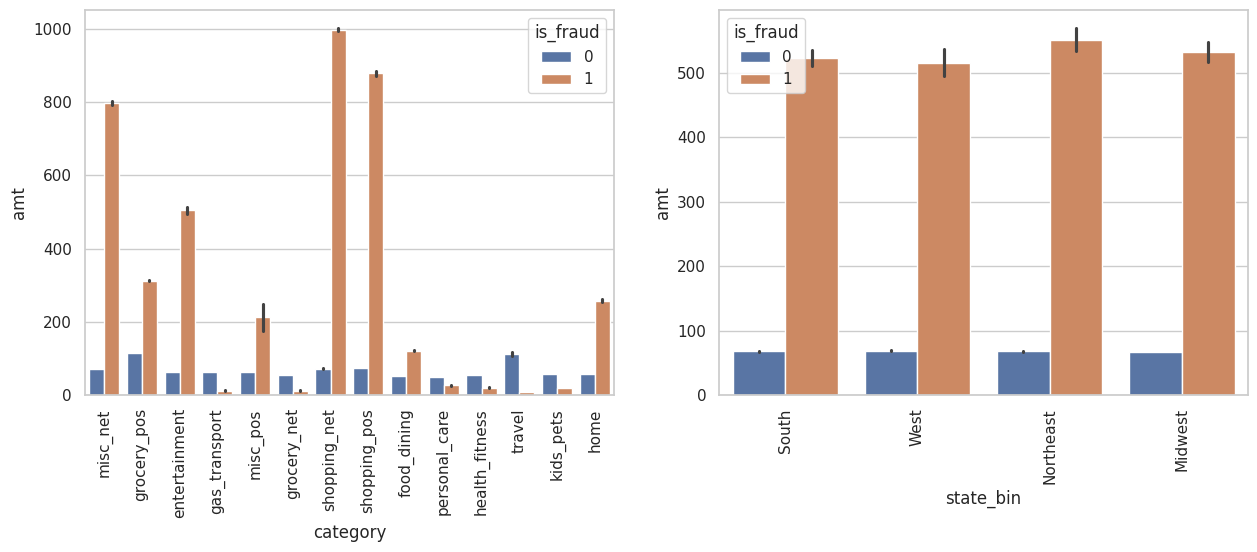

In [198]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

The categories where the highest amount was spent in fraudulent transactions include shopping_net, shopping_pos, and misc_net.

The region where the highest amount was spent in fraudulent transactions is the Northeast.

### Fraud Transactions based on state vs amt and trans_day vs amt

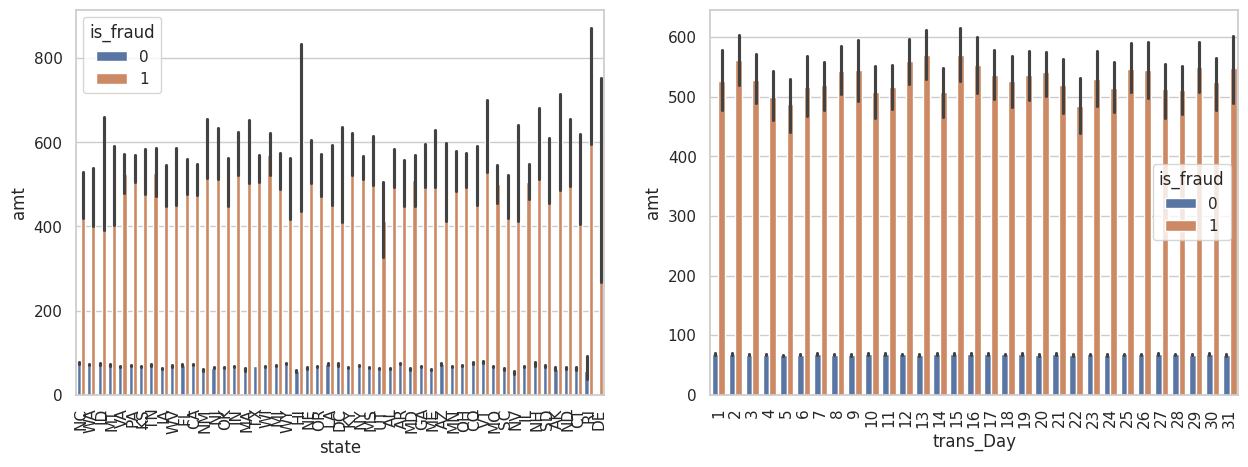

In [199]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

The states where the highest amount was spent in fraudulent transactions are RI, HI, DE, and VT.

The days of the month when the highest amount was spent in fraudulent transactions are the 2nd, 13th, 15th, and 31st.

###Fraud Transactions based on age_bin vs amt , trans_year vs amt

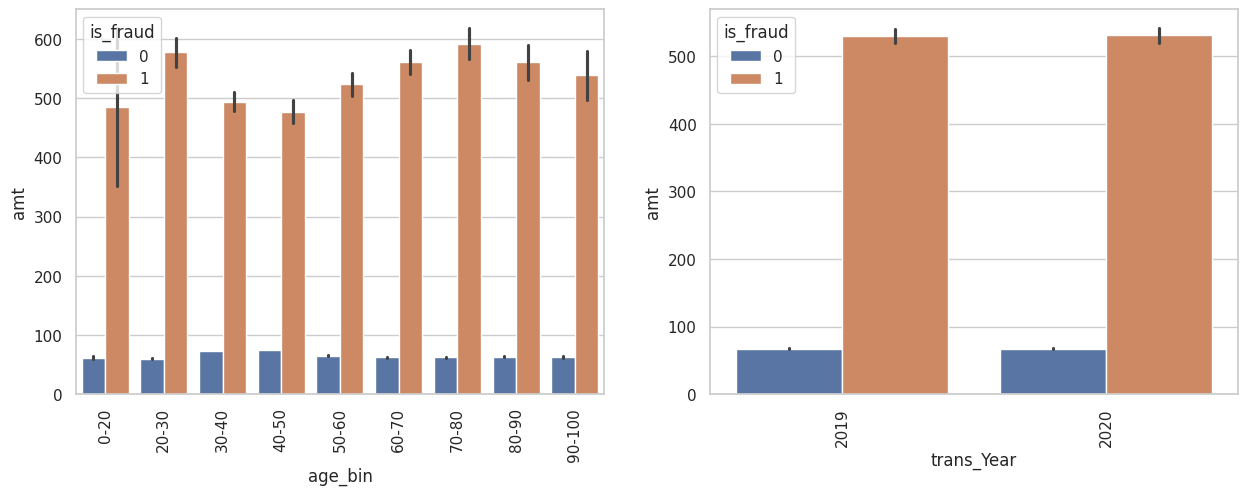

In [200]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='age_bin', y='amt', hue='is_fraud', data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Year',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

- Fraudulent transactions with the highest spending involve credit card holders in the "0-20," "60-70," and "70-80" age bins.
- The maximum spending in fraudulent transactions remained consistent across both years.

### Fraud Transactions based on job , merchant with amt

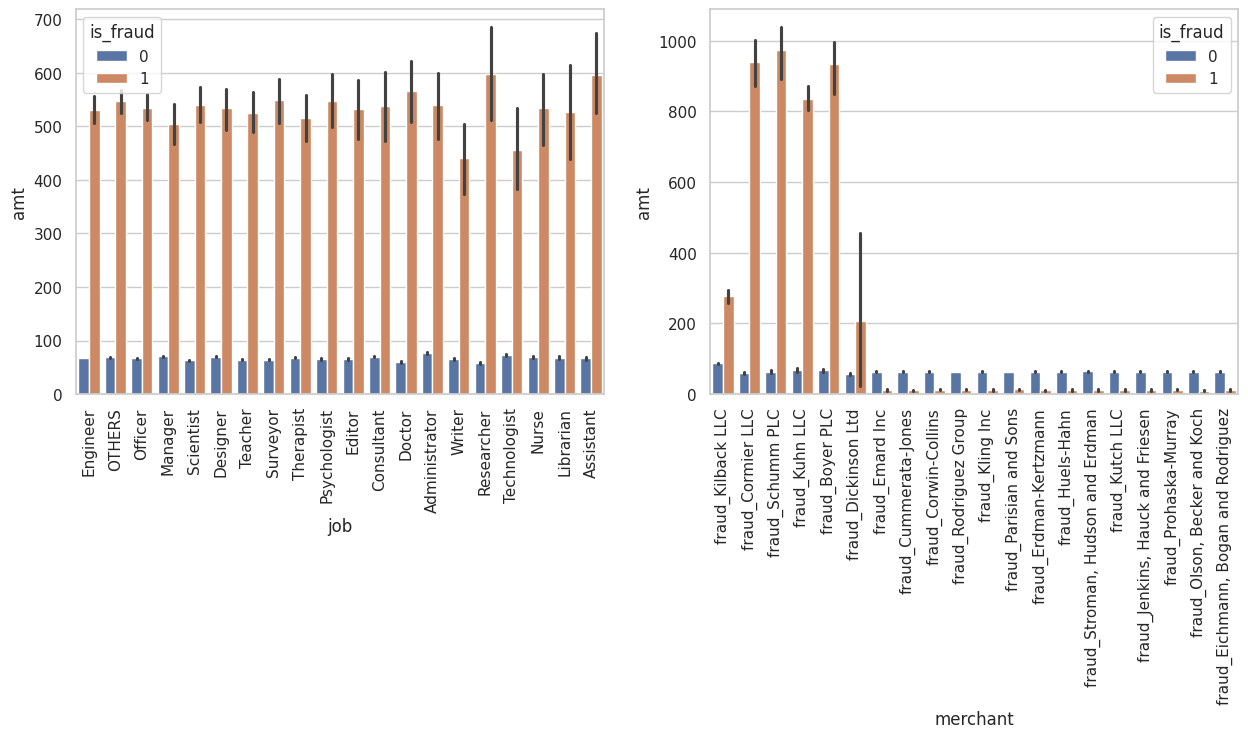

In [201]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=fraud_data,order=fraud_data.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=fraud_data,order=fraud_data.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

- The highest spending in fraudulent transactions occurred among credit card holders with job titles of Researcher and Assistant.
- The highest spending in fraudulent transactions took place at merchants such as 'fraud_Kilback LLC,' 'fraud_Cormier LLC,' 'fraud_Schumm PLC,' 'fraud_Kuhn LLC,' 'fraud_Boyer PLC,' and 'fraud_Dickinson Ltd.'

### Fraud Transactions based on trans_hour , gender with amt

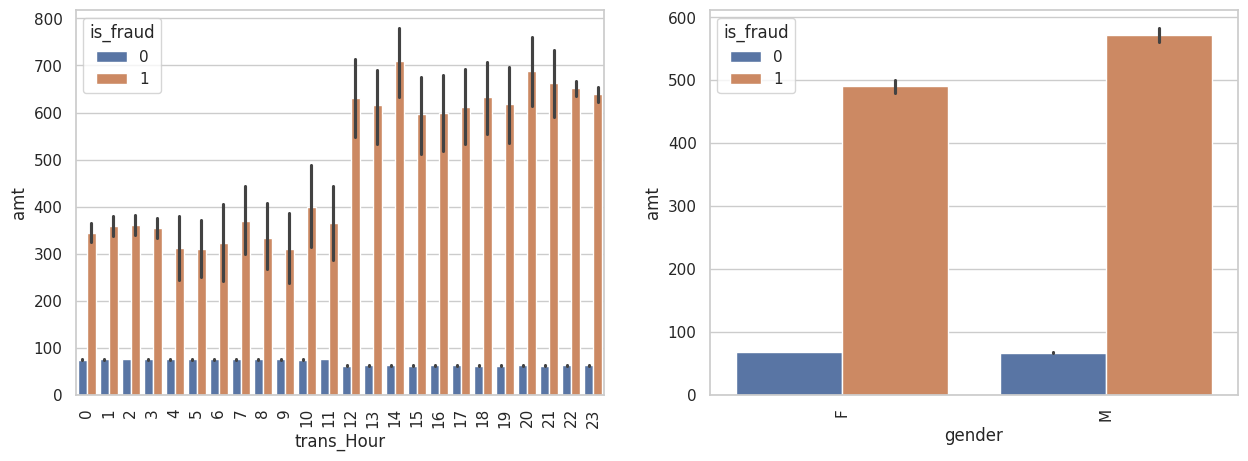

In [202]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

- The highest spending in fraudulent transactions predominantly occurred between 12 to 23 hours.
- The highest spending in fraudulent transactions was attributed to male credit card holders.

### Fraud Transactions based on trans_month, trans_weekday with amt

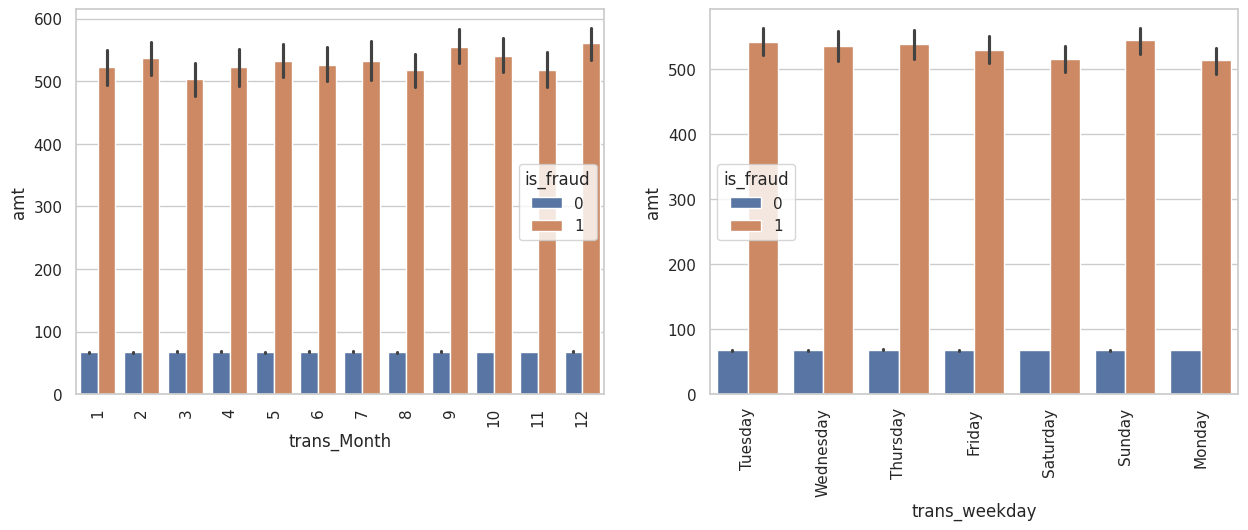

In [203]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday',y='amt',hue='is_fraud',data=fraud_data)
plt.xticks(rotation = 90)
plt.show()

Similar amounts were spent in fraudulent transactions consistently throughout the month.

Similar amounts were spent in fraudulent transactions consistently throughout the weekdays.

### Amount by percentage of transactions

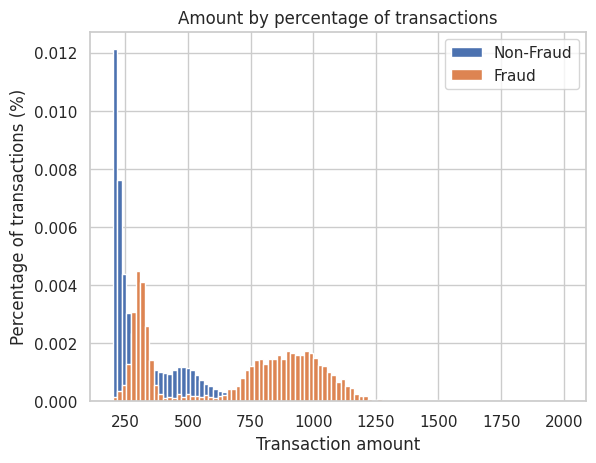

In [204]:
# Plot of high value transactions

bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.amt, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.amt, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions")
plt.xlabel("Transaction amount")
plt.ylabel("Percentage of transactions (%)")
plt.show()

The graph indicates that fraudulent transactions occurred more frequently within a certain range.

It appears that distinguishing fraud from normal transactions based solely on transaction amount could be challenging.

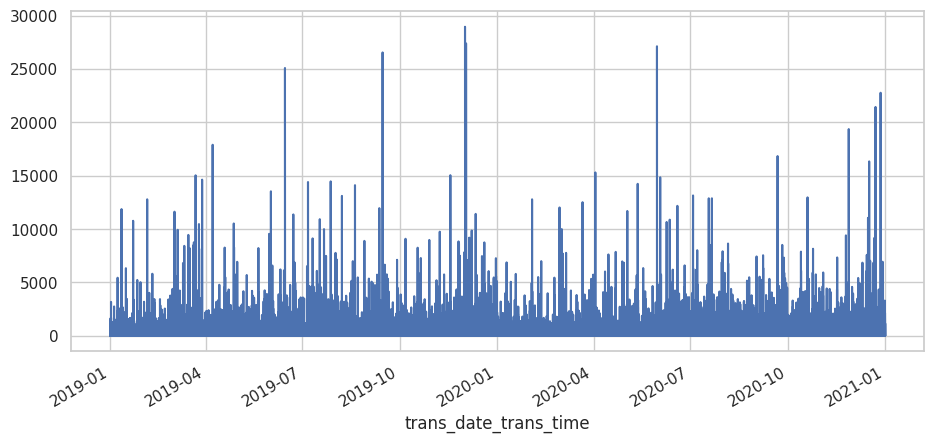

In [205]:
fraud_data.groupby('trans_date_trans_time')['amt'].sum().plot(figsize=[11,5])
plt.show()

The maximum amount of fraud transactions majorly done at jan of 2020 and 2021 , means at new year eve more frauded transactions done.

### Year Month vs Number of Transactions

In [206]:
df_timeline01 = fraud_data.groupby(fraud_data['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['trans_year_month','num_of_transactions','customers']
df_timeline01.head()

trans_year_month  num_of_transactions  customers
0          2019-01                52525        913
1          2019-02                49866        918
2          2019-03                70939        916
3          2019-04                68078        913
4          2019-05                72532        910

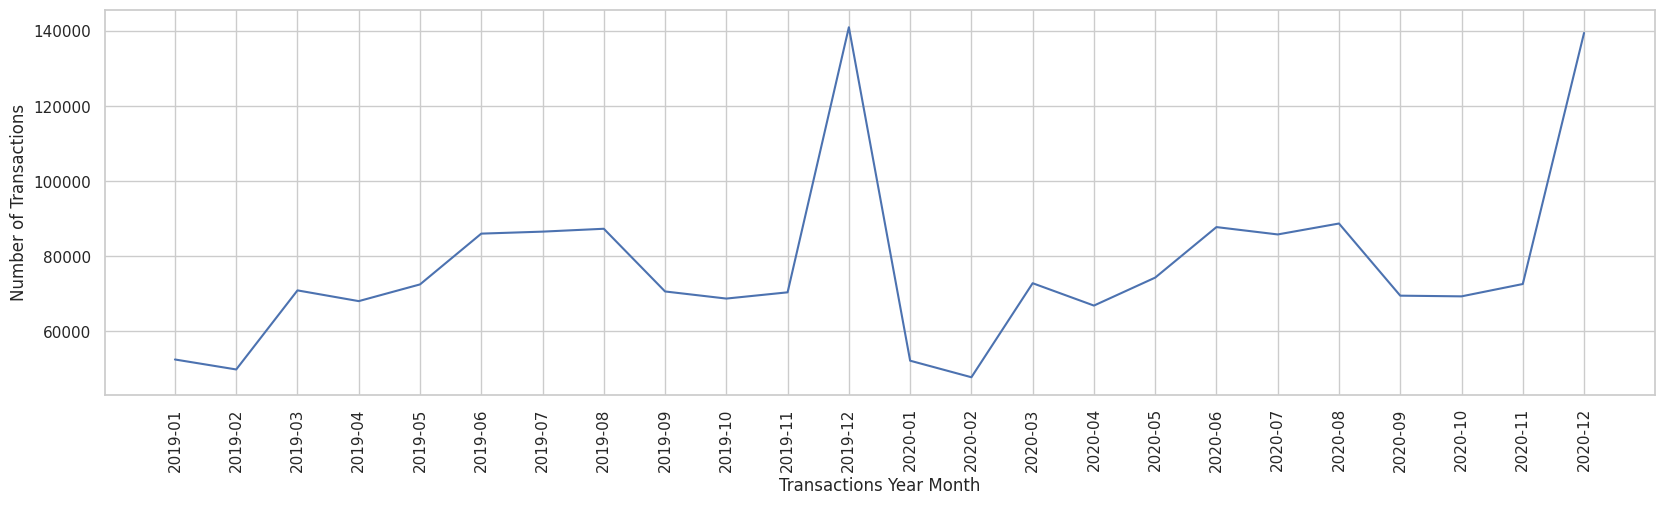

In [207]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Transactions')
plt.show()


The number of transactions per month is depicted in the figure, showing an increase in November and December of both 2020 and 2021, while the remaining months exhibit normal transaction patterns.

### Year Month vs Number of Customers Done the Transactions

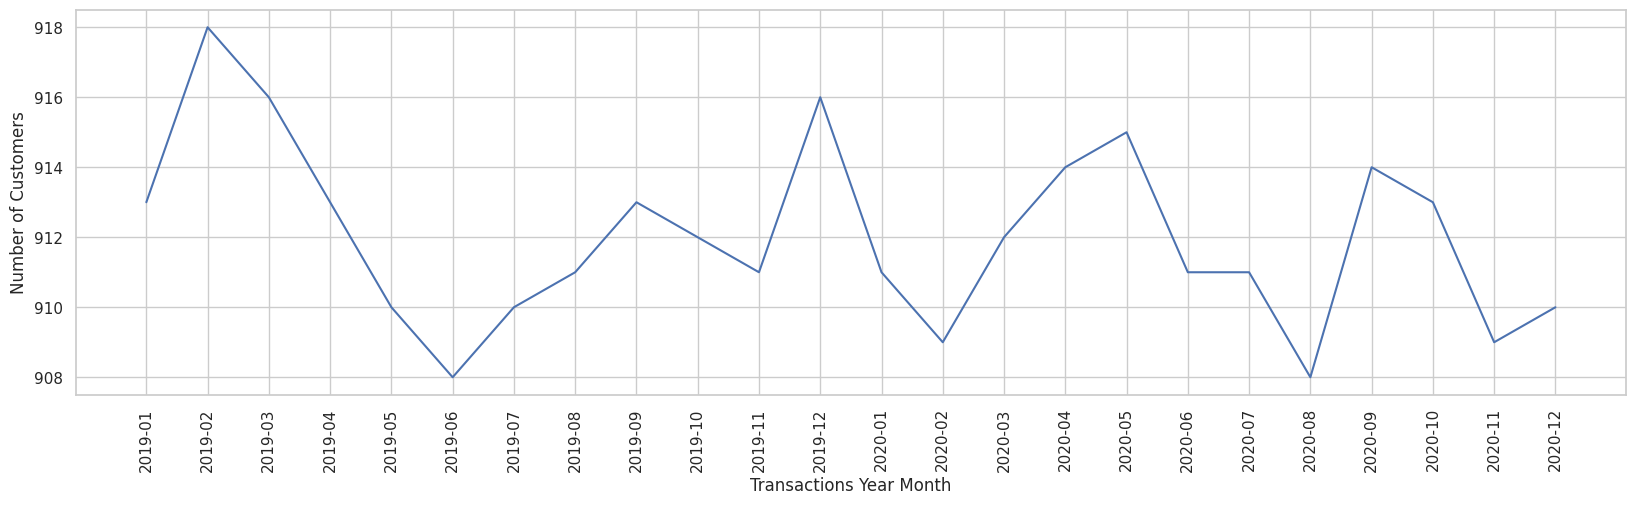

In [208]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['trans_year_month'], rotation = 90)

ax.set_xlabel('Transactions Year Month')
ax.set_ylabel('Number of Customers')
plt.show()


The figure illustrates the number of customers who conducted transactions on a monthly basis. In February, there was a peak in the number of customers, followed by a decrease, and then an increase in August and December of 2019.

In 2020, May and September witnessed a higher number of customers who engaged in non-fraudulent transactions.

### Fraud Transactions

In [209]:
df_fraud_transactions = fraud_data[fraud_data['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

### num_of_fraud_transactions

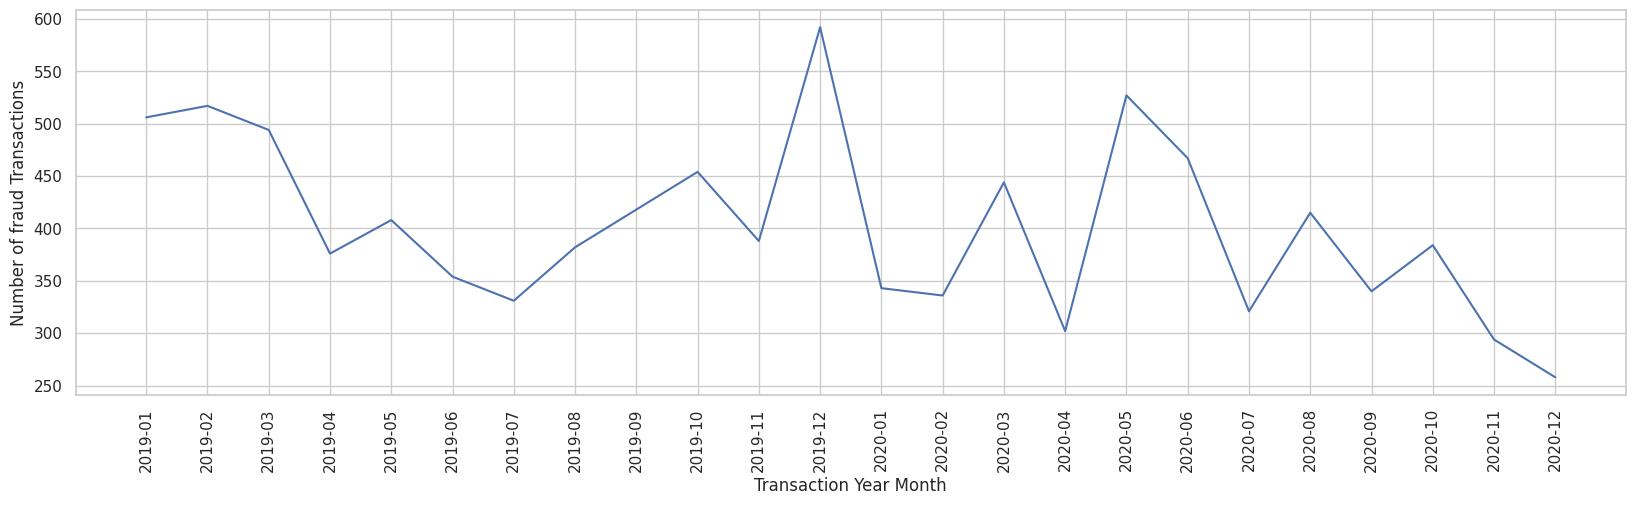

In [210]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

The figure depicts the number of fraud transactions conducted on a monthly basis. There was an increase in fraud transactions in January-February and November-December of 2019, while the remaining months showed normal transaction patterns.

In 2020, March, May, August, and October experienced peaks in fraud transactions, as indicated in the figure.

### fraud_customers based on Transaction on month wise

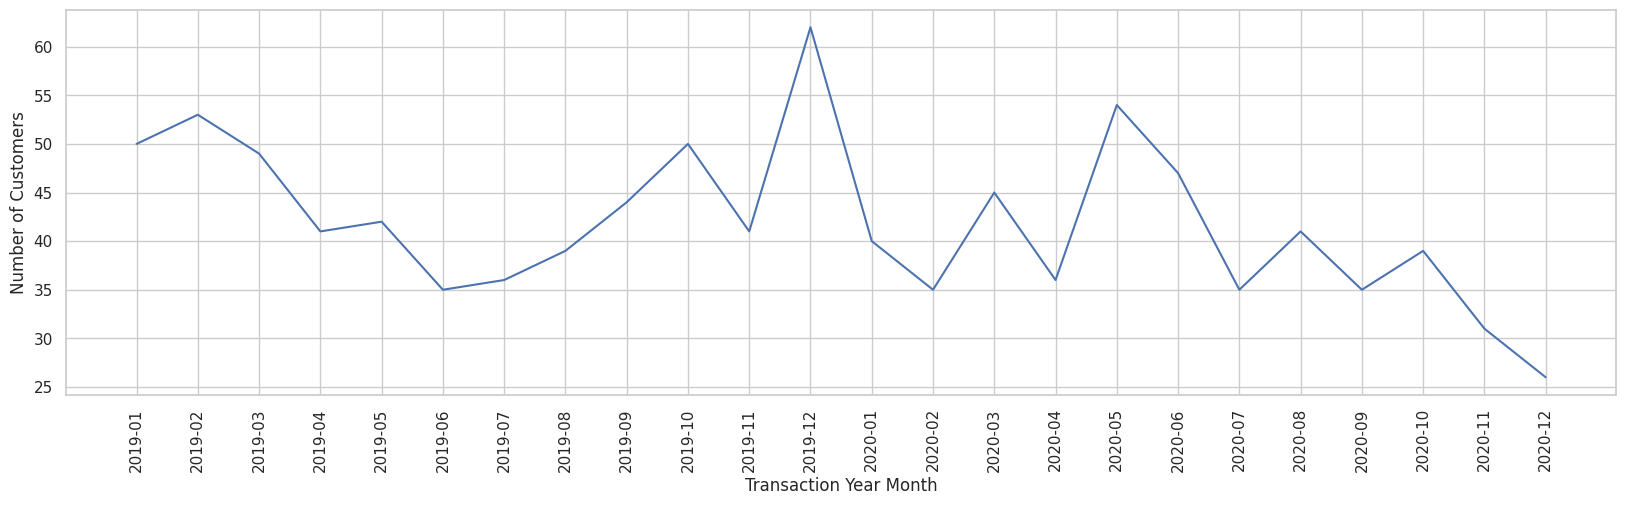

In [211]:
x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of Customers')
plt.show()

The figure illustrates the number of customers who engaged in fraudulent transactions on a monthly basis. In February, there was a peak in the number of fraud customers, followed by a decrease, and then an increase in October and December of 2019.

In 2020, March, May, August, and October witnessed a higher number of fraud customers engaging in fraudulent transactions, as shown in the figure.

### Fraudulent transactions on amount

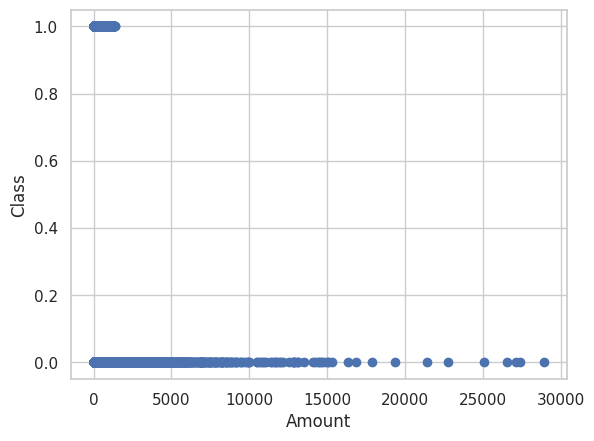

In [212]:
plt.scatter(fraud_data['amt'], fraud_data['is_fraud'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

The graph above indicates that fraudulent transactions are predominantly concentrated at lower values compared to non-fraudulent transactions.

The graph above demonstrates that the majority of fraudulent transactions involve very low amounts.

### KDE plot to visualize the distribution of Amount for both the classes

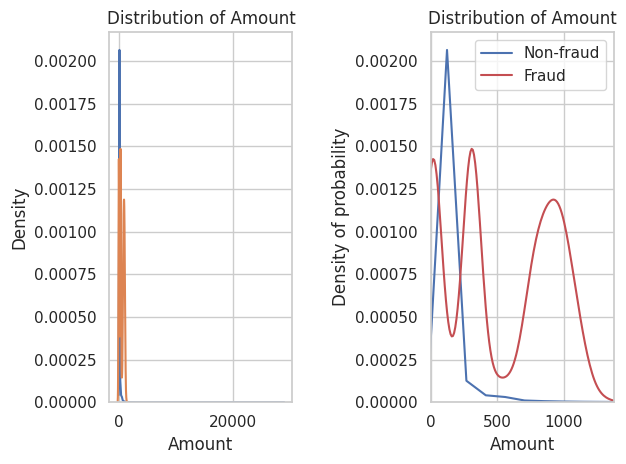

In [213]:
plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = [10,6]
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt'], label = 'Non Fraud')
sns.kdeplot(fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt'], label = 'Fraud')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')

plt.subplot(1,2,2)
target_0 = fraud_data.loc[fraud_data['is_fraud'] == 0]
target_1 = fraud_data.loc[fraud_data['is_fraud'] == 1]
ax1=sns.distplot(target_0[['amt']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['amt']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
ax2.set_xlim(0, max(fraud_data[fraud_data['is_fraud']==1]['amt']))
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Density of probability')
plt.title('Distribution of Amount')
plt.tight_layout()
plt.show()

The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.


### Time Distribution plot for transactions

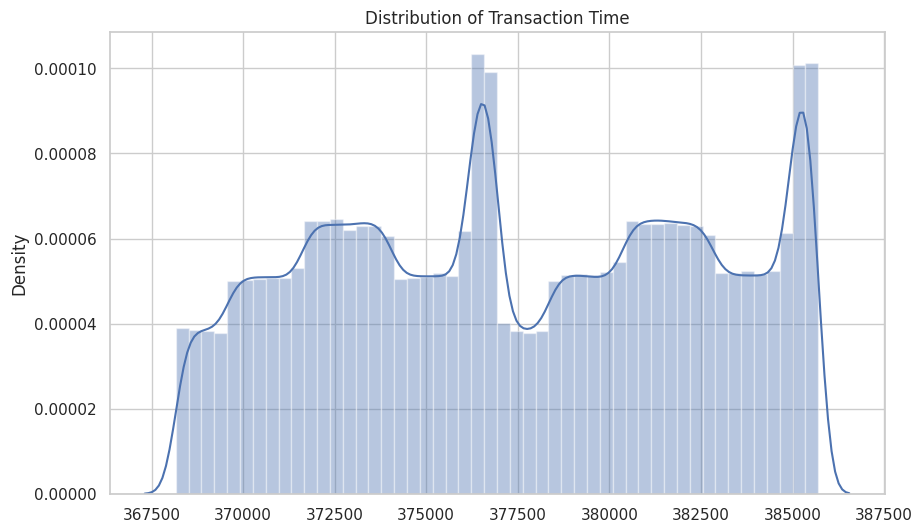

In [214]:
plt.title('Distribution of Transaction Time')
sns.distplot(fraud_data['unix_time'].values/(60*60))
plt.show()

The coverage of Distribution of unix Time in hours is shown using the plots


In [215]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

## 4.4 Cost benefit analysis

### 1. Average number of transactions per month

In [216]:
df.shape

(1852394, 4)

In [217]:
df.head()

job       category state            city
0          Psychologist, counselling       misc_net    NC  Moravian Falls
1  Special educational needs teacher    grocery_pos    WA          Orient
2        Nature conservation officer  entertainment    ID      Malad City
3                    Patent attorney  gas_transport    MT         Boulder
4     Dance movement psychotherapist       misc_pos    VA        Doe Hill

In [218]:
df= pd.pivot_table(data=fraud_data, values='trans_num', index=pd.Grouper(key='trans_date_trans_time',freq='1M'), columns='cc_num', aggfunc='count')
df.head()

cc_num                 60416207185          60422928733          \
trans_date_trans_time                                             
2019-01-31                            56.0                 49.0   
2019-02-28                            59.0                 60.0   
2019-03-31                            86.0                 90.0   
2019-04-30                           102.0                 96.0   
2019-05-31                            81.0                 91.0   

cc_num                 60423098130          60427851591          \
trans_date_trans_time                                             
2019-01-31                            28.0                 24.0   
2019-02-28                            21.0                 19.0   
2019-03-31                            30.0                 30.0   
2019-04-30                            21.0                 44.0   
2019-05-31                            32.0                 26.0   

cc_num                 60487002085          60490596305          \
trans_date_trans_time                                             
2019-01-31                            18.0                 39.0   
2019-02-28                            19.0                 40.0   
2019-03-31                            32.0                 59.0   
2019-04-30                            25.0                 54.0   
2019-05-31                            19.0                 57.0   

cc_num                 60495593109          501802953619         \
trans_date_trans_time                                             
2019-01-31                            18.0                 60.0   
2019-02-28                            18.0                 57.0   
2019-03-31                            26.0                 93.0   
2019-04-30                            23.0                 87.0   
2019-05-31                            29.0                 74.0   

cc_num                 501818133297         501828204849         ...  \
trans_date_trans_time                                            ...   
2019-01-31                             NaN                 20.0  ...   
2019-02-28                             NaN                 20.0  ...   
2019-03-31                             NaN                 33.0  ...   
2019-04-30                             NaN                 28.0  ...   
2019-05-31                             NaN                 28.0  ...   

cc_num                 4890424426862856940  4897067971111209737  \
trans_date_trans_time                                             
2019-01-31                            66.0                 48.0   
2019-02-28                            66.0                 36.0   
2019-03-31                            70.0                 52.0   
2019-04-30                            86.0                 55.0   
2019-05-31                            80.0                 56.0   

cc_num                 4906628655840914250  4911818930706644725  \
trans_date_trans_time                                             
2019-01-31                            95.0                  NaN   
2019-02-28                            86.0                  NaN   
2019-03-31                           142.0                  9.0   
2019-04-30                           132.0                  NaN   
2019-05-31                           138.0                  NaN   

cc_num                 4956828990005111019  4958589671582726883  \
trans_date_trans_time                                             
2019-01-31                           112.0                 56.0   
2019-02-28                            98.0                 57.0   
2019-03-31                           152.0                 88.0   
2019-04-30                           136.0                 81.0   
2019-05-31                           154.0                 92.0   

cc_num                 4973530368125489546  4980323467523543940  \
trans_date_trans_time                                             
2019-01-31                            54.0                 24.0   
2019

In [219]:
df.shape

(24, 999)

In [220]:
mean_per_month =df.sum(axis=1)
mean_per_month

trans_date_trans_time
2019-01-31     52525.0
2019-02-28     49866.0
2019-03-31     70939.0
2019-04-30     68078.0
2019-05-31     72532.0
2019-06-30     86064.0
2019-07-31     86596.0
2019-08-31     87359.0
2019-09-30     70652.0
2019-10-31     68758.0
2019-11-30     70421.0
2019-12-31    141060.0
2020-01-31     52202.0
2020-02-29     47791.0
2020-03-31     72850.0
2020-04-30     66892.0
2020-05-31     74343.0
2020-06-30     87805.0
2020-07-31     85848.0
2020-08-31     88759.0
2020-09-30     69533.0
2020-10-31     69348.0
2020-11-30     72635.0
2020-12-31    139538.0
Freq: M, dtype: float64

In [221]:
total=mean_per_month.sum(axis=0)
total

1852394.0

In [222]:
Average_number_of_transactions_per_month= total/24
Average_number_of_transactions_per_month

77183.08333333333

In [223]:
Average_number_of_transactions_per_month= fraud_data.shape[0]/24
Average_number_of_transactions_per_month

77183.08333333333

Average number of fraudulent transaction per month

In [224]:
fraudulent_transactions= fraud_data[fraud_data["is_fraud"]==1]

In [225]:
df1= pd.pivot_table(data=fraudulent_transactions, values='trans_num', index=pd.Grouper(key='trans_date_trans_time', freq='1M'), columns='cc_num', aggfunc='count')
df1.head()

cc_num                 60416207185          60422928733          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             9.0                  NaN   
2019-04-30                             NaN                 12.0   
2019-05-31                             NaN                  NaN   

cc_num                 60423098130          60427851591          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                            10.0                  NaN   
2019-04-30                             NaN                 14.0   
2019-05-31                             NaN                  NaN   

cc_num                 60487002085          60490596305          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 60495593109          501802953619         \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 501818133297         501828204849         ...  \
trans_date_trans_time                                            ...   
2019-01-31                             NaN                  NaN  ...   
2019-02-28                             NaN                  NaN  ...   
2019-03-31                             NaN                  NaN  ...   
2019-04-30                             NaN                  NaN  ...   
2019-05-31                             NaN                  NaN  ...   

cc_num                 4890424426862856940  4897067971111209737  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4906628655840914250  4911818930706644725  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  9.0   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4956828990005111019  4958589671582726883  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4973530368125489546  4980323467523543940  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019

In [226]:
df1.count(axis=1)

trans_date_trans_time
2019-01-31    50
2019-02-28    53
2019-03-31    49
2019-04-30    41
2019-05-31    42
2019-06-30    35
2019-07-31    36
2019-08-31    39
2019-09-30    44
2019-10-31    50
2019-11-30    41
2019-12-31    62
2020-01-31    40
2020-02-29    35
2020-03-31    45
2020-04-30    36
2020-05-31    54
2020-06-30    47
2020-07-31    35
2020-08-31    41
2020-09-30    35
2020-10-31    39
2020-11-30    31
2020-12-31    26
Freq: M, dtype: int64

In [227]:
mean_per_month =df1.sum(axis=1)
mean_per_month

trans_date_trans_time
2019-01-31    506.0
2019-02-28    517.0
2019-03-31    494.0
2019-04-30    376.0
2019-05-31    408.0
2019-06-30    354.0
2019-07-31    331.0
2019-08-31    382.0
2019-09-30    418.0
2019-10-31    454.0
2019-11-30    388.0
2019-12-31    592.0
2020-01-31    343.0
2020-02-29    336.0
2020-03-31    444.0
2020-04-30    302.0
2020-05-31    527.0
2020-06-30    467.0
2020-07-31    321.0
2020-08-31    415.0
2020-09-30    340.0
2020-10-31    384.0
2020-11-30    294.0
2020-12-31    258.0
Freq: M, dtype: float64

In [228]:
total=mean_per_month.sum(axis=0)
total

9651.0

In [229]:
Average_number_of_fraud_transactions_per_month= total/24
Average_number_of_fraud_transactions_per_month

402.125

In [230]:
Average_number_of_fraud_transactions_per_month= fraudulent_transactions.shape[0]/24
Average_number_of_fraud_transactions_per_month

402.125

### 3.  Average amount per fraud transaction

In [231]:
fraudulent_transactions.head(2)

trans_date_trans_time           cc_num                          merchant  \
2449   2019-01-02 01:06:37    4613314721966            fraud_Rutherford-Mertz   
2472   2019-01-02 01:47:29  340187018810220  fraud_Jenkins, Hauck and Friesen   

           category     amt gender                     street           city  \
2449    grocery_pos  281.06      M  542 Steve Curve Suite 011  Collettsville   
2472  gas_transport   11.52      F  27954 Hall Mill Suite 575    San Antonio   

     state    zip  ...  trans_weekday       dist  prev_merch_lat  \
2449    NC  28611  ...      Wednesday  68.953442       35.773439   
2472    TX  78208  ...      Wednesday  78.406096       29.819364   

     prev_merch_long time_since_prev_transaction distance_between_merchants  \
2449      -80.895816                       -11.0                  77.339565   
2472      -99.142791                         0.0                   0.000000   

      hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
2449             1.0             1.0               71.030000   
2472           113.0             4.0               63.897522   

      hist_trans_avg_amt_24h  
2449                 71.0300  
2472                101.4975  

[2 rows x 42 columns]

In [232]:
fraudulent_transactions.shape

(9651, 42)

In [233]:
df2= pd.pivot_table(data=fraudulent_transactions, values='amt', index=pd.Grouper(key='trans_date_trans_time', freq='1M'), columns='cc_num', aggfunc='sum')
df2.head()

cc_num                 60416207185          60422928733          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                         1899.73                  NaN   
2019-04-30                             NaN              7500.18   
2019-05-31                             NaN                  NaN   

cc_num                 60423098130          60427851591          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                         4598.08                  NaN   
2019-04-30                             NaN              9645.79   
2019-05-31                             NaN                  NaN   

cc_num                 60487002085          60490596305          \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 60495593109          501802953619         \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 501818133297         501828204849         ...  \
trans_date_trans_time                                            ...   
2019-01-31                             NaN                  NaN  ...   
2019-02-28                             NaN                  NaN  ...   
2019-03-31                             NaN                  NaN  ...   
2019-04-30                             NaN                  NaN  ...   
2019-05-31                             NaN                  NaN  ...   

cc_num                 4890424426862856940  4897067971111209737  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4906628655840914250  4911818930706644725  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN              4817.48   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4956828990005111019  4958589671582726883  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019-02-28                             NaN                  NaN   
2019-03-31                             NaN                  NaN   
2019-04-30                             NaN                  NaN   
2019-05-31                             NaN                  NaN   

cc_num                 4973530368125489546  4980323467523543940  \
trans_date_trans_time                                             
2019-01-31                             NaN                  NaN   
2019

In [234]:
sum_per_month =df2.sum(axis=1)
sum_per_month

trans_date_trans_time
2019-01-31    261780.38
2019-02-28    274051.08
2019-03-31    237637.59
2019-04-30    202067.29
2019-05-31    210549.11
2019-06-30    178204.60
2019-07-31    188701.59
2019-08-31    203951.13
2019-09-30    217675.37
2019-10-31    257739.72
2019-11-30    200307.47
2019-12-31    335157.54
2020-01-31    182595.36
2020-02-29    183950.11
2020-03-31    234090.10
2020-04-30    152173.98
2020-05-31    287226.38
2020-06-30    253504.74
2020-07-31    158669.49
2020-08-31    208785.43
2020-09-30    202700.99
2020-10-31    195572.97
2020-11-30    153182.19
2020-12-31    141138.68
Freq: M, dtype: float64

In [235]:
total=sum_per_month.sum(axis=0)
total

5121413.289999999

In [236]:
Average_amount_per_fraud_transaction= total/9651

In [237]:
Average_amount_per_fraud_transaction

530.6614122888819

In [238]:
amount_total=fraudulent_transactions['amt'].sum()
amount_total

5121413.290000001

In [239]:
Average_amount_per_fraud_transaction= amount_total/fraudulent_transactions.shape[0]
Average_amount_per_fraud_transaction

530.661412288882

In [240]:
fraudulent_transactions.pivot_table(index='trans_year_month',values='amt',aggfunc='mean').describe()

amt
count   24.000000
mean   530.415010
std     26.948415
min    481.047753
25%    514.364957
50%    528.654707
75%    545.528482
max    596.179382

###                           Cost Benefit Analysis(Part 1)
          Questions                                           Answer
    1. Average number of transactions per month            77183.0833333333
    2. Average number of fraudulent transaction per month  402.125
    3. Average amount per fraud transaction                530.6614122888819

In [241]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'state_bin', 'category_encoded', 'gender_encoded',
       'state_bin_encoded', 'job_encoded', 'age', 'age_bin', 'trans_Year',
       'trans_year_month', 'trans_Month', 'trans_Hour', 'trans_Day',
       'trans_weekday', 'dist', 'prev_merch_lat', 'prev_merch_long',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [242]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

In [243]:
fraud_data

trans_date_trans_time            cc_num  \
0         2019-01-01 00:00:18  2703186189652095   
1         2019-01-01 00:00:44      630423337322   
2         2019-01-01 00:00:51    38859492057661   
3         2019-01-01 00:01:16  3534093764340240   
4         2019-01-01 00:03:06   375534208663984   
...                       ...               ...   
1852389   2020-12-31 23:59:07    30560609640617   
1852390   2020-12-31 23:59:09  3556613125071656   
1852391   2020-12-31 23:59:15  6011724471098086   
1852392   2020-12-31 23:59:24     4079773899158   
1852393   2020-12-31 23:59:34  4170689372027579   

                                   merchant        category     amt gender  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                      fraud_Lind-Buckridge   entertainment  220.11      M   
3        fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                       fraud_Keeling-Crist        misc_pos   41.96      M   
...                                     ...             ...     ...    ...   
1852389               fraud_Reilly and Sons  health_fitness   43.77      M   
1852390                fraud_Hoppe-Parisian       kids_pets  111.84      M   
1852391                     fraud_Rau-Robel       kids_pets   86.88      F   
1852392               fraud_Breitenberg LLC          travel    7.99      M   
1852393                   fraud_Dare-Marvin   entertainment   38.13      M   

                               street            city state    zip  ...  \
0                      561 Perry Cove  Moravian Falls    NC  28654  ...   
1        43039 Riley Greens Suite 393          Orient    WA  99160  ...   
2            594 White Dale Suite 530      Malad City    ID  83252  ...   
3         9443 Cynthia Court Apt. 038         Boulder    MT  59632  ...   
4                    408 Bradley Rest        Doe Hill    VA  24433  ...   
...                               ...             ...   ...    ...  ...   
1852389           558 Michael Estates           Luray    MO  63453  ...   
1852390           572 Davis Mountains    Lake Jackson    TX  77566  ...   
1852391    144 Evans Islands Apt. 683         Burbank    WA  99323  ...   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  83643  ...   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  73034  ...   

         trans_weekday        dist  prev_merch_lat prev_merch_long  \
0              Tuesday   78.597568       36.011293      -82.048315   
1              Tuesday   30.212176       49.159047     -118.186462   
2              Tuesday  108.206083       43.150704     -112.154481   
3              Tuesday   95.673231       47.034331     -112.561071   
4              Tuesday   77.556744       38.674999      -78.632459   
...                ...         ...             ...             ...   
1852389       Thursday   77.026148       40.395006      -91.537312   
1852390       Thursday  100.074420       28.599619      -95.170763   
1852391       Thursday   80.759302       45.716706     -119.886246   
1852392       Thursday   52.933240       45.152800     -116.250539   
1852393       Thursday   72.438289       35.358399      -96.720178   

        time_since_prev_transaction distance_between_merchants  \
0                               0.0                   0.000000   
1                               0.0                   0.000000   
2                               0.0                   0.000000   
3                               0.0                   0.000000   
4                               0.0                   0.000000   
...                             ...                        ...   
1852389                         4.0                  52.761902   
1852390                         2.0                 153.836231   
1852391                         0.0                 105.530919   
1852392                         3.0                 100.

### Step 5: Preparing the data for modelling

In [244]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'state_bin', 'category_encoded', 'gender_encoded',
       'state_bin_encoded', 'job_encoded', 'age', 'age_bin', 'trans_Year',
       'trans_year_month', 'trans_Month', 'trans_Hour', 'trans_Day',
       'trans_weekday', 'dist', 'prev_merch_lat', 'prev_merch_long',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [245]:
fraud_data.shape

(1852394, 42)

### check correlations

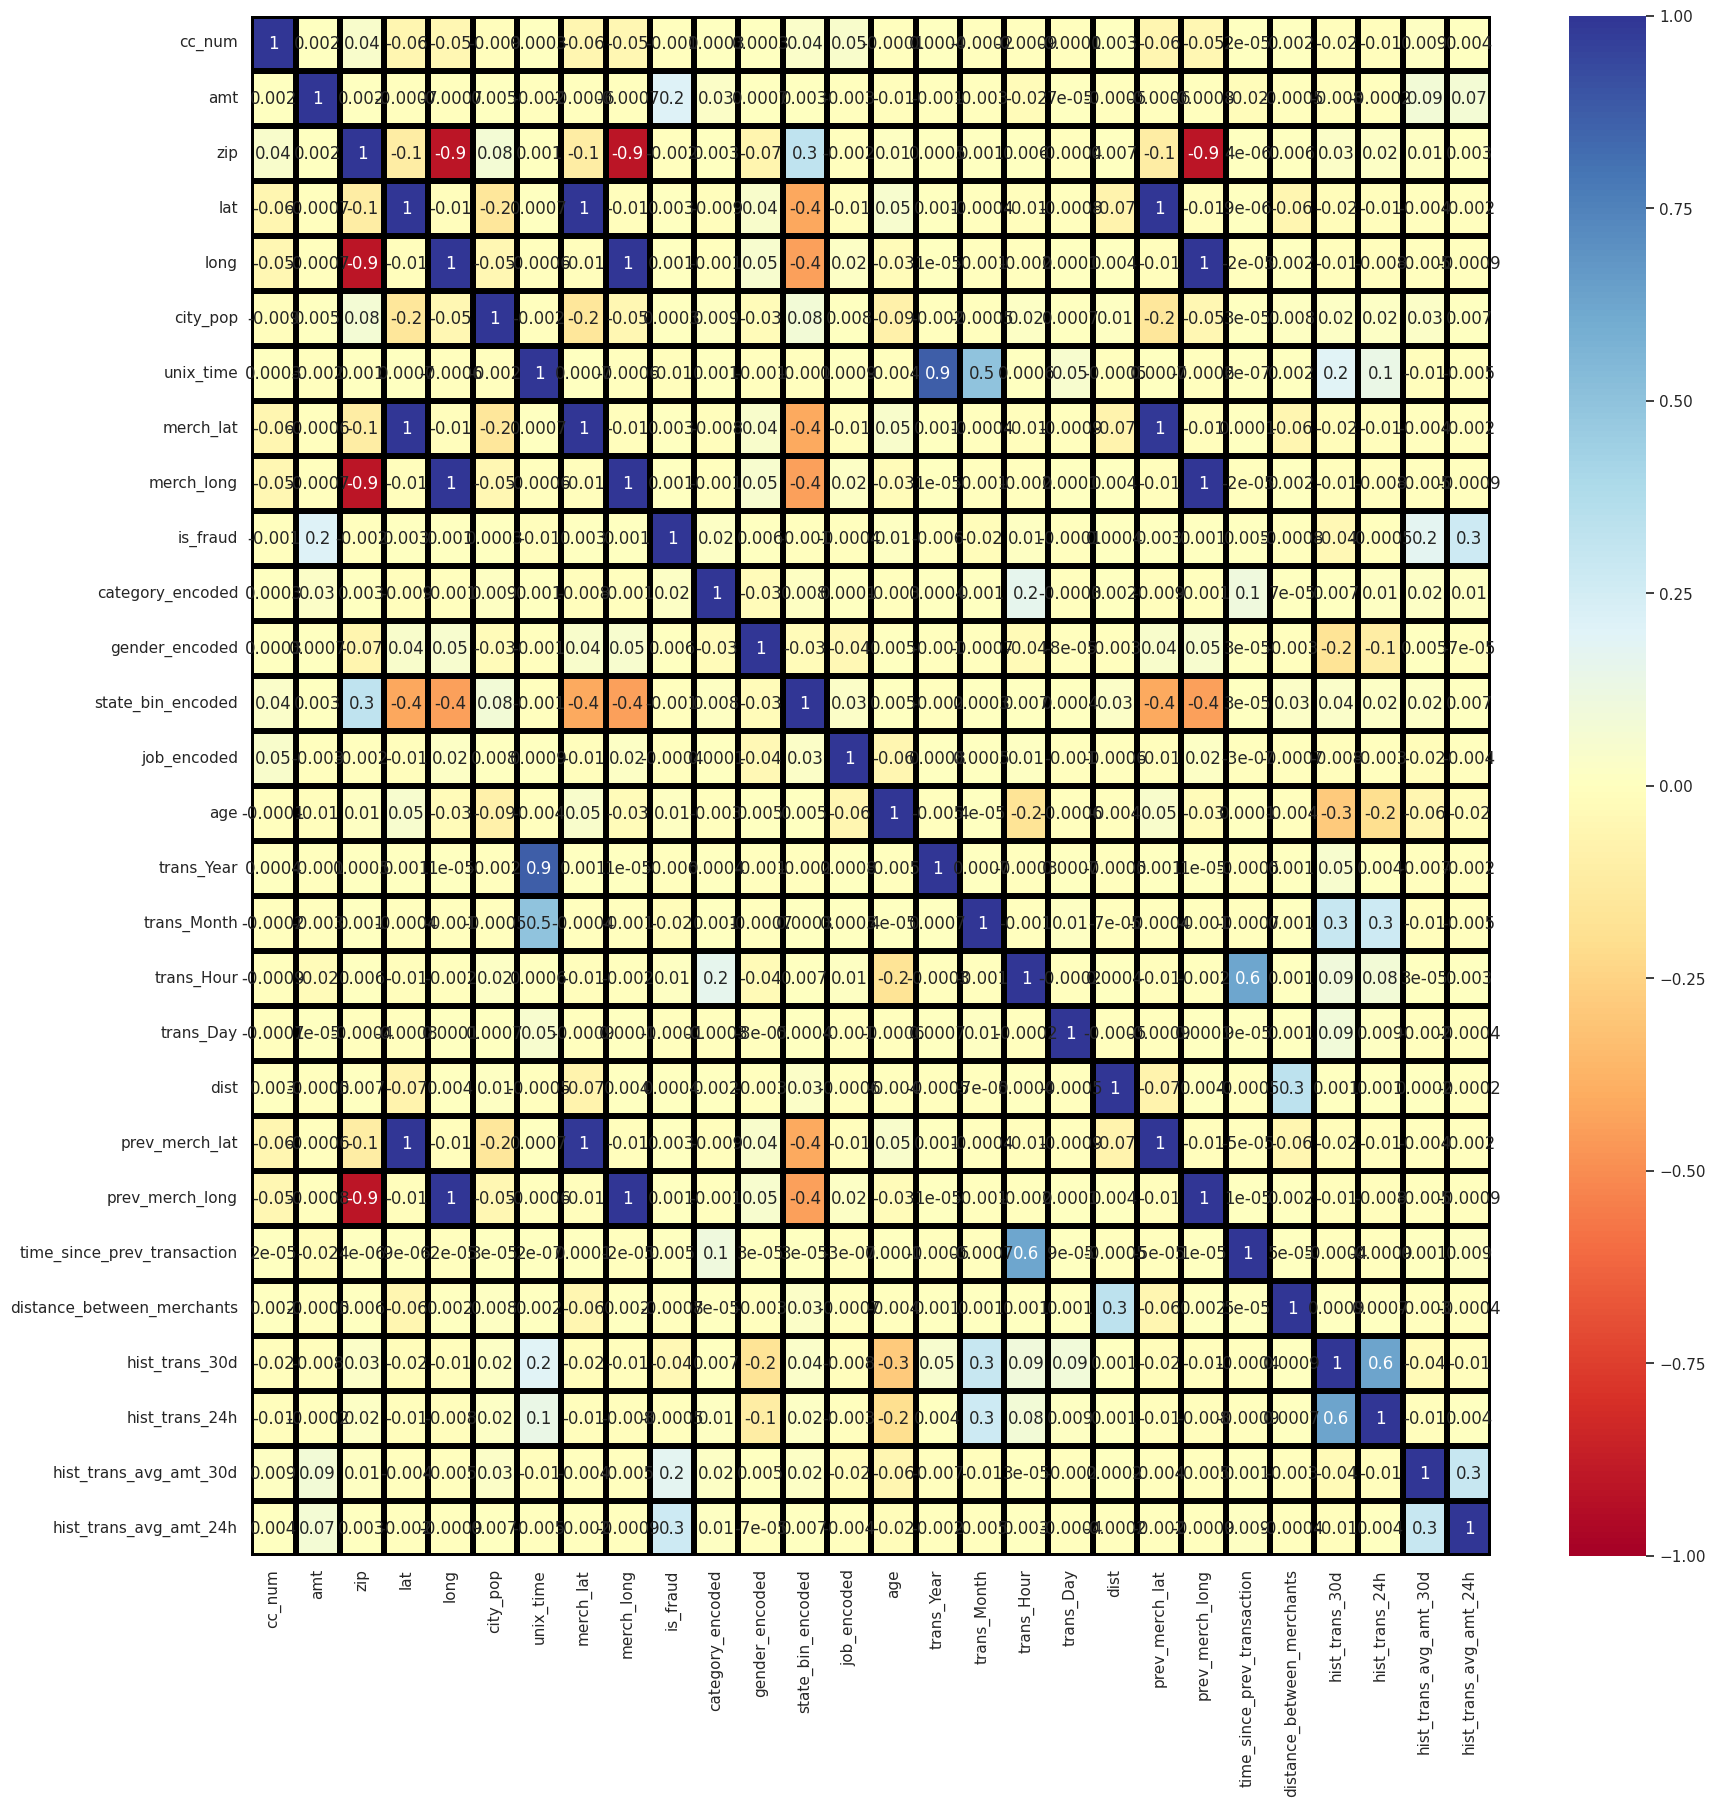

In [246]:
# Drop non-numeric columns
numeric_data = fraud_data.select_dtypes(include=['number'])

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='RdYlBu')
plt.show()

- the variables whose correlation more than 0.7 is taken as high correlated value and will drop them

### Drop columns which has high correlation values

In [247]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 42 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trans_date_trans_time        datetime64[ns]
 1   cc_num                       int64         
 2   merchant                     object        
 3   category                     object        
 4   amt                          float64       
 5   gender                       object        
 6   street                       object        
 7   city                         object        
 8   state                        object        
 9   zip                          int64         
 10  lat                          float64       
 11  long                         float64       
 12  city_pop                     int64         
 13  job                          object        
 14  dob                          datetime64[ns]
 15  trans_num                    object        
 16  

In [248]:
fraud_data= fraud_data.drop(['dob', 'state_bin'],axis=1)

In [249]:
fraud_data= fraud_data.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
fraud_data= fraud_data.drop(['age_bin','trans_date_trans_time','unix_time', 'trans_Day','trans_year_month'],axis=1)

In [250]:
fraud_data.shape

(1852394, 30)

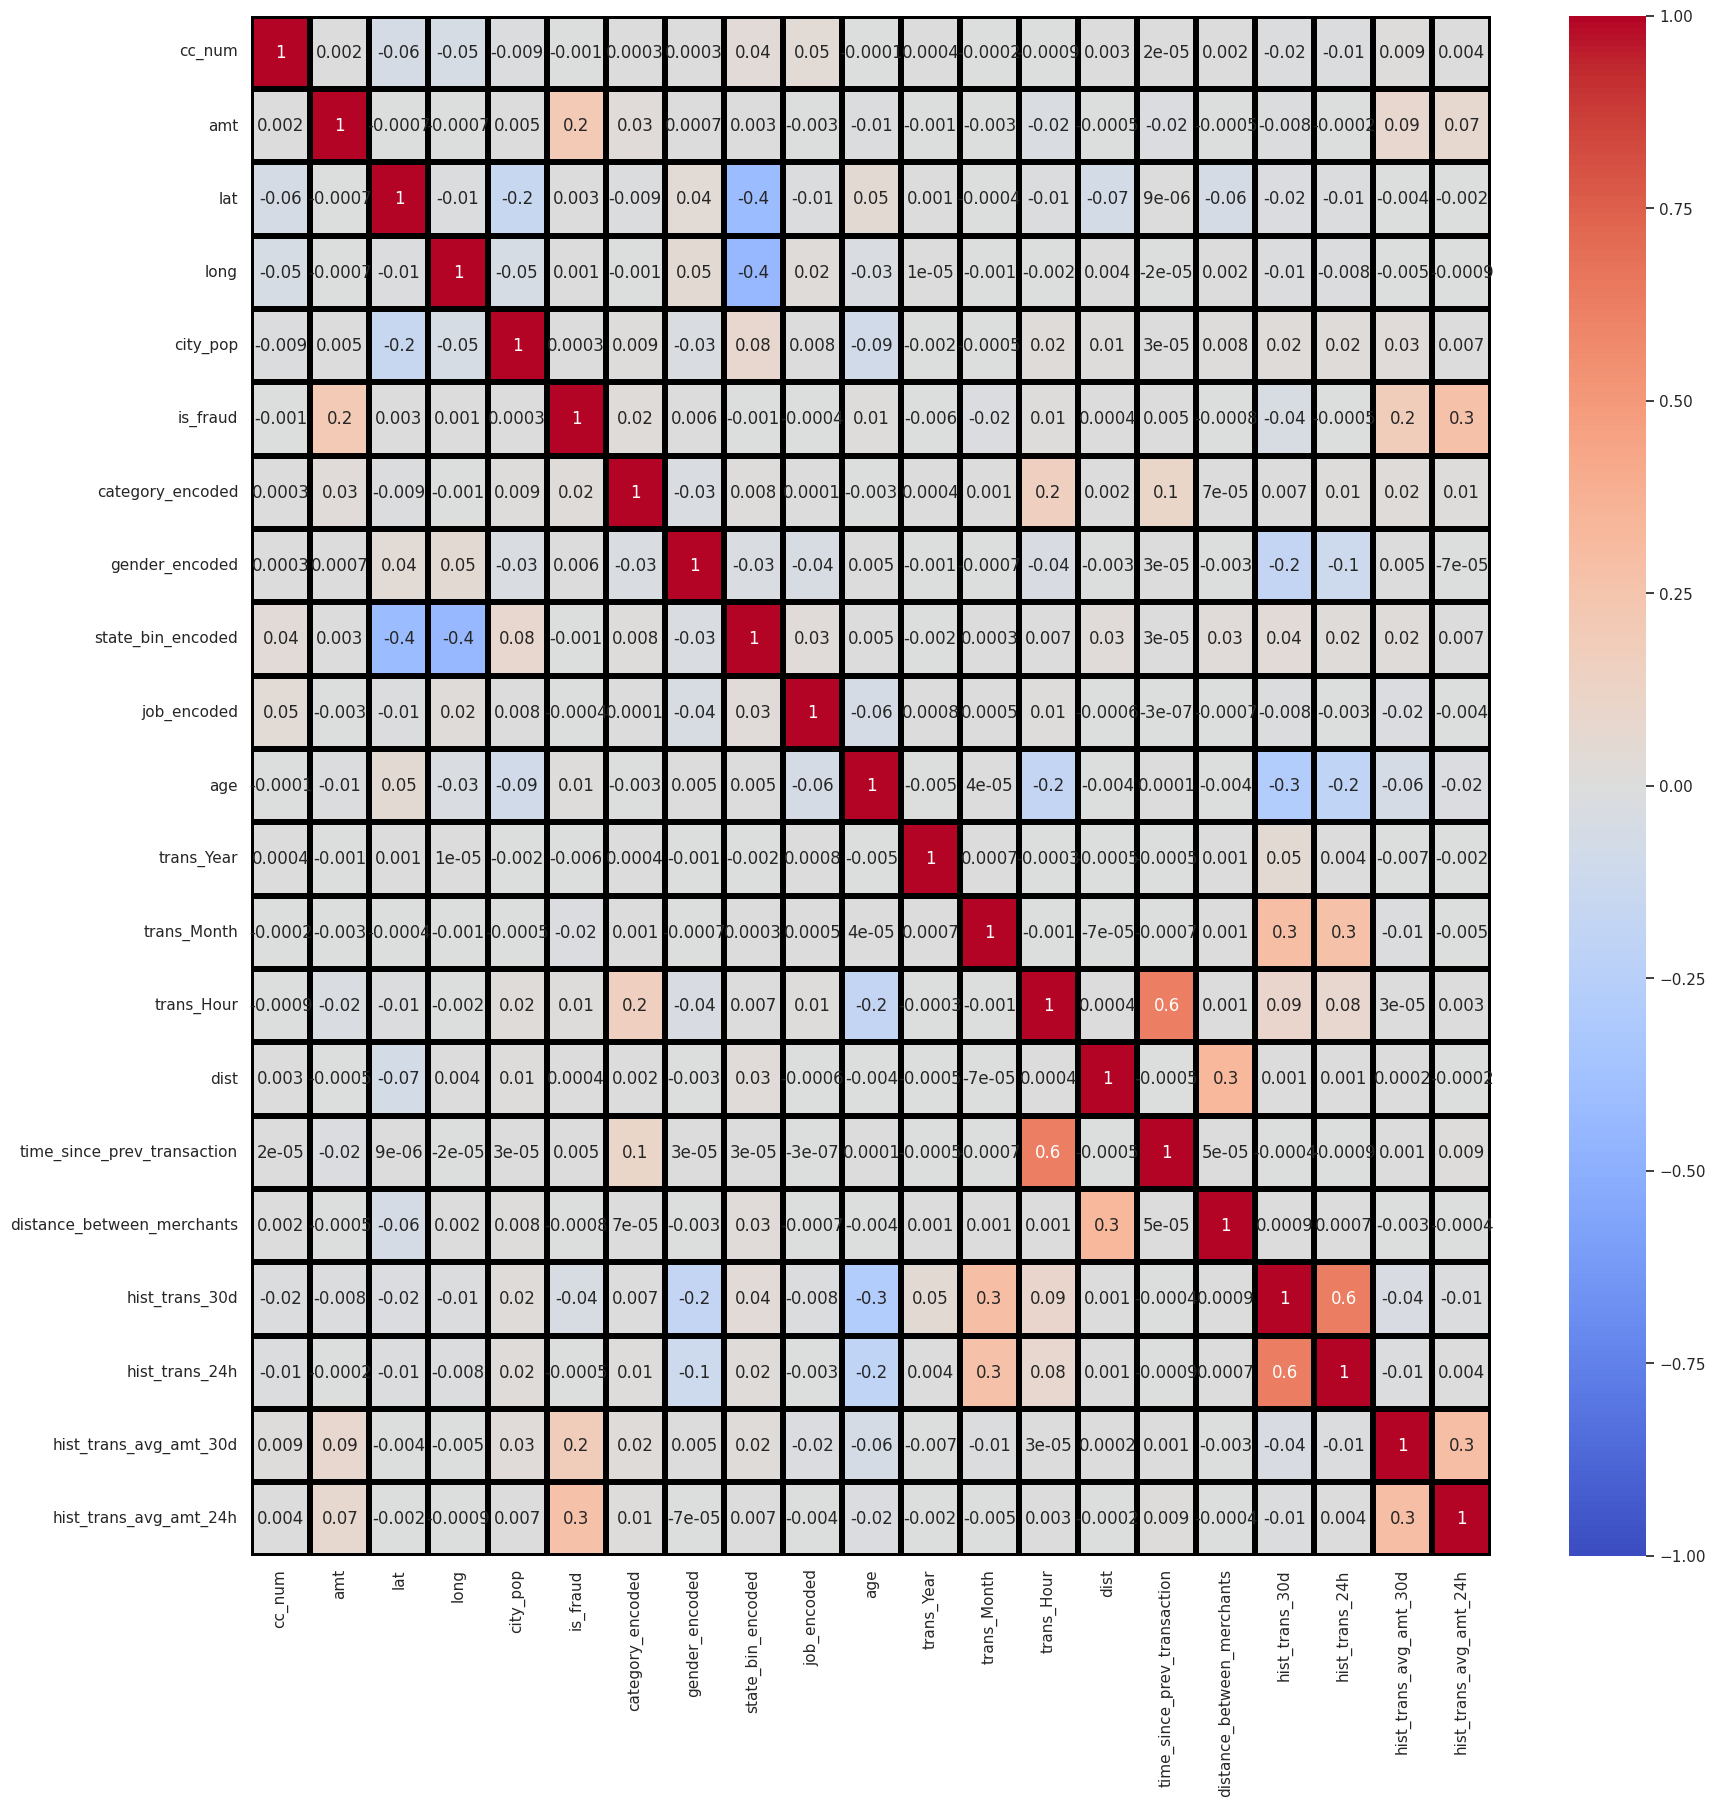

In [251]:
# Select only numeric columns
numeric_data = fraud_data.select_dtypes(include='number')

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='coolwarm')
plt.show()

In [252]:
fraud_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud',
       'category_encoded', 'gender_encoded', 'state_bin_encoded',
       'job_encoded', 'age', 'trans_Year', 'trans_Month', 'trans_Hour',
       'trans_weekday', 'dist', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [253]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 30 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   street                       object 
 6   city                         object 
 7   state                        object 
 8   lat                          float64
 9   long                         float64
 10  city_pop                     int64  
 11  job                          object 
 12  trans_num                    object 
 13  is_fraud                     int64  
 14  category_encoded             int64  
 15  gender_encoded               int64  
 16  state_bin_encoded            int64  
 17  job_encoded                  int64  
 18  age                          int64  
 19  

### Dummy creation

In [254]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(fraud_data['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(fraud_data['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(fraud_data['trans_weekday'], drop_first=True, prefix='weekday')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(fraud_data['trans_Month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(fraud_data['trans_Year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
fraud_data = pd.concat([fraud_data, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
fraud_data= fraud_data.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
fraud_data.shape

(1852394, 57)

In [255]:
fraud_data

cc_num                            merchant     amt  \
0        2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1            630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2          38859492057661                fraud_Lind-Buckridge  220.11   
3        3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4         375534208663984                 fraud_Keeling-Crist   41.96   
...                   ...                                 ...     ...   
1852389    30560609640617               fraud_Reilly and Sons   43.77   
1852390  3556613125071656                fraud_Hoppe-Parisian  111.84   
1852391  6011724471098086                     fraud_Rau-Robel   86.88   
1852392     4079773899158               fraud_Breitenberg LLC    7.99   
1852393  4170689372027579                   fraud_Dare-Marvin   38.13   

                               street            city state      lat  \
0                      561 Perry Cove  Moravian Falls    NC  36.0788   
1        43039 Riley Greens Suite 393          Orient    WA  48.8878   
2            594 White Dale Suite 530      Malad City    ID  42.1808   
3         9443 Cynthia Court Apt. 038         Boulder    MT  46.2306   
4                    408 Bradley Rest        Doe Hill    VA  38.4207   
...                               ...             ...   ...      ...   
1852389           558 Michael Estates           Luray    MO  40.4931   
1852390           572 Davis Mountains    Lake Jackson    TX  29.0393   
1852391    144 Evans Islands Apt. 683         Burbank    WA  46.1966   
1852392    7020 Doyle Stream Apt. 951            Mesa    ID  44.6255   
1852393      830 Myers Plaza Apt. 384          Edmond    OK  35.6665   

             long  city_pop             job  ... month_4  month_5  month_6  \
0        -81.1781      3495    Psychologist  ...   False    False    False   
1       -118.2105       149         Teacher  ...   False    False    False   
2       -112.2620      4154         Officer  ...   False    False    False   
3       -112.1138      1939          OTHERS  ...   False    False    False   
4        -79.4629        99       Therapist  ...   False    False    False   
...           ...       ...             ...  ...     ...      ...      ...   
1852389  -91.8912       519    Town planner  ...   False    False    False   
1852390  -95.4401     28739  Futures trader  ...   False    False    False   
1852391 -118.9017      3684        Musician  ...   False    False    False   
1852392 -116.4493       129          OTHERS  ...   False    False    False   
1852393  -97.4798    116001           Buyer  ...   False    False    False   

         month_7  month_8  month_9  month_10  month_11  month_12  year_2020  
0          False    False    False     False     False     False      False  
1          False    False    False     False     False     False      False  
2          False    False    False     False     False     False      False  
3          False    False    False     False     False     False      False  
4          False    False    False     False     False     False      False  
...          ...      ...      ...       ...       ...       ...        ...  
1852389    False    False    False     False     False      True       True  
1852390    False    False    False     False     False      True       True  
1852391    False    False    False     False     False      True       True  
1852392    False    False    False     False     False      True       True  
1852393    False    False    False     False     False      True       True  

[1852394 rows x 57 columns]

The issue of dimensionality arises when we have numerous variables with a high number of unique values. For instance, the "city" feature consists of 906 distinct values, which significantly increases the number of features. While having a feature with 3 levels might be manageable, introducing a feature like "city" adds over 900 columns to the original dataset. This expansion triples the dataset's size, leading to challenges in machine learning due to what is known as "the curse of dimensionality."

Label encoding involves converting each value in a column to a numerical representation. It appears that categorical variables in our dataset are already represented by numbers, indicating that they may have been encoded using label encoding.

For example, we have '0', '1', '2' representing different classes of car-related concepts such as 'FWD', 'RWD', '4WD' for drive types. This approach provides a convenient means of representing non-numeric information in a numerical format, which is preferable for most machine learning algorithms.

#### Label Enconding

In [256]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encoding labels of following columns.
fraud_data['state']= label_encoder.fit_transform(fraud_data['state'])
fraud_data['job']= label_encoder.fit_transform(fraud_data['job'])
fraud_data['merchant']= label_encoder.fit_transform(fraud_data['merchant'])
fraud_data['city']= label_encoder.fit_transform(fraud_data['city'])
fraud_data['street']= label_encoder.fit_transform(fraud_data['street'])

In [257]:
fraud_data

cc_num  merchant     amt  street  city  state      lat  \
0        2703186189652095       514    4.97     576   532     27  36.0788   
1            630423337322       241  107.23     439   619     47  48.8878   
2          38859492057661       390  220.11     610   474     13  42.1808   
3        3534093764340240       360   45.00     945    84     26  46.2306   
4         375534208663984       297   41.96     422   217     45  38.4207   
...                   ...       ...     ...     ...   ...    ...      ...   
1852389    30560609640617       507   43.77     573   471     24  40.4931   
1852390  3556613125071656       264  111.84     583   427     43  29.0393   
1852391  6011724471098086       496   86.88     138   110     47  46.1966   
1852392     4079773899158        75    7.99     711   508     13  44.6255   
1852393  4170689372027579       125   38.13     838   239     36  35.6665   

             long  city_pop  job  ... month_4  month_5  month_6  month_7  \
0        -81.1781      3495   70  ...   False    False    False    False   
1       -118.2105       149   82  ...   False    False    False    False   
2       -112.2620      4154   61  ...   False    False    False    False   
3       -112.1138      1939   59  ...   False    False    False    False   
4        -79.4629        99   86  ...   False    False    False    False   
...           ...       ...  ...  ...     ...      ...      ...      ...   
1852389  -91.8912       519   87  ...   False    False    False    False   
1852390  -95.4401     28739   37  ...   False    False    False    False   
1852391 -118.9017      3684   56  ...   False    False    False    False   
1852392 -116.4493       129   59  ...   False    False    False    False   
1852393  -97.4798    116001   11  ...   False    False    False    False   

         month_8  month_9  month_10  month_11  month_12  year_2020  
0          False    False     False     False     False      False  
1          False    False     False     False     False      False  
2          False    False     False     False     False      False  
3          False    False     False     False     False      False  
4          False    False     False     False     False      False  
...          ...      ...       ...       ...       ...        ...  
1852389    False    False     False     False      True       True  
1852390    False    False     False     False      True       True  
1852391    False    False     False     False      True       True  
1852392    False    False     False     False      True       True  
1852393    False    False     False     False      True       True  

[1852394 rows x 57 columns]

In [258]:
fraud_data.columns

Index(['cc_num', 'merchant', 'amt', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'is_fraud', 'category_encoded',
       'gender_encoded', 'state_bin_encoded', 'job_encoded', 'age',
       'trans_Hour', 'dist', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24h',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h', 'catg_food_dining',
       'catg_gas_transport', 'catg_grocery_net', 'catg_grocery_pos',
       'catg_health_fitness', 'catg_home', 'catg_kids_pets', 'catg_misc_net',
       'catg_misc_pos', 'catg_personal_care', 'catg_shopping_net',
       'catg_shopping_pos', 'catg_travel', 'gender_M', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'year_2020'],
      dtype='object'

In [259]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 57 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   amt                          float64
 3   street                       int64  
 4   city                         int64  
 5   state                        int64  
 6   lat                          float64
 7   long                         float64
 8   city_pop                     int64  
 9   job                          int64  
 10  trans_num                    object 
 11  is_fraud                     int64  
 12  category_encoded             int64  
 13  gender_encoded               int64  
 14  state_bin_encoded            int64  
 15  job_encoded                  int64  
 16  age                          int64  
 17  trans_Hour                   int32  
 18  dist                         float64
 19  

### 5.1) Splitting the Data  into X & y

In [260]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = fraud_data.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = fraud_data['is_fraud']

In [261]:
X

merchant     amt  street  city  state      lat      long  city_pop  \
0             514    4.97     576   532     27  36.0788  -81.1781      3495   
1             241  107.23     439   619     47  48.8878 -118.2105       149   
2             390  220.11     610   474     13  42.1808 -112.2620      4154   
3             360   45.00     945    84     26  46.2306 -112.1138      1939   
4             297   41.96     422   217     45  38.4207  -79.4629        99   
...           ...     ...     ...   ...    ...      ...       ...       ...   
1852389       507   43.77     573   471     24  40.4931  -91.8912       519   
1852390       264  111.84     583   427     43  29.0393  -95.4401     28739   
1852391       496   86.88     138   110     47  46.1966 -118.9017      3684   
1852392        75    7.99     711   508     13  44.6255 -116.4493       129   
1852393       125   38.13     838   239     36  35.6665  -97.4798    116001   

         job  category_encoded  ...  month_4  month_5  month_6  month_7  \
0         70                 8  ...    False    False    False    False   
1         82                 4  ...    False    False    False    False   
2         61                 0  ...    False    False    False    False   
3         59                 2  ...    False    False    False    False   
4         86                 9  ...    False    False    False    False   
...      ...               ...  ...      ...      ...      ...      ...   
1852389   87                 5  ...    False    False    False    False   
1852390   37                 7  ...    False    False    False    False   
1852391   56                 7  ...    False    False    False    False   
1852392   59                13  ...    False    False    False    False   
1852393   11                 0  ...    False    False    False    False   

         month_8  month_9  month_10  month_11  month_12  year_2020  
0          False    False     False     False     False      False  
1          False    False     False     False     False      False  
2          False    False     False     False     False      False  
3          False    False     False     False     False      False  
4          False    False     False     False     False      False  
...          ...      ...       ...       ...       ...        ...  
1852389    False    False     False     False      True       True  
1852390    False    False     False     False      True       True  
1852391    False    False     False     False      True       True  
1852392    False    False     False     False      True       True  
1852393    False    False     False     False      True       True  

[1852394 rows x 54 columns]

In [262]:
X.shape, y.shape

((1852394, 54), (1852394,))

### 5.2) Test-Train Split

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (1296675, 54)
y_train:  (1296675,)
X_test:  (555719, 54)
y_test:  (555719,)


In [264]:
X_train

merchant     amt  street  city  state      lat     long  city_pop  \
1489446       415  108.23     952   811     18  30.5668 -90.4820      8512   
887864        155   60.29     782   580     14  39.3036 -89.2853      3458   
115189        384    9.81     866   421     34  43.2363 -78.3138       275   
108605         30   27.15     613   730     23  44.9913 -92.9487    753116   
67953         222  234.47     164   352     35  41.2419 -81.7453      7646   
...           ...     ...     ...   ...    ...      ...      ...       ...   
1003268       235  434.59     675   371      1  34.7789 -86.5438    190178   
1088777       381   96.75     608   733     43  29.3641 -98.4924   1595797   
1529779        28   18.68     181   815     48  45.4963 -89.7273      9594   
1217915       546   11.44      35   542     24  40.1362 -95.2138      1631   
1433227       229   69.01     307   353     46  44.3346 -73.0980      4542   

         job  category_encoded  ...  month_4  month_5  month_6  month_7  \
1489446   12                 4  ...    False    False    False    False   
887864    79                 6  ...    False    False    False    False   
115189    82                 9  ...    False    False    False    False   
108605    61                10  ...    False    False    False    False   
67953     51                 9  ...    False    False    False    False   
...      ...               ...  ...      ...      ...      ...      ...   
1003268    6                 8  ...    False    False    False    False   
1088777   59                 2  ...    False    False    False    False   
1529779   59                 0  ...    False    False    False    False   
1217915   59                 7  ...    False     True    False    False   
1433227   16                 2  ...    False    False    False    False   

         month_8  month_9  month_10  month_11  month_12  year_2020  
1489446     True    False     False     False     False       True  
887864     False    False     False     False      True      False  
115189     False    False     False     False     False      False  
108605     False    False     False     False     False      False  
67953      False    False     False     False     False      False  
...          ...      ...       ...       ...       ...        ...  
1003268    False    False     False     False     False       True  
1088777    False    False     False     False     False       True  
1529779    False     True     False     False     False       True  
1217915    False    False     False     False     False       True  
1433227     True    False     False     False     False       True  

[1296675 rows x 54 columns]

In [265]:
X_test

merchant     amt  street  city  state      lat      long  city_pop  \
84212           8    6.19     432   120     35  40.8027  -81.3739    192805   
679039        571   72.98     517   328     43  30.2816  -99.2410      2395   
1552913       210  101.37     188   877     29  41.4193  -99.3844        73   
1146122       548   62.08     818    76      4  39.8127 -120.6405      1725   
1813821       408  116.45     959   649      1  34.3470  -87.7154      5778   
...           ...     ...     ...   ...    ...      ...       ...       ...   
177055        151    8.11      78   651      3  33.8155 -112.1202   1312922   
1122272       669    6.88     170   905     43  31.1569  -94.3871      2836   
1273837       316   68.89     504   123     15  38.9763  -87.3667      4081   
1034715       683    6.42     949   817     16  39.1329  -95.7023    163415   
1000922       198    6.37     342     3     22  45.3637  -84.4695       937   

         job  category_encoded  ...  month_4  month_5  month_6  month_7  \
84212     79                11  ...    False    False    False    False   
679039    64                 5  ...    False    False    False    False   
1552913   23                 0  ...    False    False    False    False   
1146122   30                 2  ...     True    False    False    False   
1813821   29                10  ...    False    False    False    False   
...      ...               ...  ...      ...      ...      ...      ...   
177055    70                 0  ...     True    False    False    False   
1122272   23                 9  ...     True    False    False    False   
1273837   29                 1  ...    False    False     True    False   
1034715   82                 7  ...    False    False    False    False   
1000922   83                11  ...    False    False    False    False   

         month_8  month_9  month_10  month_11  month_12  year_2020  
84212      False    False     False     False     False      False  
679039     False    False      True     False     False      False  
1552913    False     True     False     False     False       True  
1146122    False    False     False     False     False       True  
1813821    False    False     False     False      True       True  
...          ...      ...       ...       ...       ...        ...  
177055     False    False     False     False     False      False  
1122272    False    False     False     False     False       True  
1273837    False    False     False     False     False       True  
1034715    False    False     False     False     False       True  
1000922    False    False     False     False     False       True  

[555719 rows x 54 columns]

In [266]:
y_train

1489446    0
887864     0
115189     0
108605     0
67953      0
          ..
1003268    0
1088777    0
1529779    0
1217915    0
1433227    0
Name: is_fraud, Length: 1296675, dtype: int64

#### Checking for Class imbalance in Train & Test

In [267]:
y_train.value_counts(normalize=True)

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

In [268]:
y_test.value_counts(normalize=True)

is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64

### Checking for Class imbalance in Train & Test and treating it

**SMOTE - Synthetic Minority Oversampling Technique**
Creates new "Synthetic" observations

In [269]:
print(y_train)

1489446    0
887864     0
115189     0
108605     0
67953      0
          ..
1003268    0
1088777    0
1529779    0
1217915    0
1433227    0
Name: is_fraud, Length: 1296675, dtype: int64


In [270]:
import collections
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Before SMOTE, counts of label '0' & '1': {}\n".format(sorted(Counter(y_train).items())))

# Perform SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '0' & '1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0' & '1': [(0, 1289919), (1, 6756)]

After SMOTE, counts of label '0' & '1': [(0, 1289919), (1, 1289919)]
2579838


### ADASYN

## Step 6: Modeling

<div class="alert alert-block alert-info">   

#### Inference:-
    Here,instead of Accuracy we are very much interested in the recall score, because that is the metric that will help us try to capture the most fraudulent transactions. Increase of Recall comes at a price of Precision. In this case predicting a transaction fradulant which actually is not is not a big concern.
   ####  `Recall` actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).
    Recall shall be the model metric we use to select our best model `when there is a high cost associated with False Negative.`
    In fraud detection, if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be
    very bad for the bank.

In [277]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, plot_roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

In [276]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Model 1: Decision Tree

### Default Hyperparameters for SMOTE data

In [ ]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for SMOTE data
dt_smt_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [ ]:
# Lets fit the decision tree with default hyperparameters
dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)


In [ ]:
y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

         precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
   
weighted avg       1.00      1.00      1.00   2579838

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

<div class="alert alert-block alert-info">
    
As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:-
    Since we got a value of 0.91, our model seems to be doing execellent on the test dataset.

In [278]:
confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true positive
TP = confusion_dt_smt[1,1] # true negatives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%

Specificity:  99.6%

False postive rate: 0.4%

Positive predictive value: 54.8%

Negative predictive value: 99.9%

### Default Hyperparameters for ADASYN data

In [279]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters for ADASYN Data
dt_ada_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [280]:
# Lets fit the Random Forest with default hyperparameters
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

In [280]:
y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [280]:
print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:-
    Since we got a value of 0.91, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true positive
TP = confusion_dt_ada[1,1] # true negatives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.1%

Specificity:  99.7%

False postive rate: 0.3%

Positive predictive value: 56.3%

Negative predictive value: 99.9%

### Conclusion:- From Decision Tree (Default Hyperparameters)

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9

## Hyper-parameter tuning
### the `Decision Tree` for SMOTE data (as recall in SMOTE is 84.7 which is higher than ADASYN))
- where precision and F1, Roc values are also higher in SMOTE , so for hypertunning i have choosen SMOTE data fro further analysis

In [281]:
dt = DecisionTreeClassifier(random_state=42)

In [282]:
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
     }

In [283]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [ ]:
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 78.1min finished
Wall time: 1h 21min 23s
GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10, 20]},
             scoring='recall', verbose=1)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [ ]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

In [ ]:
grid_search.best_score_

<div class="alert alert-block alert-info">
    
     Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

     Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

     We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Decision Tree from Grid search best estimator as:-  max_depth=20, min_samples_leaf=5, min_samples_split=5, random_state=42.
  
    From these parameters helps us to determines (max_depth) helps us to limit the max number of levels in each decision tree to 20, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5   

- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Decision Tree.

In [ ]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:-
        Since we got a value of 0.96, our model seems to be doing execellent on the test dataset.

In [ ]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true positive
TP = confusion_dt_hp_smt[1,1] # true negatives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

In [ ]:
dt_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
    Based on our Decision Tree (Hyperparameter Tuning) model, some features are identified which contribute most to a customer getting churned.<br>
    Top 10 features
    
        hist_trans_avg_amt_24h------0.647044
        amt-------------------------0.211219
        hist_trans_24h--------------0.018109
        catg_gas_transport----------0.011017
        trans_Hour------------------0.010148
        catg_shopping_pos-----------0.010011
        catg_misc_pos---------------0.009925
        catg_grocery_pos------------0.007709
        catg_misc_net---------------0.007345
        catg_travel-----------------0.006474
  

###  Decision Tree (Hyperparameter Tuning using SMOTE data ) :-

<div class="alert alert-block alert-success">
    

###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------


## Model 2: Random Forest

### Default Hyperparameters for SMOTE data

In [ ]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for SMOTE Data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
rf_smt_default.oob_score_

In [ ]:
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_rf_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_smt)))
pred_probs_test = rf_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_smt = confusion_matrix( y_test, y_test_pred_rf_smt)

TN = confusion_rf_smt[0,0] # true positive
TP = confusion_rf_smt[1,1] # true negatives
FP = confusion_rf_smt[0,1] # false positives
FN = confusion_rf_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters for ADASYN Data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [ ]:
# Lets fit the Random Forest with default hyperparameters
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
rf_ada_default.oob_score_

In [ ]:
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_rf_ada))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_ada)))
pred_probs_test = rf_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_ada))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_ada = confusion_matrix( y_test, y_test_pred_rf_ada)

TN = confusion_rf_ada[0,0] # true positive
TP = confusion_rf_ada[1,1] # true negatives
FP = confusion_rf_ada[0,1] # false positives
FN = confusion_rf_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Conclusion:- From Random Forest (Default Hyperparameters)

<div class="alert alert-block alert-success">
    

###   Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9

## Hyper-parameter tuning

### for the Random Forest for SMOTE data

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [5,10],
    'min_samples_split': [5,10],
     }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           verbose=1,
                            cv=4,
                            return_train_score=True,
                            n_jobs=-1,
                            n_iter=50,
                            scoring="recall")

In [ ]:
%%time
Randomized_search.fit(X_resampled_smt, y_resampled_smt)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [ ]:
score_rf = pd.DataFrame(Randomized_search.cv_results_)
score_rf.head()

In [ ]:
Randomized_search.best_score_

<div class="alert alert-block alert-info">
    
    Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

    Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.

    We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [ ]:
rf_best = Randomized_search.best_estimator_
rf_best

<div class="alert alert-block alert-info">

    Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Random Forest from Grid search
    best estimator as - max_depth=20, min_samples_leaf=5, min_samples_split=5,n_jobs=-1, random_state=42
    - By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Random
    Forest.

In [ ]:
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

    Inference:-
        Since we got a value of 0.99, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true positive
TP = confusion_rf_hp_smt[1,1] # true negatives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

In [ ]:
rf_best.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Conclusion

<div class="alert alert-block alert-info">
    
Based on our Random Forest (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.353498
    amt-----------------------------0.260826
    hist_trans_avg_amt_30d----------0.070259
    trans_Hour----------------------0.048709
    hist_trans_24h------------------0.045914
    hist_trans_30d------------------0.033208
    weekday_Monday------------------0.017277
    time_since_prev_transaction-----0.015084
    catg_home-----------------------0.015046
    weekday_Sunday------------------0.012544
   

###  Random Forest (Hyperparameters Tuning) :-


<div class="alert alert-block alert-success">
    

###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
          

## Model 3.   Xgboost

### Default Hyperparameters for SMOTE data

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data
model_xgb.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_xgb))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:-
    Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

### Default Hyperparameters for ADASYN data

In [ ]:
# Fitting the model on Train ADASYN data
model_xgb.fit(X_resampled_ada, y_resampled_ada)

In [ ]:
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [ ]:
print(classification_report(y_resampled_ada, y_train_pred_xgb))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()

In [ ]:
print("tn",tn)
print("fp",fp)
print("fn",fn)
print("tp",tp)

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true positive
TP = confusion_xgb[1,1] # true negatives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

The roc_auc in this case is about 0.95% with default hyperparameters. Let's try changing the hyperparameters - an exhaustive list of XGBoost hyperparameters is here: http://xgboost.readthedocs.io/en/latest/parameter.html


<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

## Hyper-parameter tuning

### Of the  `xgboost` for SMOTE data(as SMOTE deafult XBGoost ig giving better results than ADASYN XGBoost)

Let's now try tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9],
             'max_depth':[2, 5, 10],
             'n_estimators':[50,100]}


# specify model
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)



In [ ]:
# fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
cv_results[cv_results['rank_test_score']==1]


In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

The results show that a subsample size of 0.9 and learning_rate of about 0.2 seems optimal.
Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).


Let's build a final model with the chosen hyperparameters.

In [ ]:
model_cv.best_score_

In [ ]:
# xgboost_best = grid_search.best_estimator_
# xgboost_best

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 10,
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
model_xgb_new = XGBClassifier(params = params)
model_xgb_new.fit(X_resampled_smt, y_resampled_smt)

In [ ]:
y_train_pred_xgb_hp = model_xgb_new.predict(X_resampled_smt)
y_test_pred_xgb_hp = model_xgb_new.predict(X_test)

In [ ]:
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

#### Making predictions on the test set

In [ ]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = model_xgb_new.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [ ]:
confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Finally, let's also look at the feature importances.

In [ ]:
model_xgb_new.feature_importances_

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": model_xgb_new.feature_importances_
})

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

### Hyper-parameter tuning of xgboost for ADASYN data

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
           SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
          

<div class="alert alert-block alert-success">
    

###   Clasification Report for XGBoost on Test data on default Hyperparameter

                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
       (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------------  
            SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

# Conclusion of the Modeling

<div class="alert alert-block alert-info">

### Compilation of models For Test data (Target 1)

###   Clasification Report for Decision Tree on Test data on default Hyperparameter
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|--------  
            SMOTE data      54.8  |    84.7     |   66.5     |   99.6     |    92.2  |   99.6       |         0.4  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-------------------|---------
            ADASYN data     56.3  |    84.1     |   67.4     |   99.6     |    91.9  |   99.7       |         0.3  |   99.9
    
###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
                     
                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
     Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    |predictive value
     -------------------------|-------------|------------|------------|----------|--------------|--------------|----------------  
        SMOTE data      41.4  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   2. Clasification Report for Random forest on Test data on default Hyperparameter

                   precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
    (Positive predictive value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
      -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------  
         SMOTE data      89.1  |    80.0     |   84.3     |   99.8     |    99.6  |   99.9       |         0.1  |    99.9
       ------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
         ADASYN data     90.6  |    77.6     |   83.6     |   99.8     |    99.5  |   100        |         0.0  |      99.9


###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
                     
                      precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |Negative (%)
         Positive predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive value
         -------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------
            SMOTE data      41.1  |    88.8     |   56.5     |   99.3     |    95.5  |   99.3       |         0.7  |  99.9
        --------------------------|-------------|------------|------------|----------|--------------|--------------|-----------------       
### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###   3. Clasification Report for XGBoost on Test data on default Hyperparameter

                  precision(%)|  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative (%)
                   (pp  value)|(sensitivity)|            |            |          |              |  rate (%)    | predictive V
     -------------------------|-------------|------------|------------|----------|--------------|--------------|--------  
        SMOTE data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |     99.9
    --------------------------|-------------|------------|------------|----------|--------------|--------------|---------------
        ADASYN data     84.4  |    89.1     |   86.7     |   99.9     |    99.7  |   99.9       |         0.1  |      99.9

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning
                     
           precision(%)      |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive |-ve (%)
         +ve predictive value|(sensitivity)|            |            |          |              |  rate (%)    | predictive               -------------------------|-------------|------------|------------|----------|--------------|--------------|------------
      SMOTE  data      85.2  |    89.6     |   87.4     |   99.9     |    99.8  |   99.9       |         0.1  |  99.9
          -------------------|-------------|------------|------------|----------|--------------|--------------|-------
          

<div class="alert alert-block alert-success">
    
### From the above Compilation of models, it is clear that XGBoost (default hyperparameter tuning using SMOTE data and Tuned using SMOTE data both )is the best model from 3 models i.e
    
     Model 1: Decision Tree  (Default Hyperparameters)
             Decision Tree  (Hyperparameter Tuning)
     Model 2: Random Forest (Default Hyperparameters)
             Random Forest (Hyperparameters Tuning)
     Model 3: XGBoost (Default Hyperparameters)
             XGBoost (Hyperparameters Tuning)


    
### Model Consideration:-
    
Considering the accuracy, ROC, and recall metrics of various models, we have selected the XGBoost model with default hyperparameters trained on ADASYN data as our final model.

The test accuracy of this model is 99.8%, with a recall of 90% and an ROC of 99.7%. Notably, the recall for detecting fraud transactions is 90%, which is the highest among all other models evaluated. Since accurately identifying fraud transactions is crucial for our business objective, a high recall indicates that the model can correctly identify almost all customers likely to engage in fraudulent activity.

Therefore, based on its performance on the recall metric, we have chosen the XGBoost model with default hyperparameters trained on ADASYN data as our final model.

# Step 7: Final Conclusion on basis of Best Model (XGBoost)

In [ ]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

### Inference

#### FINALIZED MODEL: STATS of XGBoost Hyper-parameter tunnig using SMOTE data

| Metrics     | test    |
| ----------- | ------  |
|RECALL       |  89.6   |
|PRECISION    |  85.2   |
|ACCURACY     |  80.81  |
|F1- SCORE    |  81.7   |
|SPECIFICITY  |  79.26  |

<div class="alert alert-block alert-info">
    
Based on our XGBoost (Hyperparameters Tuning using SMOTE data) model, some features are identified which contribute most to a customer getting churned.
   
    hist_trans_avg_amt_24h----------0.198655
    weekday_Thursday----------------0.050752
    amt-----------------------------0.048412
    weekday_Saturday----------------0.046956
    catg_home-----------------------0.042820
    catg_shopping_pos---------------0.041722
    weekday_Monday------------------0.040901
    catg_grocery_pos----------------0.035625
    catg_health_fitness-------------0.032775
    catg_gas_transport--------------0.032695

## XGBoost hyper-parameter tunning using SMOTE data on train data set

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 20,
          'n_estimators':50,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_train, y_train)

In [ ]:
pred_train = xgboost_best.predict(X_train)

In [ ]:


print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

## Cost Benefit Anlayis based on model (PART 2)

### `XGBoost on default hyperparameter on SMOTE data  on test data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[552373    451]
     [   300   2595]]


In [ ]:
print ('\n Confussion Matrix :\n',confusion_matrix(y_test, y_test_pred_xgb_hp))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)

### `XGBoost on default hyperparameter on SMOTE data  on train data`
<div class="alert alert-block alert-success">
    
    Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:
     Confussion Matrix:
     [[1289908      11]
     [     90    6666]]


In [ ]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

In [ ]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2595+451+6666+11)/24

In [ ]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

405.125*1.5

In [ ]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(90+300)/24

In [ ]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

16.25*530.661412288881

In [ ]:
# Cost incurred per month after the model is built and deployed (4+6)

607.69+8623.247949694316

In [ ]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213392.2204-9230.94

In [ ]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.661412288881

<div class="alert alert-block alert-success">
    
###                           Cost Benefit Analysis(Part 2)
                          Questions                                                                          Answer
    1. Cost incurred per month before the model was deployed (2*3 of part1)----------------------------------213392.2204
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------405.125
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------1.5
    4. Total cost of providing customer support per month for fraudulent transactions
        detected by the model(TF*$1.5) ----------------------------------------------------------------------607.6875  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------16.25
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*3rd of part 1)----------8623.25
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------9230.94
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------204161.28


## Step 8: Conclusion , Business Insights and Recommendation of strategies to manage fraud transaction based on our observations.


<div class="alert alert-block alert-info">
    

### Conclusion :   
    
           Before Cost incurred/month by the bank== $ 213392.2204
             
           Now Cost incurred/month by bank after my modelling ==$ 9230.94 only
             
### After implementing the model, the bank experienced actual savings of $204,161.28, representing a drastic decrease of 95.67% in the amount paid by the bank to customers for their losses due to fraud transactions compared to before the model implementation.

Business Insights and Recommendations:

1. Transaction Probability Alerts: The likelihood of fraudulent transactions increases with higher values of hist_trans_avg_amt_24h, representing the average amount spent by credit card holders in the past 24 hours. Therefore, the bank should send SMS alerts to customers when the amount spent in the last 24 hours exceeds their typical spending pattern.

2. Heightened Vigilance on Specific Days: The model indicates that major fraud transactions occur on Thursdays, Saturdays, and Mondays. Thus, the bank should exercise extra caution and remain highly vigilant on these specific days to mitigate fraudulent transactions.

3. Early Detection of Unusual Spending: A customer's probability of engaging in fraudulent transactions increases with higher transaction amounts. Hence, the bank should promptly alert customers when spending amounts deviate significantly from their regular patterns.

4. Focus on High-Risk Transaction Categories: Fraudulent transactions are prevalent in categories such as home, shopping_pos, grocery_pos, health_fitness, and gas_transport, where substantial transaction amounts are involved. Therefore, the bank should closely monitor transactions in these categories and promptly notify customers of any unusual activity via flash SMS alerts.

5. Alerts during Odd Hours: Fraud transactions predominantly occur during late hours, between 22:00 and 03:00. Hence, the bank should ensure the delivery of SMS alerts to customers during these odd hours to enhance fraud detection and prevention measures.